# Introduction + Setup

John's Hopkins has been collecting data on Covid-19 from various sources around the world, and compiling their data into daily reports available at https://github.com/CSSEGISandData/COVID-19. This data is being studied by several groups and organizations, and various graphs, maps and beautiful visualizations of the data exist, including John's Hopkins own visual dashboard, linked on their github repository. Nonetheless, we would like to load this information into a data structure of our own so that we can investigate other types of patterns, correlations, and other statistical features of the data. 


Our first order of business should be to load the data from the John's Hopkins github into dataframes. As of now, the repository roughly contains the following:

1) A CSSE directory, containing 'global' daily reports from around the world

2) A CSSE directory, containing 'US' daily updates specifically from US states

3) A CSSE directory, containing a couple of time series

4) A lookup table in the CSSE directory

5) A WHO directory, containing a time series as well as various pdf-formatted situation reports, from the WHO

Let's start by gathering like-formatted daily reports into a single, unified dataframe. Because the date of the report is indicated by the filename, we keep track of the date of reports as we read individual csv reports. 

In [1]:
import numpy as np   ##Some imports
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import mplcursors
from IPython.display import display, HTML

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 200


## Load contents of CSSE directory+subdirectories into dataframes
base_path = 'COVID-19/csse_covid_19_data/'
path_global = base_path + 'csse_covid_19_daily_reports/'
path_us = path_global[:-1] + '_us/'
path_ts = base_path + 'csse_covid_19_time_series/'

# print(base_path)
# print(path)
# print(path_us)
# print(path_ts)

## Let's load the UID lookup table
name_lookup = 'UID_ISO_FIPS_LookUp_Table.csv'    
lookup = pd.read_csv(base_path + name_lookup)
display(lookup)


days_in = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]    ## Days in each month
days_in[1] += 1 ## 2020 is a leap year
days_at= [sum(days_in[:i]) for i in range(12)] ## Days in year at start of each month

def read_dailyreports(path):    ## Read all of the daily reports into a dataframe
    DR = pd.DataFrame()
    for filename in os.listdir(path):
        if filename.split('.')[-1] == 'csv':      ## Only read .csv files; i.e. the last part of the string must be '.' and then 'csv'
    #         print(filename)
            df = pd.read_csv(path+filename)
            month, day, year = filename.split('.csv')[0].split('-')   #### Set date from the filename
            df['day'] = int(day)
            df['month'] = int(month)
            df['year'] = int(year)
            df['DAY'] = days_at[int(month)] + int(day) ## Index each day of the year by single number
            DR = DR.append(df, ignore_index=True)
    return DR.sort_values(by=['DAY'])

DR = read_dailyreports(path_global)
display(DR)
print(DR.columns)

DR_us = read_dailyreports(path_us)
display(DR_us)
print(DR_us.columns)


UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0            4   AF  AFG    4.0      NaN         NaN            NaN   
1            8   AL  ALB    8.0      NaN         NaN            NaN   
2           12   DZ  DZA   12.0      NaN         NaN            NaN   
3           20   AD  AND   20.0      NaN         NaN            NaN   
4           24   AO  AGO   24.0      NaN         NaN            NaN   
...        ...  ...  ...    ...      ...         ...            ...   
4016  84056037   US  USA  840.0  56037.0  Sweetwater        Wyoming   
4017  84056039   US  USA  840.0  56039.0       Teton        Wyoming   
4018  84056041   US  USA  840.0  56041.0       Uinta        Wyoming   
4019  84056043   US  USA  840.0  56043.0    Washakie        Wyoming   
4020  84056045   US  USA  840.0  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_             Combined_Key  \
0       Afghanistan  33.939110   67.709953              Afghanistan   
1           Albania  41.153300   20.168300                  Albania   
2           Algeria  28.033900    1.659600                  Algeria   
3           Andorra  42.506300    1.521800                  Andorra   
4            Angola -11.202700   17.873900                   Angola   
...             ...        ...         ...                      ...   
4016             US  41.659439 -108.882788  Sweetwater, Wyoming, US   
4017             US  43.935225 -110.589080       Teton, Wyoming, US   
4018             US  41.287818 -110.547578       Uinta, Wyoming, US   
4019             US  43.904516 -107.680187    Washakie, Wyoming, US   
4020             US  43.839612 -104.567488      Weston, Wyoming, US   

      Population  
0     38928341.0  
1      2877800.0  
2     43851043.0  
3        77265.0  
4     32866268.0  
...          ...  
4016     42343.0  
4017     23464.0  
4018     20226.0  
4019      7805.0  
4020      6927.0  

[4021 rows x 12 columns]

FIPS  Admin2 Province_State Country_Region          Last_Update  \
285042      NaN     NaN            NaN            NaN                  NaN   
285027      NaN     NaN            NaN            NaN                  NaN   
285026      NaN     NaN            NaN            NaN                  NaN   
285025      NaN     NaN            NaN            NaN                  NaN   
285024      NaN     NaN            NaN            NaN                  NaN   
...         ...     ...            ...            ...                  ...   
23020   27009.0  Benton      Minnesota             US  2020-06-16 04:33:09   
23021   28009.0  Benton    Mississippi             US  2020-06-16 04:33:09   
23022   29015.0  Benton       Missouri             US  2020-06-16 04:33:09   
23016    8011.0    Bent       Colorado             US  2020-06-16 04:33:09   
23648   26045.0   Eaton       Michigan             US  2020-06-16 04:33:09   

              Lat       Long_  Confirmed  Deaths  Recovered  ...  month  year  \
285042        NaN         NaN        NaN     NaN        NaN  ...      1  2020   
285027        NaN         NaN        NaN     NaN        NaN  ...      1  2020   
285026        NaN         NaN        4.0     NaN        NaN  ...      1  2020   
285025        NaN         NaN      444.0    17.0       28.0  ...      1  2020   
285024        NaN         NaN        NaN     NaN        NaN  ...      1  2020   
...           ...         ...        ...     ...        ...  ...    ...   ...   
23020   45.698050  -93.995141      193.0     3.0        0.0  ...      6  2020   
23021   34.816812  -89.189455       17.0     0.0        0.0  ...      6  2020   
23022   38.295033  -93.287561       14.0     0.0        0.0  ...      6  2020   
23016   37.954743 -103.072019        3.0     0.0        0.0  ...      6  2020   
23648   42.595992  -84.837400      258.0     7.0        0.0  ...      6  2020   

        DAY  Province/State  Country/Region      Last Update Latitude  \
285042   53           Tibet  Mainland China  1/22/2020 17:00      NaN   
285027   53  Inner Mongolia  Mainland China  1/22/2020 17:00      NaN   
285026   53           Hunan  Mainland China  1/22/2020 17:00      NaN   
285025   53           Hubei  Mainland China  1/22/2020 17:00      NaN   
285024   53       Hong Kong       Hong Kong  1/22/2020 17:00      NaN   
...     ...             ...             ...              ...      ...   
23020   197             NaN             NaN              NaN      NaN   
23021   197             NaN             NaN              NaN      NaN   
23022   197             NaN             NaN              NaN      NaN   
23016   197             NaN             NaN              NaN      NaN   
23648   197             NaN             NaN              NaN      NaN   

       Longitude Incidence_Rate  Case-Fatality_Ratio  
285042       NaN            NaN                  NaN  
285027       NaN            NaN                  NaN  
285026       NaN            NaN                  NaN  
285025       NaN            NaN                  NaN  
285024       NaN            NaN                  NaN  
...          ...            ...                  ...  
23020        NaN     472.009587             1.554404  
23021        NaN     205.836058             0.000000  
23022        NaN      72.005349             0.000000  
23016        NaN      53.792361             0.000000  
23648        NaN     233.975405             2.713178  

[288364 rows x 23 columns]

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'day', 'month', 'year', 'DAY', 'Province/State',
       'Country/Region', 'Last Update', 'Latitude', 'Longitude',
       'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')


Province_State Country_Region          Last_Update      Lat     Long_  \
654         Hawaii             US  2020-04-12 23:18:15  21.0943 -157.4983   
686      Tennessee             US  2020-04-12 23:18:15  35.7478  -86.6923   
687          Texas             US  2020-04-12 23:18:15  31.0545  -97.5635   
688           Utah             US  2020-04-12 23:18:15  40.1500 -111.8624   
689        Vermont             US  2020-04-12 23:18:15  44.0459  -72.7107   
..             ...            ...                  ...      ...       ...   
318       Michigan             US  2020-06-16 04:33:22  43.3266  -84.5361   
319      Minnesota             US  2020-06-16 04:33:22  45.6945  -93.9002   
320    Mississippi             US  2020-06-16 04:33:22  32.7416  -89.6787   
322        Montana             US  2020-06-16 04:33:22  46.9219 -110.4544   
295        Arizona             US  2020-06-16 04:33:22  33.7298 -111.4312   

     Confirmed  Deaths  Recovered   Active  FIPS  ...  People_Hospitalized  \
654        499       9      300.0    490.0  15.0  ...                 44.0   
686       5508     106     1504.0   5402.0  47.0  ...                567.0   
687      13677     283     2014.0  13394.0  48.0  ...               1338.0   
688       2303      18        NaN   2285.0  49.0  ...                195.0   
689        727      27       15.0    700.0  50.0  ...                 34.0   
..         ...     ...        ...      ...   ...  ...                  ...   
318      66085    6018    44964.0  15103.0  26.0  ...                  NaN   
319      30693    1335    26609.0   2749.0  27.0  ...               3630.0   
320      19799     895    15323.0   3581.0  28.0  ...               2680.0   
322        609      19      510.0     80.0  30.0  ...                 78.0   
295      36844    1203     6462.0  29179.0   4.0  ...               3750.0   

     Mortality_Rate       UID  ISO3  Testing_Rate Hospitalization_Rate  day  \
654        1.803607  84000015   USA   1269.118355             8.817635   12   
686        1.924473  84000047   USA   1076.584377            10.294118   12   
687        2.069167  84000048   USA    541.811523             9.782847   12   
688        0.781589  84000049   USA   1543.468991             8.467217   12   
689        3.713893  84000050   USA   1611.717172             4.676754   12   
..              ...       ...   ...           ...                  ...  ...   
318        9.106454  84000026   USA   8251.214571                  NaN   15   
319        4.349526  84000027   USA   7499.106325            11.826801   15   
320        4.520430  84000028   USA   7745.008734            13.536037   15   
322        3.119869  84000030   USA   5701.558228            12.807882   15   
295        3.265118  84000004   USA   4743.377164            10.178048   15   

     month  year  DAY  
654      4  2020  133  
686      4  2020  133  
687      4  2020  133  
688      4  2020  133  
689      4  2020  133  
..     ...   ...  ...  
318      6  2020  197  
319      6  2020  197  
320      6  2020  197  
322      6  2020  197  
295      6  2020  197  

[3788 rows x 22 columns]

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate', 'day', 'month', 'year', 'DAY'],
      dtype='object')


Above, we see the lookup table, the aggregate global reports, and the aggregate US reports respectively. The US reports contain a few more categories than the global reports (such as People Tested, Hospitalization Rate, etc), but only report on the state level. Likewise, while the global reports contain a bit less information, they report from across the globe, and far more locally, at the city/county level. Additionally, the global reports date all the way back to January, whereas the US reports only started in April. 

Each location is uniquely identified by a combined key, a string of the form county, state, country; or an 8-digit UID. The lookup table also contains population information. More recent data from global reports include a combined key, and we can assign a combined key to the US data manually. However, it seems that early global reports were collected by city-state pairs (listed under 'Province/State') before the format of reports was subsequently changed to reports by county and state (listed under 'Admin2' and 'Province_State'). 

We can also drop some columns to simplify things, and benchmark precisely when the format change happened:

In [2]:
#### Drop some columns
DR_us.drop(columns=['Last_Update', 'year', 'Lat', 'Long_'], inplace=True)
display(DR_us)

DR.drop(columns=['Lat', 'Long_', 'Latitude', 'Longitude', 'Last_Update', 'Last Update', 'year'], inplace=True)
DR.Country_Region.fillna(DR['Country/Region'], inplace=True)
DR.drop(columns=['Country/Region'], inplace=True)

DR_old = DR.dropna(subset=['Province/State'])
display(DR_old)

DR = DR.dropna(subset=['Province_State'])
display(DR)

print("Days when 'Province/State' was not NaN:")
print(set(DR_old.DAY))
print()
print("Days when 'Province_State' was not NaN:")
print(set(DR.DAY))

DR.drop(columns=['Province/State'], inplace=True)

Province_State Country_Region  Confirmed  Deaths  Recovered   Active  \
654         Hawaii             US        499       9      300.0    490.0   
686      Tennessee             US       5508     106     1504.0   5402.0   
687          Texas             US      13677     283     2014.0  13394.0   
688           Utah             US       2303      18        NaN   2285.0   
689        Vermont             US        727      27       15.0    700.0   
..             ...            ...        ...     ...        ...      ...   
318       Michigan             US      66085    6018    44964.0  15103.0   
319      Minnesota             US      30693    1335    26609.0   2749.0   
320    Mississippi             US      19799     895    15323.0   3581.0   
322        Montana             US        609      19      510.0     80.0   
295        Arizona             US      36844    1203     6462.0  29179.0   

     FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
654  15.0      35.245440        17968.0                 44.0        1.803607   
686  47.0      83.900374        70677.0                567.0        1.924473   
687  48.0      59.505161       124533.0               1338.0        2.069167   
688  49.0      80.359205        44234.0                195.0        0.781589   
689  50.0     119.064972         9841.0                 34.0        3.713893   
..    ...            ...            ...                  ...             ...   
318  26.0     661.719698       824037.0                  NaN        9.106454   
319  27.0     544.237638       422922.0               3630.0        4.349526   
320  28.0     665.255671       230503.0               2680.0        4.520430   
322  30.0      56.980963        60937.0                 78.0        3.119869   
295   4.0     506.188110       345257.0               3750.0        3.265118   

          UID ISO3  Testing_Rate  Hospitalization_Rate  day  month  DAY  
654  84000015  USA   1269.118355              8.817635   12      4  133  
686  84000047  USA   1076.584377             10.294118   12      4  133  
687  84000048  USA    541.811523              9.782847   12      4  133  
688  84000049  USA   1543.468991              8.467217   12      4  133  
689  84000050  USA   1611.717172              4.676754   12      4  133  
..        ...  ...           ...                   ...  ...    ...  ...  
318  84000026  USA   8251.214571                   NaN   15      6  197  
319  84000027  USA   7499.106325             11.826801   15      6  197  
320  84000028  USA   7745.008734             13.536037   15      6  197  
322  84000030  USA   5701.558228             12.807882   15      6  197  
295  84000004  USA   4743.377164             10.178048   15      6  197  

[3788 rows x 18 columns]

FIPS Admin2 Province_State  Country_Region  Confirmed  Deaths  \
285042   NaN    NaN            NaN  Mainland China        NaN     NaN   
285027   NaN    NaN            NaN  Mainland China        NaN     NaN   
285026   NaN    NaN            NaN  Mainland China        4.0     NaN   
285025   NaN    NaN            NaN  Mainland China      444.0    17.0   
285024   NaN    NaN            NaN       Hong Kong        NaN     NaN   
...      ...    ...            ...             ...        ...     ...   
262313   NaN    NaN            NaN     Netherlands        3.0     1.0   
262314   NaN    NaN            NaN  United Kingdom        3.0     1.0   
262061   NaN    NaN            NaN           China    67800.0  3139.0   
262294   NaN    NaN            NaN          Canada        6.0     0.0   
262297   NaN    NaN            NaN              US        6.0     0.0   

        Recovered  Active Combined_Key  day  month  DAY  \
285042        NaN     NaN          NaN   22      1   53   
285027        NaN     NaN          NaN   22      1   53   
285026        NaN     NaN          NaN   22      1   53   
285025       28.0     NaN          NaN   22      1   53   
285024        NaN     NaN          NaN   22      1   53   
...           ...     ...          ...  ...    ...  ...   
262313        0.0     NaN          NaN   21      3  112   
262314        0.0     NaN          NaN   21      3  112   
262061    58946.0     NaN          NaN   21      3  112   
262294        0.0     NaN          NaN   21      3  112   
262297        0.0     NaN          NaN   21      3  112   

                      Province/State  Incidence_Rate  Case-Fatality_Ratio  
285042                         Tibet             NaN                  NaN  
285027                Inner Mongolia             NaN                  NaN  
285026                         Hunan             NaN                  NaN  
285025                         Hubei             NaN                  NaN  
285024                     Hong Kong             NaN                  NaN  
...                              ...             ...                  ...  
262313                       Curacao             NaN                  NaN  
262314                Cayman Islands             NaN                  NaN  
262061                         Hubei             NaN                  NaN  
262294     Newfoundland and Labrador             NaN                  NaN  
262297  United States Virgin Islands             NaN                  NaN  

[4358 rows x 15 columns]

FIPS      Admin2 Province_State Country_Region  Confirmed  Deaths  \
245984  19153.0        Polk           Iowa             US       10.0     0.0   
245998  19191.0  Winneshiek           Iowa             US        1.0     0.0   
245999  19065.0     Fayette           Iowa             US        1.0     0.0   
246000  19087.0       Henry           Iowa             US        1.0     0.0   
246001  19169.0       Story           Iowa             US        1.0     0.0   
...         ...         ...            ...            ...        ...     ...   
23020   27009.0      Benton      Minnesota             US      193.0     3.0   
23021   28009.0      Benton    Mississippi             US       17.0     0.0   
23022   29015.0      Benton       Missouri             US       14.0     0.0   
23016    8011.0        Bent       Colorado             US        3.0     0.0   
23648   26045.0       Eaton       Michigan             US      258.0     7.0   

        Recovered  Active             Combined_Key  day  month  DAY  \
245984        0.0     0.0           Polk, Iowa, US   22      3  113   
245998        0.0     0.0     Winneshiek, Iowa, US   22      3  113   
245999        0.0     0.0        Fayette, Iowa, US   22      3  113   
246000        0.0     0.0          Henry, Iowa, US   22      3  113   
246001        0.0     0.0          Story, Iowa, US   22      3  113   
...           ...     ...                      ...  ...    ...  ...   
23020         0.0   190.0    Benton, Minnesota, US   15      6  197   
23021         0.0    17.0  Benton, Mississippi, US   15      6  197   
23022         0.0    14.0     Benton, Missouri, US   15      6  197   
23016         0.0     3.0       Bent, Colorado, US   15      6  197   
23648         0.0   251.0      Eaton, Michigan, US   15      6  197   

       Province/State  Incidence_Rate  Case-Fatality_Ratio  
245984            NaN             NaN                  NaN  
245998            NaN             NaN                  NaN  
245999            NaN             NaN                  NaN  
246000            NaN             NaN                  NaN  
246001            NaN             NaN                  NaN  
...               ...             ...                  ...  
23020             NaN      472.009587             1.554404  
23021             NaN      205.836058             0.000000  
23022             NaN       72.005349             0.000000  
23016             NaN       53.792361             0.000000  
23648             NaN      233.975405             2.713178  

[265484 rows x 15 columns]

Days when 'Province/State' was not NaN:
{53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112}

Days when 'Province_State' was not NaN:
{113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197}


# Reformatting Global Data

We see that from the start until around day 112 (March 21) the Province/State column was used, whereas from day 113 onwards the Province_State column is used instead. 

In any case, we would like to keep track of the city, as well as the containing county. We accomplish this using a database from https://simplemaps.com/data/us-cities

In [3]:
#### Load US cities and create necessary mapping
uscities = pd.read_csv('uscities.csv')

## map for state abbreviations (i.e. ab2name['NY'] = 'New York')
ab2name = dict(zip(uscities.state_id.to_list(), uscities.state_name.to_list()))  


## map from Province/State (city, state) to county name
citykeys = uscities.city.str.cat(uscities.state_id, sep=', ')  ## Keys of the format in Province/State of 'city, ST'
citykey2county = dict(zip(citykeys.to_list(), uscities.county_name.to_list()))
citykey2county['New York City, NY'] = 'New York City'

# ## Now we're ready for action! Reformat old-style data... ##
DR_old = DR_old.rename(columns={'Province/State':'City_Key'})  
DR_old[['City', 'Province_State']] = DR_old.City_Key.str.split(', ', expand=True)
DR_old.Province_State = DR_old.Province_State.map(ab2name)
DR_old.Admin2 = DR_old.City_Key.map(citykey2county)  ## NOTE: Admin2 will still be NaN for non-US cities (not in uscities database)
DR_old.Combined_Key = DR_old.Admin2.str.cat(DR_old.Province_State, sep=', ')
DR_old.Combined_Key = DR_old.Combined_Key.str.cat(DR_old.Country_Region, sep=', ')
display(DR_old)



FIPS Admin2 Province_State  Country_Region  Confirmed  Deaths  \
285042   NaN    NaN            NaN  Mainland China        NaN     NaN   
285027   NaN    NaN            NaN  Mainland China        NaN     NaN   
285026   NaN    NaN            NaN  Mainland China        4.0     NaN   
285025   NaN    NaN            NaN  Mainland China      444.0    17.0   
285024   NaN    NaN            NaN       Hong Kong        NaN     NaN   
...      ...    ...            ...             ...        ...     ...   
262313   NaN    NaN            NaN     Netherlands        3.0     1.0   
262314   NaN    NaN            NaN  United Kingdom        3.0     1.0   
262061   NaN    NaN            NaN           China    67800.0  3139.0   
262294   NaN    NaN            NaN          Canada        6.0     0.0   
262297   NaN    NaN            NaN              US        6.0     0.0   

        Recovered  Active Combined_Key  day  month  DAY  \
285042        NaN     NaN          NaN   22      1   53   
285027        NaN     NaN          NaN   22      1   53   
285026        NaN     NaN          NaN   22      1   53   
285025       28.0     NaN          NaN   22      1   53   
285024        NaN     NaN          NaN   22      1   53   
...           ...     ...          ...  ...    ...  ...   
262313        0.0     NaN          NaN   21      3  112   
262314        0.0     NaN          NaN   21      3  112   
262061    58946.0     NaN          NaN   21      3  112   
262294        0.0     NaN          NaN   21      3  112   
262297        0.0     NaN          NaN   21      3  112   

                            City_Key  Incidence_Rate  Case-Fatality_Ratio  \
285042                         Tibet             NaN                  NaN   
285027                Inner Mongolia             NaN                  NaN   
285026                         Hunan             NaN                  NaN   
285025                         Hubei             NaN                  NaN   
285024                     Hong Kong             NaN                  NaN   
...                              ...             ...                  ...   
262313                       Curacao             NaN                  NaN   
262314                Cayman Islands             NaN                  NaN   
262061                         Hubei             NaN                  NaN   
262294     Newfoundland and Labrador             NaN                  NaN   
262297  United States Virgin Islands             NaN                  NaN   

                                City  
285042                         Tibet  
285027                Inner Mongolia  
285026                         Hunan  
285025                         Hubei  
285024                     Hong Kong  
...                              ...  
262313                       Curacao  
262314                Cayman Islands  
262061                         Hubei  
262294     Newfoundland and Labrador  
262297  United States Virgin Islands  

[4358 rows x 16 columns]

Now, we've separated all global reports after March 21 into dr, and all earlier reports into dr_old. We've also reformatted the earlier data to match the current format, and added a City column and a City_Key column. Note that the Combined_Key column for earlier data follows the 'county, state, country' convention, and is therefore not unique since several cities may belong to the same county.

To illustrate this, let's look at the set of Combined_Keys in each dataframe:

In [6]:
df = DR[DR.DAY==max(DR.DAY)]
a = len(df.Combined_Key.to_list())
b = len(df.Combined_Key.dropna().to_list())
c = len(set(df.Combined_Key.to_list()))
print("In current format, {} Combined_Key's exist; {} Combined_Key's are NaN; and {} Combined_Key's are unique.".format(a, a-b, c))

df = DR_old[DR_old.DAY==max(DR_old.DAY)-20]
display(df)
print(df.Combined_Key.to_list())
a = len(df.Combined_Key.to_list())
b = len(df.Combined_Key.dropna().to_list())
c = len(set(df.Combined_Key.to_list()))
print("In old format, {} Combined_Key's exist; {} Combined_Key's are NaN; and {} Combined_Key's are unique.".format(a, a-b, c))



In current format, 3746 Combined_Key's exist; 0 Combined_Key's are NaN; and 3746 Combined_Key's are unique.


FIPS Admin2 Province_State  Country_Region  Confirmed  Deaths  \
164670   NaN    NaN            NaN              US        0.0     0.0   
164546   NaN    NaN            NaN  Mainland China    66907.0  2761.0   
164669   NaN    NaN            NaN              US        0.0     0.0   
164667   NaN    NaN            NaN       Australia        0.0     0.0   
164629   NaN    NaN            NaN       Australia        2.0     1.0   
...      ...    ...            ...             ...        ...     ...   
164579   NaN    NaN            NaN  Mainland China       93.0     1.0   
164584   NaN    NaN            NaN  Mainland China       73.0     0.0   
164583   NaN    NaN            NaN  Mainland China       75.0     0.0   
164587   NaN    NaN            NaN              US       44.0     0.0   
164668   NaN    NaN            NaN              US        0.0     0.0   

        Recovered  Active Combined_Key  day  month  DAY  \
164670        0.0     NaN          NaN    1      3   92   
164546    31536.0     NaN          NaN    1      3   92   
164669        0.0     NaN          NaN    1      3   92   
164667        0.0     NaN          NaN    1      3   92   
164629        0.0     NaN          NaN    1      3   92   
...           ...     ...          ...  ...    ...  ...   
164579       78.0     NaN          NaN    1      3   92   
164584       69.0     NaN          NaN    1      3   92   
164583       52.0     NaN          NaN    1      3   92   
164587        0.0     NaN          NaN    1      3   92   
164668        0.0     NaN          NaN    1      3   92   

                                           City_Key  Incidence_Rate  \
164670           Travis, CA (From Diamond Princess)             NaN   
164546                                        Hubei             NaN   
164669            Omaha, NE (From Diamond Princess)             NaN   
164667                        From Diamond Princess             NaN   
164629                            Western Australia             NaN   
...                                             ...             ...   
164579                                        Jilin             NaN   
164584                                      Ningxia             NaN   
164583                               Inner Mongolia             NaN   
164587  Unassigned Location (From Diamond Princess)             NaN   
164668         Lackland, TX (From Diamond Princess)             NaN   

        Case-Fatality_Ratio                                         City  
164670                  NaN                                       Travis  
164546                  NaN                                        Hubei  
164669                  NaN                                        Omaha  
164667                  NaN                        From Diamond Princess  
164629                  NaN                            Western Australia  
...                     ...                                          ...  
164579                  NaN                                        Jilin  
164584                  NaN                                      Ningxia  
164583                  NaN                               Inner Mongolia  
164587                  NaN  Unassigned Location (From Diamond Princess)  
164668                  NaN                                     Lackland  

[65 rows x 16 columns]

[nan, nan, nan, nan, nan, 'Santa Clara, California, US', 'Cook, Illinois, US', nan, nan, 'Bexar, Texas, US', nan, nan, nan, nan, 'Providence, Rhode Island, US', 'Multnomah, Oregon, US', 'Orange, California, US', 'Dane, Wisconsin, US', 'Los Angeles, California, US', nan, 'Suffolk, Massachusetts, US', nan, nan, nan, nan, 'King, Washington, US', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'Maricopa, Arizona, US', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
In old format, 65 Combined_Key's exist; 54 Combined_Key's are NaN; and 12 Combined_Key's are unique.


The new data is 'well-resolved' in that each entry in the new format has a unique combined key. The old data is a bit better, but much of the data doesn't have a combined key. In particular, we didn't assign a combined key for anything outside of the US (since these locations aren't in the US city database) or for entries listed as states rather than city+state. 

Cumulative information for states from the old reports might be useful later, and it would be a good exercise to compare the global reports for US counties+states to the US reports for just states, and make sure the numbers agree. 

For now, though, DR and DR_US contain everything we need to look at some more recent trends. 

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate', 'day', 'month', 'year', 'DAY'],
      dtype='object')


NameError: name 'DAY' is not defined

# Protests and Covid-19

Let's look specifically at Covid-19 data among cities where protests took place in the past few weeks (it's mid June 2020 at time of writing). A google search gives a tentative list of cities with protests (https://www.aljazeera.com/indepth/interactive/2020/06/mapping-cities-george-floyd-protests-erupted-200601081654119.html). Let's load these data into lists and use them to filter our US daily reports. 

Furthermore, since this is a list of cities, and many of the regions in the Covid reports report by county, we have a bit of conversion to do. We can sort some of these cities into their respective counties using the database from https://simplemaps.com/data/us-cities. Whether the city name or county name is contained in the data, in both cases we will use the city, state and country to make the combined key in the lookup table, and find the corresponding UID.  

In [5]:
## Cities where protests were reported
with open('protest_cities.json', 'r') as file:
    dat = json.load(file)

dat = dat.replace(',', ', ')    
citykeys = dat.split('; ')
keys = []
for ck in citykeys:
    if ck in citykey2county.keys():
        county = citykey2county[ ck ]
        state = ab2name[ ck.split(', ')[1] ]
        keys.append(county + ', ' + state + ', US')
    
        
print( 'Detected {}/{} protests in {} unique counties'.format(len(keys), len(citykeys), len(set(keys))) )
prot = DR[DR.Combined_Key.isin(keys)]
nprot = DR[~DR.Combined_Key.isin(keys)]

print('Todays data for cities with protests:')
display(prot[prot.DAY==max(prot.DAY)])

print()
print('Todays data for cities without protests:')
display(nprot[nprot.DAY==max(nprot.DAY)])
# counties = [citykey2county[x] if x in citykey2county.keys() else np.nan for x in citykeys]


Detected 357/366 protests in 308 unique counties
Todays data for cities with protests:


FIPS    Admin2 Province_State Country_Region  Confirmed  Deaths  \
25513  56039.0     Teton        Wyoming             US      105.0     0.0   
25517  13275.0    Thomas        Georgia             US      364.0    33.0   
25521  53067.0  Thurston     Washington             US      190.0     4.0   
25547  48453.0    Travis          Texas             US     4545.0   104.0   
25576  36111.0    Ulster       New York             US     1741.0    83.0   
...        ...       ...            ...            ...        ...     ...   
23039  13021.0      Bibb        Georgia             US      542.0    36.0   
23025  53005.0    Benton     Washington             US     1171.0    73.0   
23023  41003.0    Benton         Oregon             US       63.0     5.0   
23010  27007.0  Beltrami      Minnesota             US       23.0     0.0   
23017   5007.0    Benton       Arkansas             US     1480.0     8.0   

       Recovered  Active              Combined_Key  day  month  DAY  \
25513        0.0   105.0        Teton, Wyoming, US   15      6  197   
25517        0.0   331.0       Thomas, Georgia, US   15      6  197   
25521        0.0   186.0  Thurston, Washington, US   15      6  197   
25547        0.0  4441.0         Travis, Texas, US   15      6  197   
25576        0.0  1658.0      Ulster, New York, US   15      6  197   
...          ...     ...                       ...  ...    ...  ...   
23039        0.0   506.0         Bibb, Georgia, US   15      6  197   
23025        0.0  1098.0    Benton, Washington, US   15      6  197   
23023        0.0    58.0        Benton, Oregon, US   15      6  197   
23010        0.0    23.0   Beltrami, Minnesota, US   15      6  197   
23017        0.0  1472.0      Benton, Arkansas, US   15      6  197   

       Incidence_Rate  Case-Fatality_Ratio  
25513      447.494033             0.000000  
25517      818.879215             9.065934  
25521       65.396371             2.105263  
25547      356.763274             2.288229  
25576      980.441846             4.767375  
...               ...                  ...  
23039      353.880608             6.642066  
23025      572.924311             6.233988  
23023       67.703352             7.936508  
23010       48.741205             0.000000  
23017      530.198000             0.540541  

[306 rows x 14 columns]


Todays data for cities without protests:


FIPS      Admin2 Province_State Country_Region  Confirmed  Deaths  \
25620  90049.0  Unassigned           Utah             US        0.0     0.0   
25619  90048.0  Unassigned          Texas             US        0.0     0.0   
25618  90047.0  Unassigned      Tennessee             US      152.0     0.0   
25622  90051.0  Unassigned       Virginia             US        0.0     0.0   
25623  90053.0  Unassigned     Washington             US       91.0     0.0   
...        ...         ...            ...            ...        ...     ...   
23020  27009.0      Benton      Minnesota             US      193.0     3.0   
23021  28009.0      Benton    Mississippi             US       17.0     0.0   
23022  29015.0      Benton       Missouri             US       14.0     0.0   
23016   8011.0        Bent       Colorado             US        3.0     0.0   
23648  26045.0       Eaton       Michigan             US      258.0     7.0   

       Recovered  Active                Combined_Key  day  month  DAY  \
25620        0.0     0.0        Unassigned, Utah, US   15      6  197   
25619        0.0     0.0       Unassigned, Texas, US   15      6  197   
25618        0.0   152.0   Unassigned, Tennessee, US   15      6  197   
25622        0.0     0.0    Unassigned, Virginia, US   15      6  197   
25623        0.0    91.0  Unassigned, Washington, US   15      6  197   
...          ...     ...                         ...  ...    ...  ...   
23020        0.0   190.0       Benton, Minnesota, US   15      6  197   
23021        0.0    17.0     Benton, Mississippi, US   15      6  197   
23022        0.0    14.0        Benton, Missouri, US   15      6  197   
23016        0.0     3.0          Bent, Colorado, US   15      6  197   
23648        0.0   251.0         Eaton, Michigan, US   15      6  197   

       Incidence_Rate  Case-Fatality_Ratio  
25620             NaN                  NaN  
25619             NaN                  NaN  
25618             NaN             0.000000  
25622             NaN                  NaN  
25623             NaN             0.000000  
...               ...                  ...  
23020      472.009587             1.554404  
23021      205.836058             0.000000  
23022       72.005349             0.000000  
23016       53.792361             0.000000  
23648      233.975405             2.713178  

[3271 rows x 14 columns]

[1, 32, 23, 44, 52, 15, 62, 7, 7]
{32, 1, 7, 44, 15, 52, 23, 62}
[1, 7, 7, 15, 23, 32, 44, 52, 62]
[1, 7, 15, 23, 32, 44, 52, 62]


In the dataframe 'prot' we have counties where a protest has occured, and in the dataframe 'nprot' we have counties where protests have not occured. Let's look at one state and compare some stats between counties:

<IPython.core.display.Javascript object>


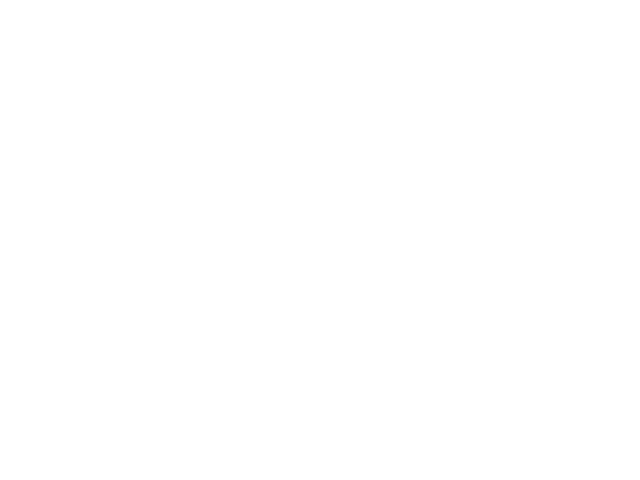

NameError: name 'prot' is not defined

In [4]:
# %matplotlib qt
%matplotlib nbagg

state = 'New York'  ## State to look at
stats1 = ['Active', 'Confirmed', 'Deaths']    ## Stats to look at
stats2 = ['Incidence_Rate', 'Case-Fatality_Ratio']
colors = ['red', 'blue', 'green']

start = days_at[5] + 25 ## George Floyd died on May 25th. 

for i, stat in enumerate(stats1):
    plt.figure(i)
    plt.axvline(x=183, color='black', ls='--', label='June 1st')

    for key in set(prot[prot.Province_State == state].Combined_Key):
        df = prot[prot.Combined_Key==key]
        df = df[df.DAY>start-10]  ###Start plotting 10 days before George Floyd's death.
        x = df.DAY.to_numpy()
        y = df[stat].to_numpy()
        plt.scatter(x, y, marker='x', label=key)
    
    

    for key in set(nprot[nprot.Province_State == state].Combined_Key):
        df = nprot[nprot.Combined_Key==key]
        df = df[df.DAY>start-10]  ###Start plotting 10 days before George Floyd's death.
        x = df.DAY.to_numpy()
        y = df[stat].to_numpy()
        plt.scatter(x, y, marker='+', label=key)
        

#     plt.legend()
    plt.axvline(x=start, color='red')
    plt.axvline(x=start+14, color='red', ls='--') ## Two weeks after May 25th
    plt.xlabel('Day')
    plt.title('{} Covid-19 {} for Protesting (x) vs Non-Protesting (+) Counties'.format(state, stat))
    
    mplcursors.cursor(hover=True)
    plt.show()

Note from the individual dataframes that indeed, filtering by a single UID filters out one unique city/county. Immediately, we notice that two cities listed in Alaska have the same UID; this is because they belong to the same county. There are also a few clear spikes that seem to be beginning. For now, let's simply plot all 350+ states in which there were protests:



182


It's certainly not a very useful graph at this broad of a scale. Let's try plotting the % increase in cases:

<ipython-input-62-2097bf0012ba>:6: RuntimeWarning: divide by zero encountered in true_divide
  dy = (y[1:]-y[:-1])/y[:-1]
<ipython-input-62-2097bf0012ba>:6: RuntimeWarning: invalid value encountered in true_divide
  dy = (y[1:]-y[:-1])/y[:-1]


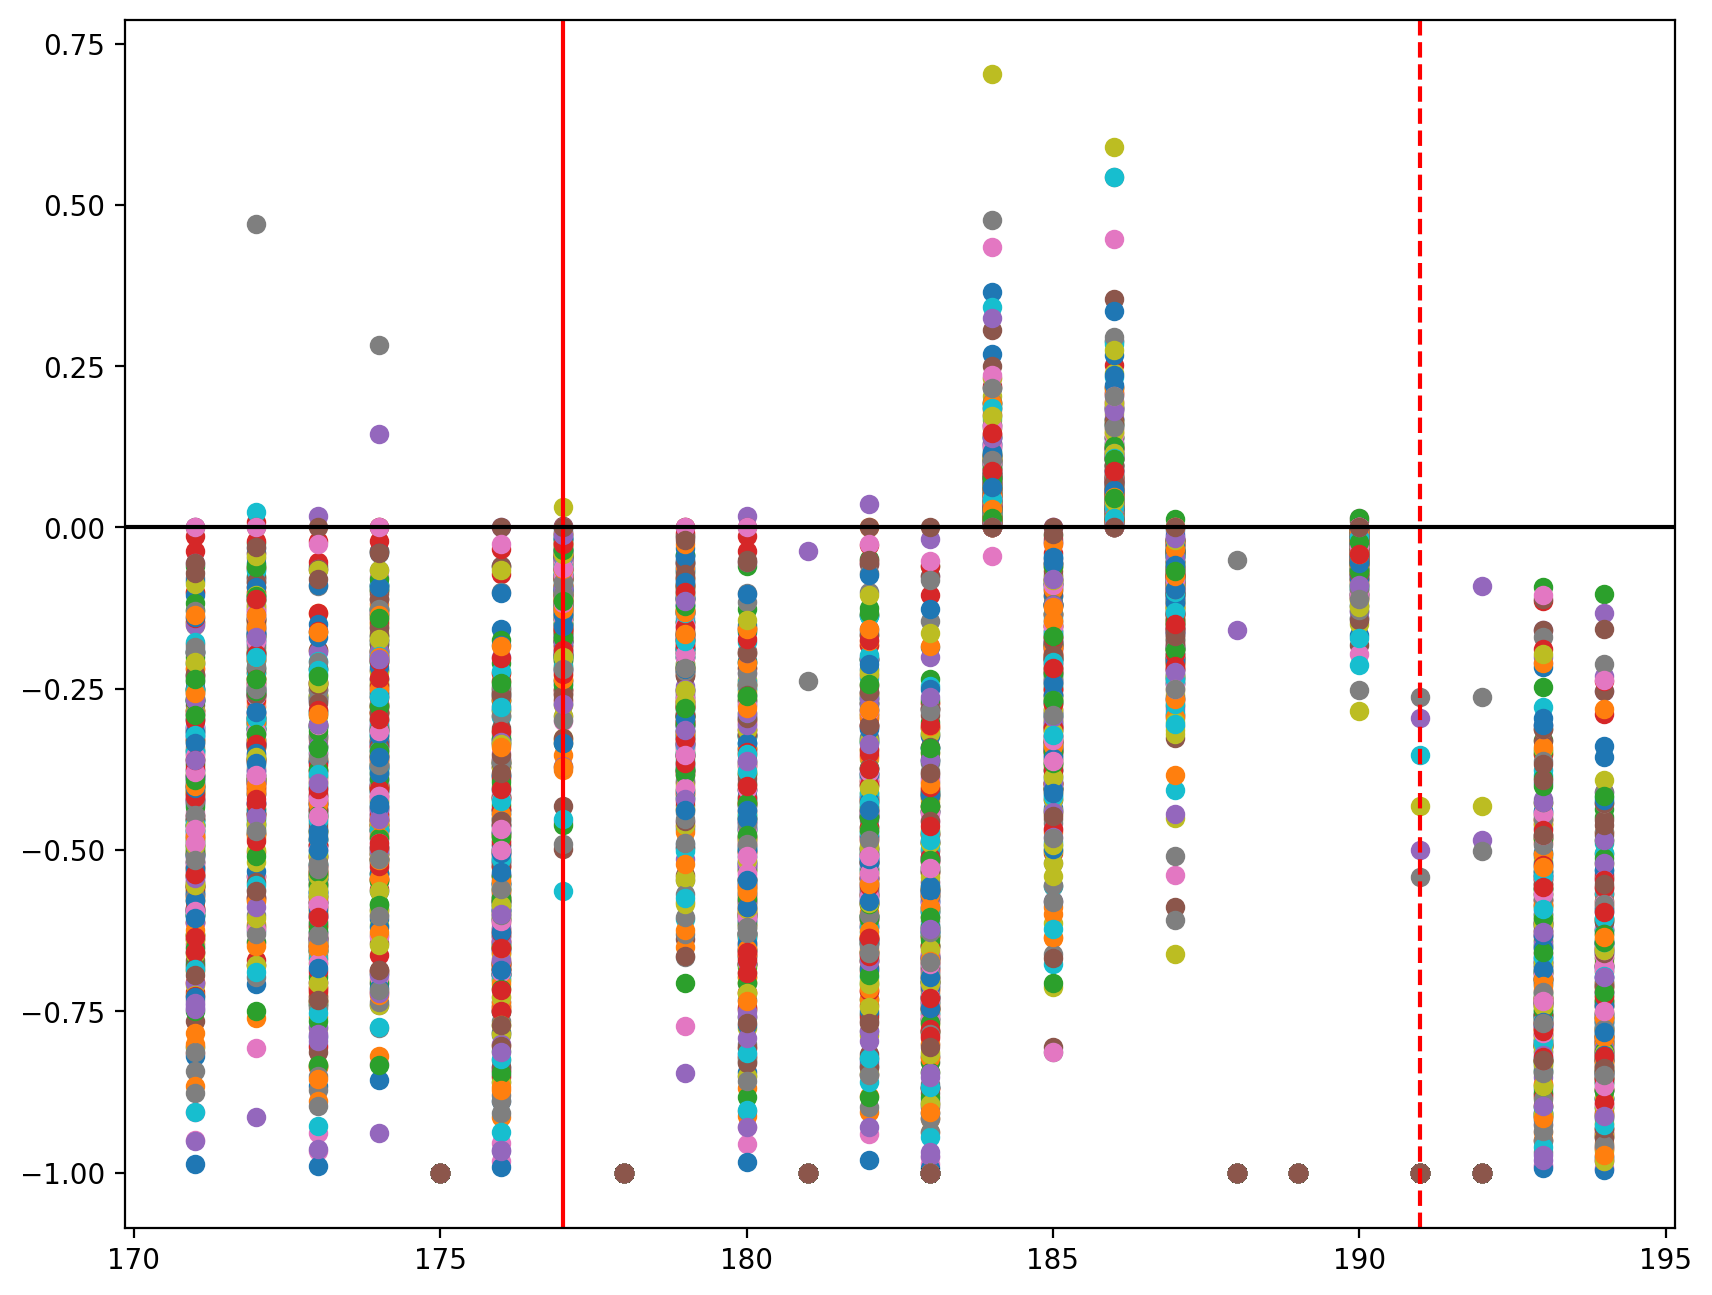

In [62]:
# for UID in UIDs:
# #     print(UID)
#     df = dr[dr.UID==UID]
#     x = df.DAY.to_numpy()[:-1]
#     y = df.Active.to_numpy()
#     dy = (y[1:]-y[:-1])/y[:-1]
#     plt.scatter(x[x>start-7], dy[x>start-7], label=lookup[lookup.UID==UID].Combined_Key.to_list()[0])

# plt.axvline(x=start, color='red')
# plt.axvline(x=start+14, color='red', ls='--') ## Two weeks after May 25th
# plt.axhline(y=0, color='black')
# # plt.legend()
# plt.show()

/home/jackie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


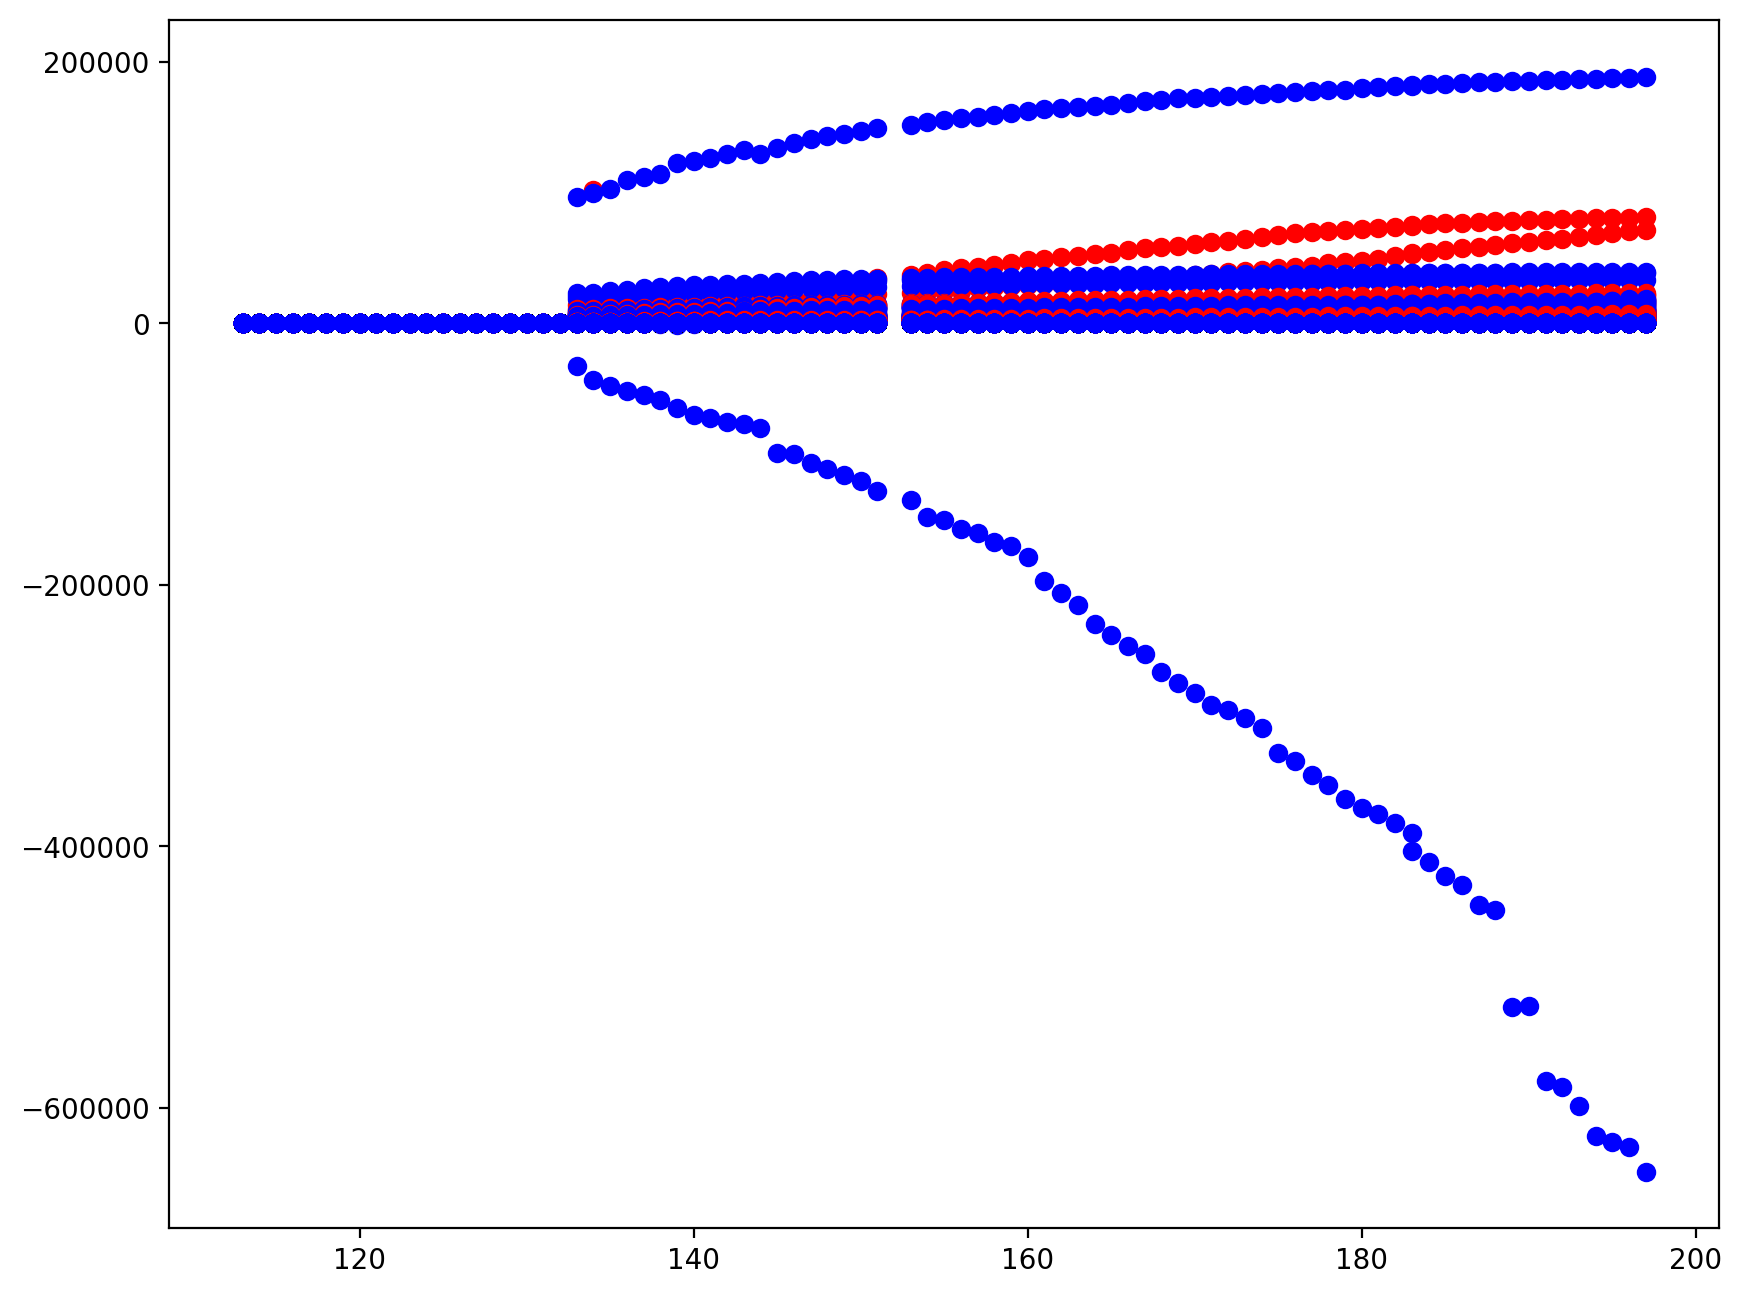

In [8]:
## States where national guard was deployed
with open('nat_guard.json', 'r') as file:
    dat = json.load(file)
    
ngstates = dat.split(', ')


for state in set(DR.Province_State):
#     print(state)
#     if state is not np.nan:
#         state = ab2name[state]
    if state is not np.nan:
        
        df = DR[DR.Province_State==state][DR.Country_Region=='US']
        if not df.empty:


            x = df.DAY.to_numpy()
            y = df.Active.to_numpy()
            if state in set(ngstates):
                plt.scatter(x, y, color='red')
            else:
                plt.scatter(x, y, color='blue')

plt.show()

Not very helpful either. 

# New York and Florida

Let's look at some county and state specific data. Let's start with some familiar states from the East Coast, New York and Florida.

In [5]:
ny = DR[DR.Province_State=='New York']
fl = DR[DR.Province_State=='Florida']

ny2 = DR_us[DR_us.Province_State=='New York']
fl2 = DR_us[DR_us.Province_State=='Florida']

print('New York (counties)')
display(ny)
print('New York (state)')
display(ny2)
print('Florida (counties)')
display(fl)
print('Florida (state)')
display(fl2)


New York (counties)


FIPS      Admin2 Province_State Country_Region  Confirmed  Deaths  \
245040  36045.0   Jefferson       New York             US        1.0     0.0   
245021  36007.0      Broome       New York             US        3.0     1.0   
245022  36057.0  Montgomery       New York             US        3.0     0.0   
245023  36031.0       Essex       New York             US        3.0     0.0   
245024  36117.0       Wayne       New York             US        3.0     0.0   
...         ...         ...            ...            ...        ...     ...   
23292   36017.0    Chenango       New York             US      138.0     5.0   
23286   36013.0  Chautauqua       New York             US      107.0     4.0   
22867   36001.0      Albany       New York             US     2022.0   118.0   
22880   36003.0    Allegany       New York             US       55.0     0.0   
23110   36007.0      Broome       New York             US      655.0    52.0   

        Recovered  Active              Combined_Key  day  month  DAY  \
245040        0.0     0.0   Jefferson, New York, US   22      3  113   
245021        0.0     0.0      Broome, New York, US   22      3  113   
245022        0.0     0.0  Montgomery, New York, US   22      3  113   
245023        0.0     0.0       Essex, New York, US   22      3  113   
245024        0.0     0.0       Wayne, New York, US   22      3  113   
...           ...     ...                       ...  ...    ...  ...   
23292         0.0   133.0    Chenango, New York, US   15      6  197   
23286         0.0   103.0  Chautauqua, New York, US   15      6  197   
22867         0.0  1904.0      Albany, New York, US   15      6  197   
22880         0.0    55.0    Allegany, New York, US   15      6  197   
23110         0.0   603.0      Broome, New York, US   15      6  197   

        Incidence_Rate  Case-Fatality_Ratio  
245040             NaN                  NaN  
245021             NaN                  NaN  
245022             NaN                  NaN  
245023             NaN                  NaN  
245024             NaN                  NaN  
...                ...                  ...  
23292       292.329527             3.623188  
23286        84.316368             3.738318  
22867       661.852795             5.835806  
22880       119.329153             0.000000  
23110       343.853681             7.938931  

[5107 rows x 14 columns]

New York (state)


Province_State Country_Region  Confirmed  Deaths  Recovered    Active  \
675        New York             US     189033    9385    23887.0  179648.0   
3358       New York             US     195749   10058    23887.0  185691.0   
1725       New York             US     203020   10842    23887.0  192178.0   
2833       New York             US     214454   11617    23887.0  202837.0   
1784       New York             US     223691   14832    23887.0  208859.0   
...             ...            ...        ...     ...        ...       ...   
1374       New York             US     380892   30580    68211.0  282101.0   
618        New York             US     381714   30758    68399.0  282557.0   
1667       New York             US     382630   30795    68584.0  283251.0   
3126       New York             US     383324   30825    68761.0  283738.0   
328        New York             US     383944   30856    68851.0  284237.0   

      FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
675   36.0    1121.124012       461601.0              42594.0        4.964742   
3358  36.0    1160.955517       478357.0              42712.0        5.138213   
1725  36.0    1204.078637       499143.0              46201.0        5.340361   
2833  36.0    1271.891833       526012.0              46201.0        5.417013   
1784  36.0    1326.674980       550579.0              50450.0        6.630575   
...    ...            ...            ...                  ...             ...   
1374  36.0    1957.955153      2729005.0              89995.0        8.028523   
618   36.0    1962.180600      2801400.0              89995.0        8.057865   
1667  36.0    1966.889250      2872240.0              89995.0        8.048245   
3126  36.0    1970.456720      2934599.0              89995.0        8.041500   
328   36.0    1973.643797      2991210.0              89995.0        8.036589   

           UID ISO3  Testing_Rate  Hospitalization_Rate  day  month  DAY  
675   84000036  USA   2737.680538             22.532574   12      4  133  
3358  84000036  USA   2837.057652             21.819779   13      4  134  
1725  84000036  USA   2960.336041             22.756871   14      4  135  
2833  84000036  USA   3119.691715             21.543548   15      4  136  
1784  84000036  USA   3265.394601             22.553433   16      4  137  
...        ...  ...           ...                   ...  ...    ...  ...  
1374  84000036  USA  14028.305666             23.627432   11      6  193  
618   84000036  USA  14400.448329             23.576552   12      6  194  
1667  84000036  USA  14764.597597             23.520111   13      6  195  
3126  84000036  USA  15085.150734             23.477528   14      6  196  
328   84000036  USA  15376.156581             23.439616   15      6  197  

[65 rows x 18 columns]

Florida (counties)


FIPS      Admin2 Province_State Country_Region  Confirmed  Deaths  \
245236  12087.0      Monroe        Florida             US        1.0     0.0   
245237  12005.0         Bay        Florida             US        1.0     0.0   
245238  12055.0   Highlands        Florida             US        1.0     0.0   
245239      NaN  Unassigned        Florida             US        1.0     0.0   
245240  12007.0    Bradford        Florida             US        1.0     0.0   
...         ...         ...            ...            ...        ...     ...   
22863   12001.0     Alachua        Florida             US      551.0    10.0   
23099   12009.0     Brevard        Florida             US      565.0    15.0   
23112   12011.0     Broward        Florida             US     9086.0   358.0   
23087   12007.0    Bradford        Florida             US       52.0     2.0   
22988   12005.0         Bay        Florida             US      153.0     4.0   

        Recovered  Active             Combined_Key  day  month  DAY  \
245236        0.0     0.0      Monroe, Florida, US   22      3  113   
245237        0.0     0.0         Bay, Florida, US   22      3  113   
245238        0.0     0.0   Highlands, Florida, US   22      3  113   
245239        0.0     0.0  Unassigned, Florida, US   22      3  113   
245240        0.0     0.0    Bradford, Florida, US   22      3  113   
...           ...     ...                      ...  ...    ...  ...   
22863         0.0   541.0     Alachua, Florida, US   15      6  197   
23099         0.0   550.0     Brevard, Florida, US   15      6  197   
23112         0.0  8728.0     Broward, Florida, US   15      6  197   
23087         0.0    50.0    Bradford, Florida, US   15      6  197   
22988         0.0   149.0         Bay, Florida, US   15      6  197   

        Incidence_Rate  Case-Fatality_Ratio  
245236             NaN                  NaN  
245237             NaN                  NaN  
245238             NaN                  NaN  
245239             NaN                  NaN  
245240             NaN                  NaN  
...                ...                  ...  
22863       204.799976             1.814882  
23099        93.862864             2.654867  
23112       465.285865             3.940128  
23087       184.390624             3.846154  
22988        87.576200             2.614379  

[5788 rows x 14 columns]

Florida (state)


Province_State Country_Region  Confirmed  Deaths  Recovered    Active  \
650         Florida             US      19895     461        NaN   19434.0   
3333        Florida             US      21019     499        NaN  122520.0   
1700        Florida             US      21628     571        NaN   21057.0   
2808        Florida             US      22511     596        NaN   21915.0   
1759        Florida             US      23343     668        NaN   22675.0   
...             ...            ...        ...     ...        ...       ...   
1349        Florida             US      69069    2848        NaN   66221.0   
593         Florida             US      70971    2877        NaN   68094.0   
1642        Florida             US      73552    2925        NaN   70627.0   
3101        Florida             US      75568    2931        NaN   72637.0   
303         Florida             US      77326    2938        NaN   74388.0   

      FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
650   12.0      93.700227       182753.0               2772.0        2.317165   
3333  12.0     579.387193       196207.0               2833.0        0.405628   
1700  12.0     101.862202       203180.0               3060.0        2.640096   
2808  12.0     106.020900       213509.0               3344.0        2.647595   
1759  12.0     109.939402       219248.0               3460.0        2.861672   
...    ...            ...            ...                  ...             ...   
1349  12.0     321.584159      1306748.0              11850.0        4.123413   
593   12.0     330.439841      1335899.0              11986.0        4.053768   
1642  12.0     342.456936      1370413.0              12155.0        3.976778   
3101  12.0     351.843400      1409015.0              12224.0        3.878626   
303   12.0     360.028619      1430184.0              12298.0        3.799498   

           UID ISO3  Testing_Rate  Hospitalization_Rate  day  month  DAY  
650   84000012  USA    860.718651             13.933149   12      4  133  
3333  84000012  USA    924.083459              2.302896   13      4  134  
1700  84000012  USA    956.924459             14.148326   14      4  135  
2808  84000012  USA   1005.571337             14.854960   15      4  136  
1759  84000012  USA   1032.600520             14.822431   16      4  137  
...        ...  ...           ...                   ...  ...    ...  ...  
1349  84000012  USA   6084.197790             17.156756   11      6  193  
593   84000012  USA   6219.924380             16.888588   12      6  194  
1642  84000012  USA   6380.621012             16.525723   13      6  195  
3101  84000012  USA   6560.351307             16.176159   14      6  196  
303   84000012  USA   6658.913832             15.904094   15      6  197  

[65 rows x 18 columns]

<IPython.core.display.Javascript object>


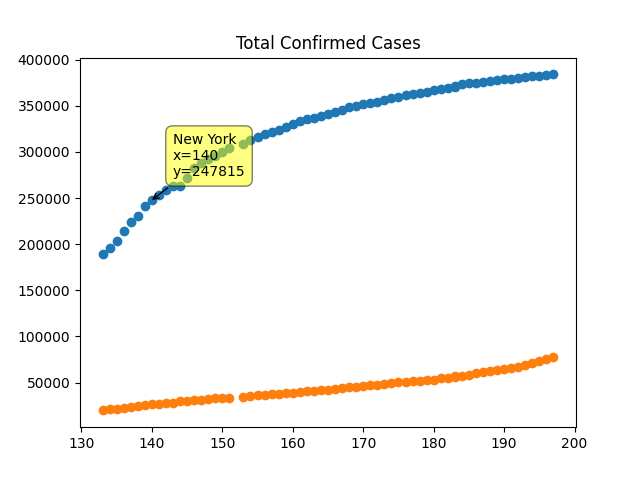

<IPython.core.display.Javascript object>


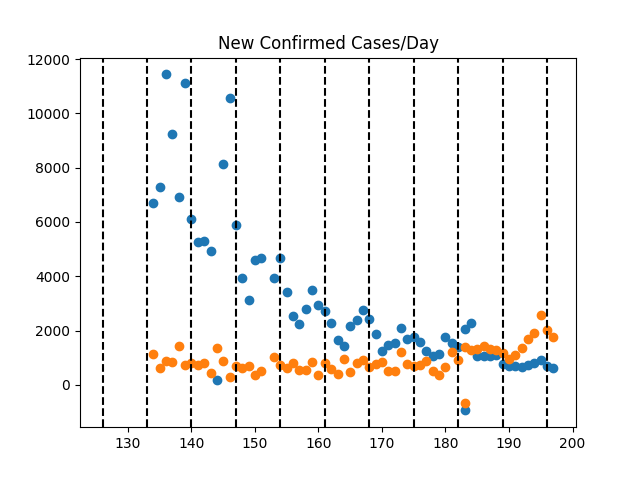

121
[31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
[0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]


Text(0.5, 1.0, 'New Confirmed Cases/Day')

In [6]:
def change(thing):
    return thing[1:]- thing[:-1]    



%matplotlib nbagg

plt.figure(1)
plt.clf()
plt.scatter(ny2.DAY, ny2.Confirmed, label='New York')
plt.scatter(fl2.DAY, fl2.Confirmed, label='Florida')
plt.title('Total Confirmed Cases')

mplcursors.cursor(hover=True)
plt.figure(2)
plt.clf()
plt.scatter(ny2.DAY[1:], change(ny2.Confirmed.to_numpy()),label='New York')
plt.scatter(fl2.DAY[1:], change(fl2.Confirmed.to_numpy()), label='Florida')

day = 121  #min(ny2.DAY)
print(day)
print(days_in)
print(days_at)
while day < max(ny2.DAY):
    day += 1 
    if(day%7==0):
        plt.axvline(x=day, color='black', ls='--')

        
        
plt.title('New Confirmed Cases/Day')

In [ ]:
%matplotlib nbagg
counties = set(ny.Admin2)
print(list(counties))
for county in counties:
    x1 = ny[ny.Admin2==county].DAY
    y1 = ny[ny.Admin2==county].Confirmed

#     x2 = fl[fl.Admin2==county].DAY
#     y2 = fl[fl.Admin2==county].Confirmed

    
    plt.figure(1)
    plt.scatter(x1, y1, label='New York')
#     plt.scatter(x2, y2, label='Florida')
    plt.title('Total Confirmed Cases')

    mplcursors.cursor(hover=True)
    plt.figure(2)
    plt.scatter(x1[1:], change(y1.to_numpy()),label='New York')
#     plt.scatter(x2.DAY[1:], change(y2.Confirmed.to_numpy()), label='Florida')


    while day < max(ny2.DAY):
        day += 1 
        if(day%7==0):
            plt.axvline(x=day, color='black', ls='--')


    mplcursors.cursor(hover=True)
    plt.title('New Confirmed Cases/Day')
    

We can plot Active cases, Confirmed cases, Recoveries and Deaths from both global and state information:

<>:31: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:31: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-15-38a0aa41e712>:31: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if j%Nmax == 0 and j is not 0:


Sorting 69 counties by reported deaths


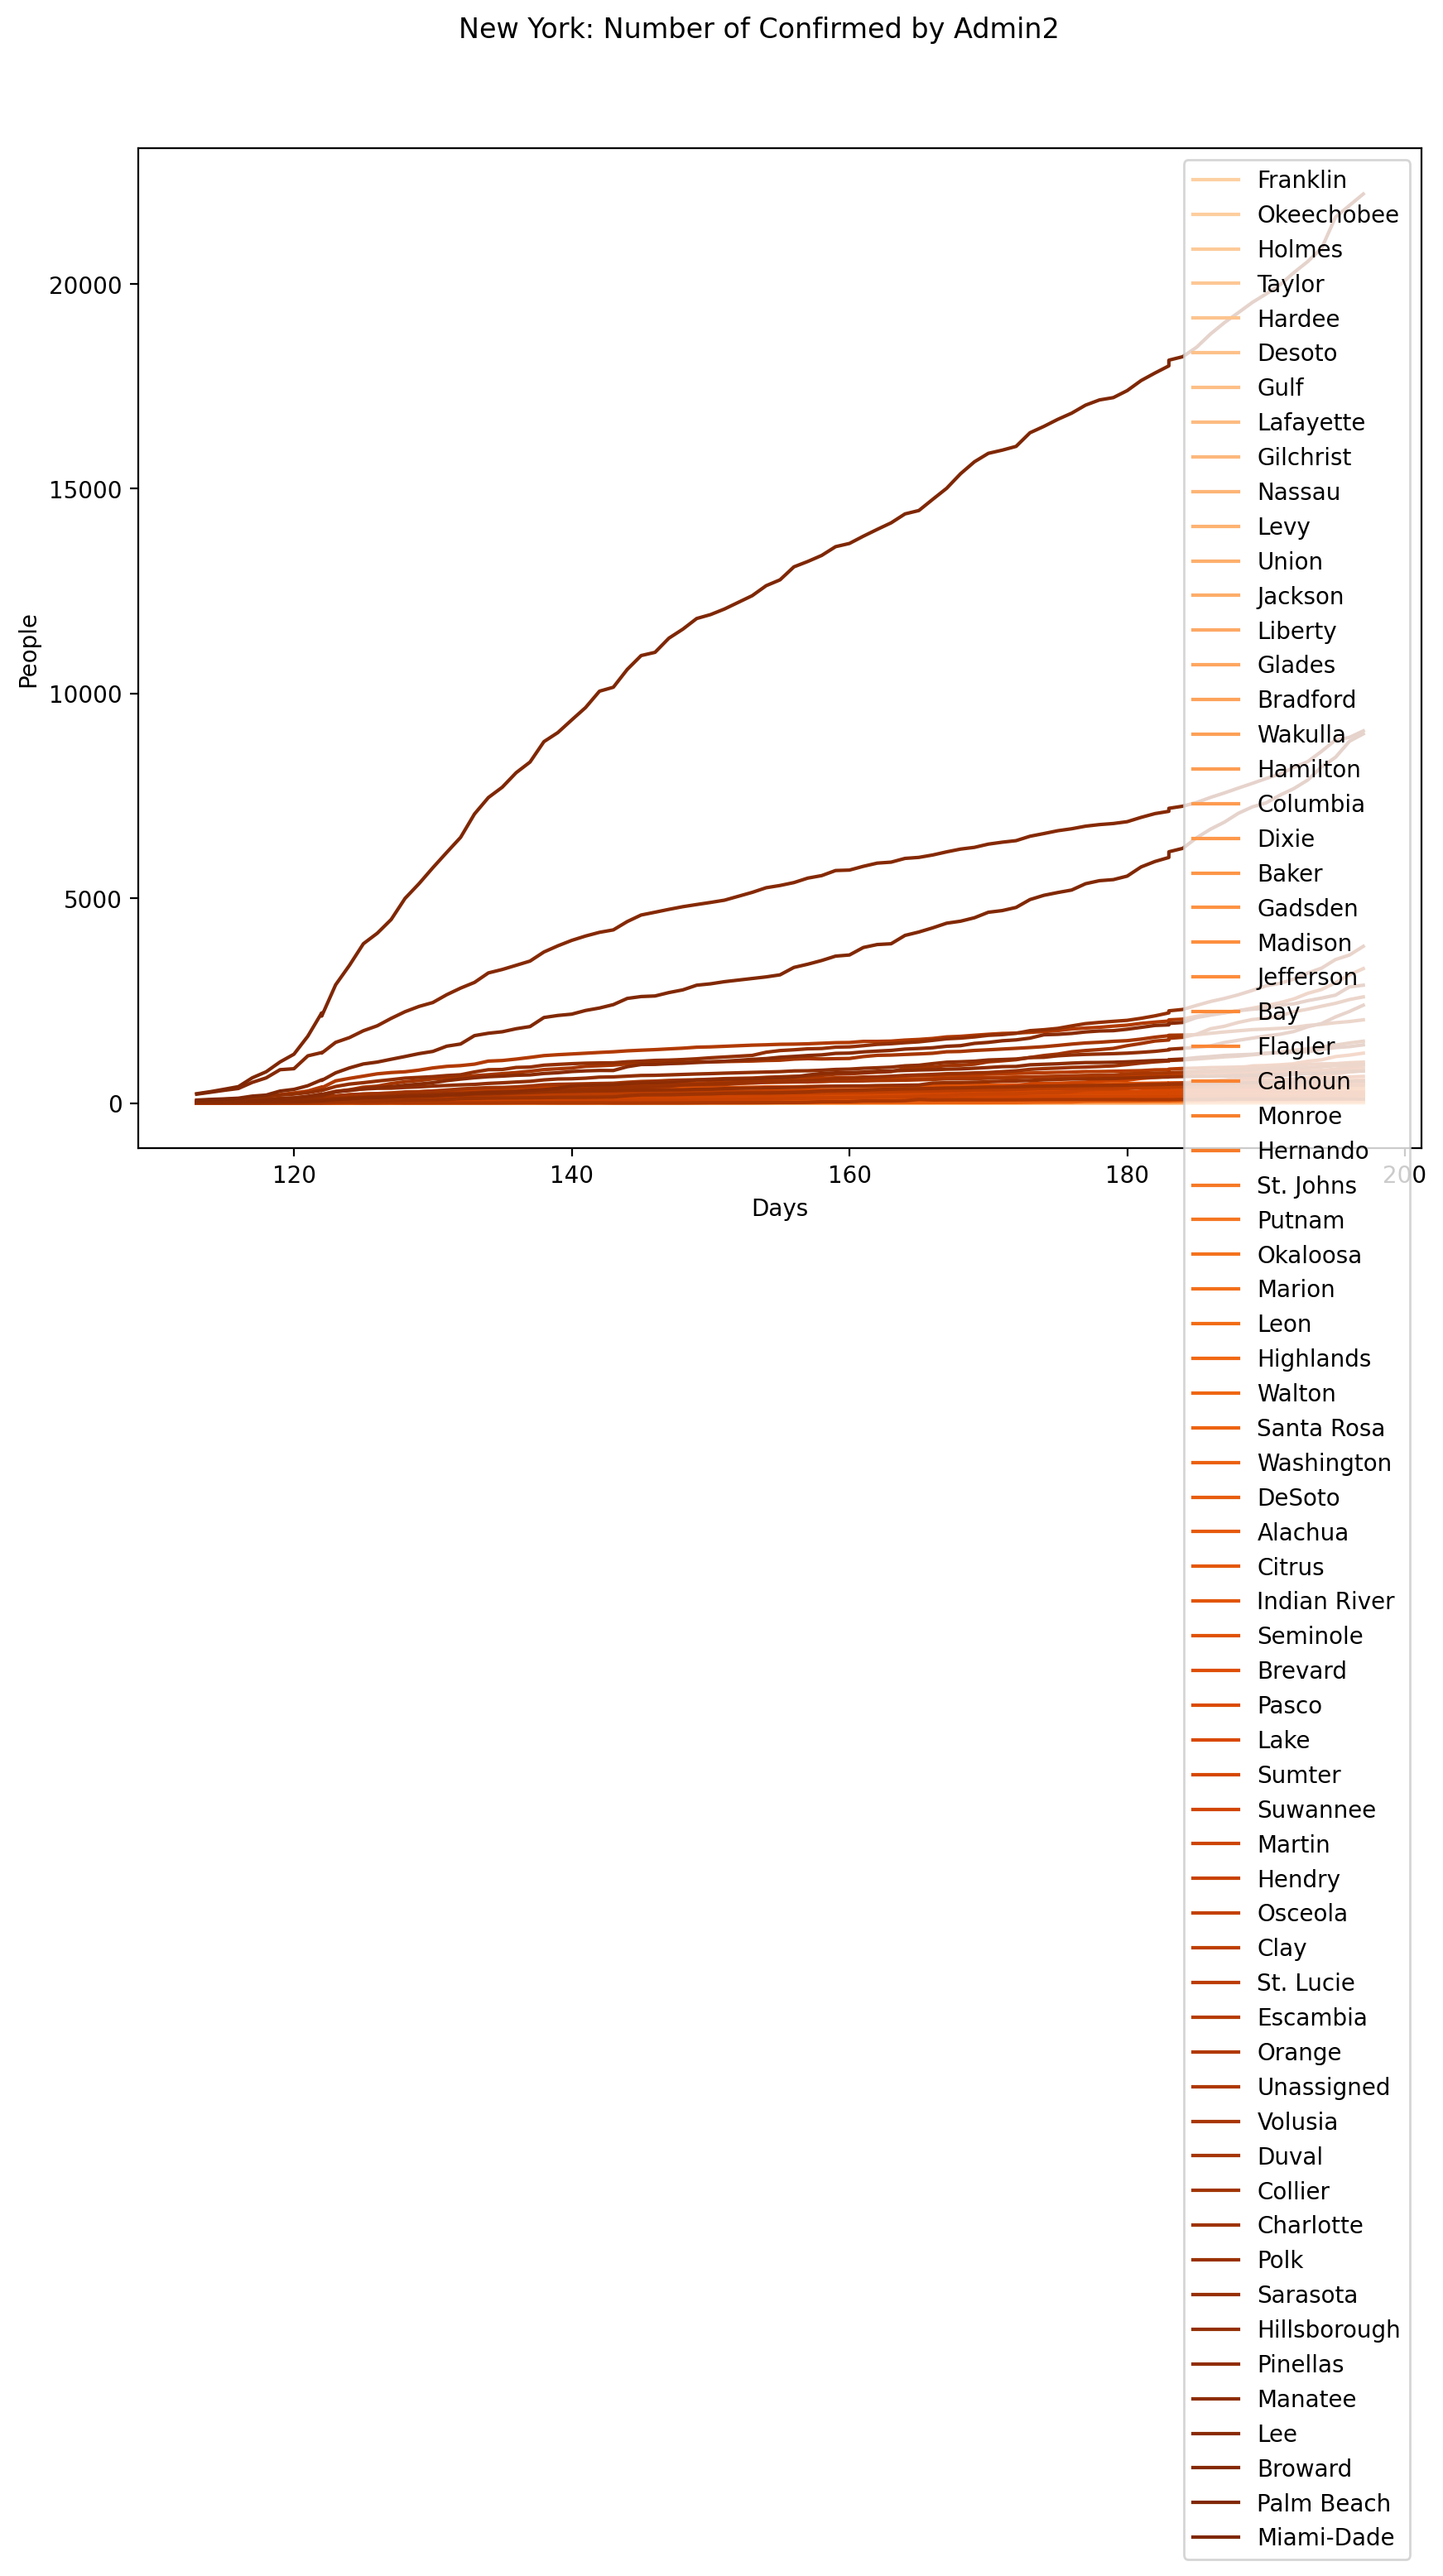

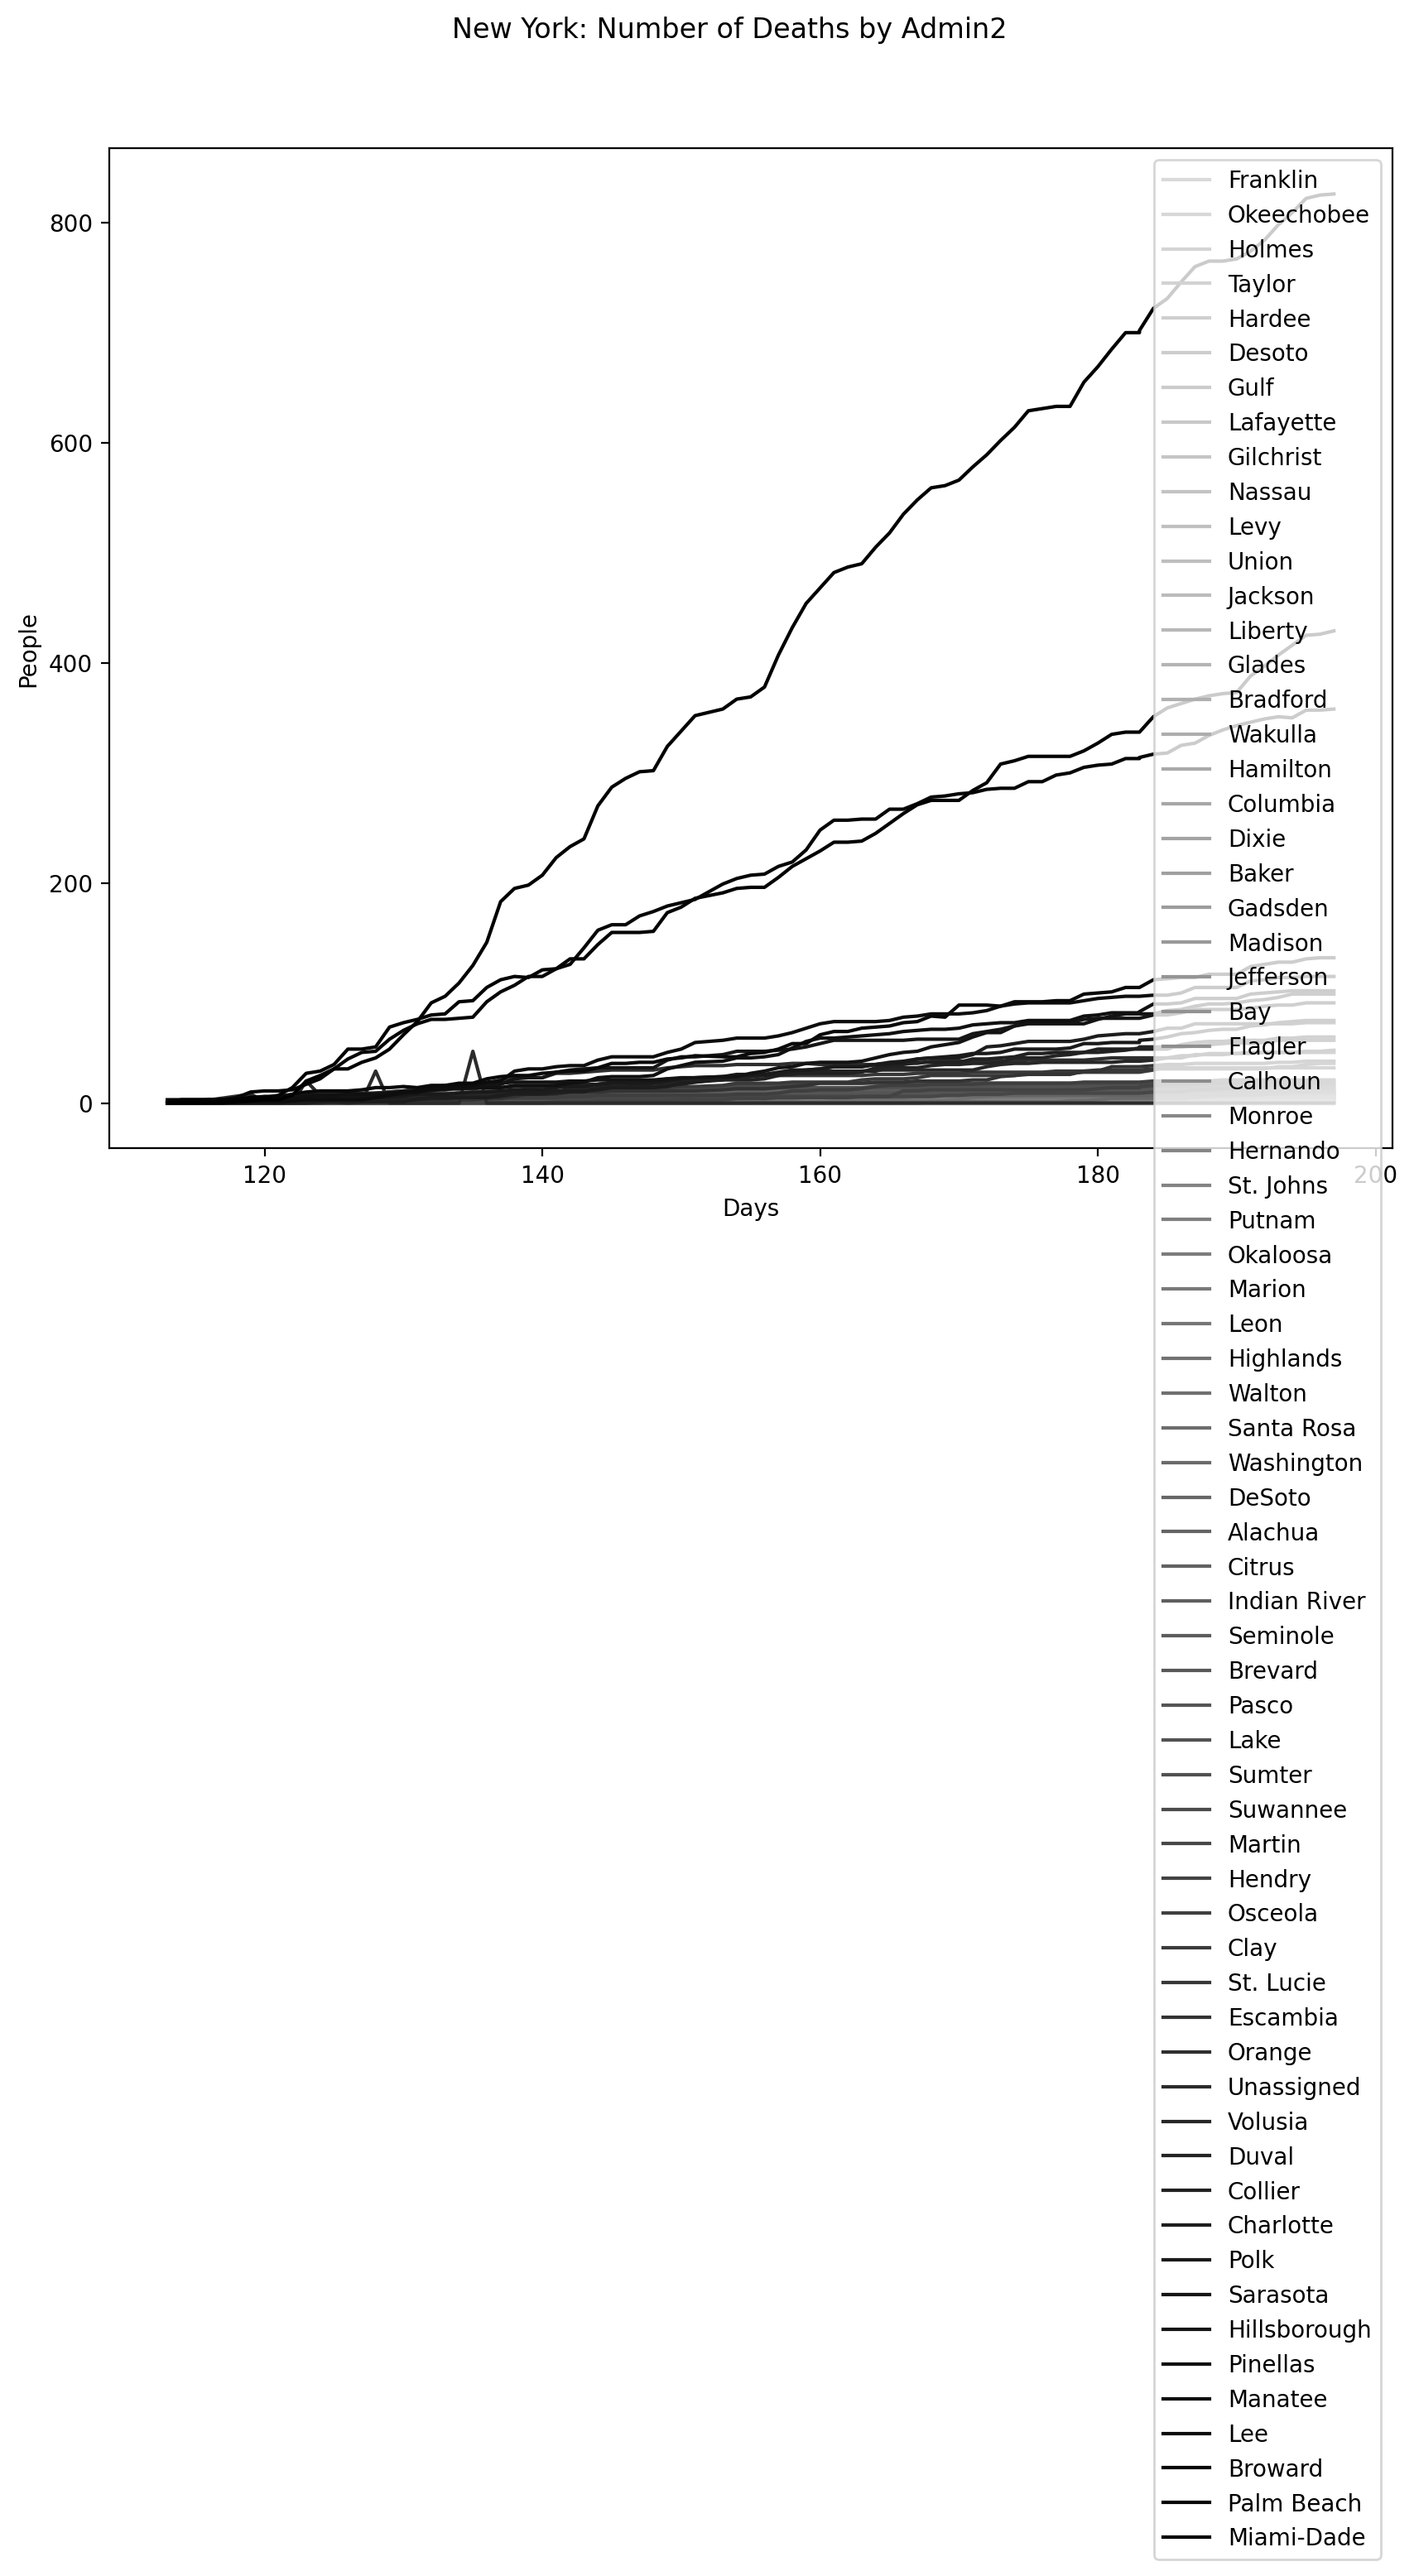

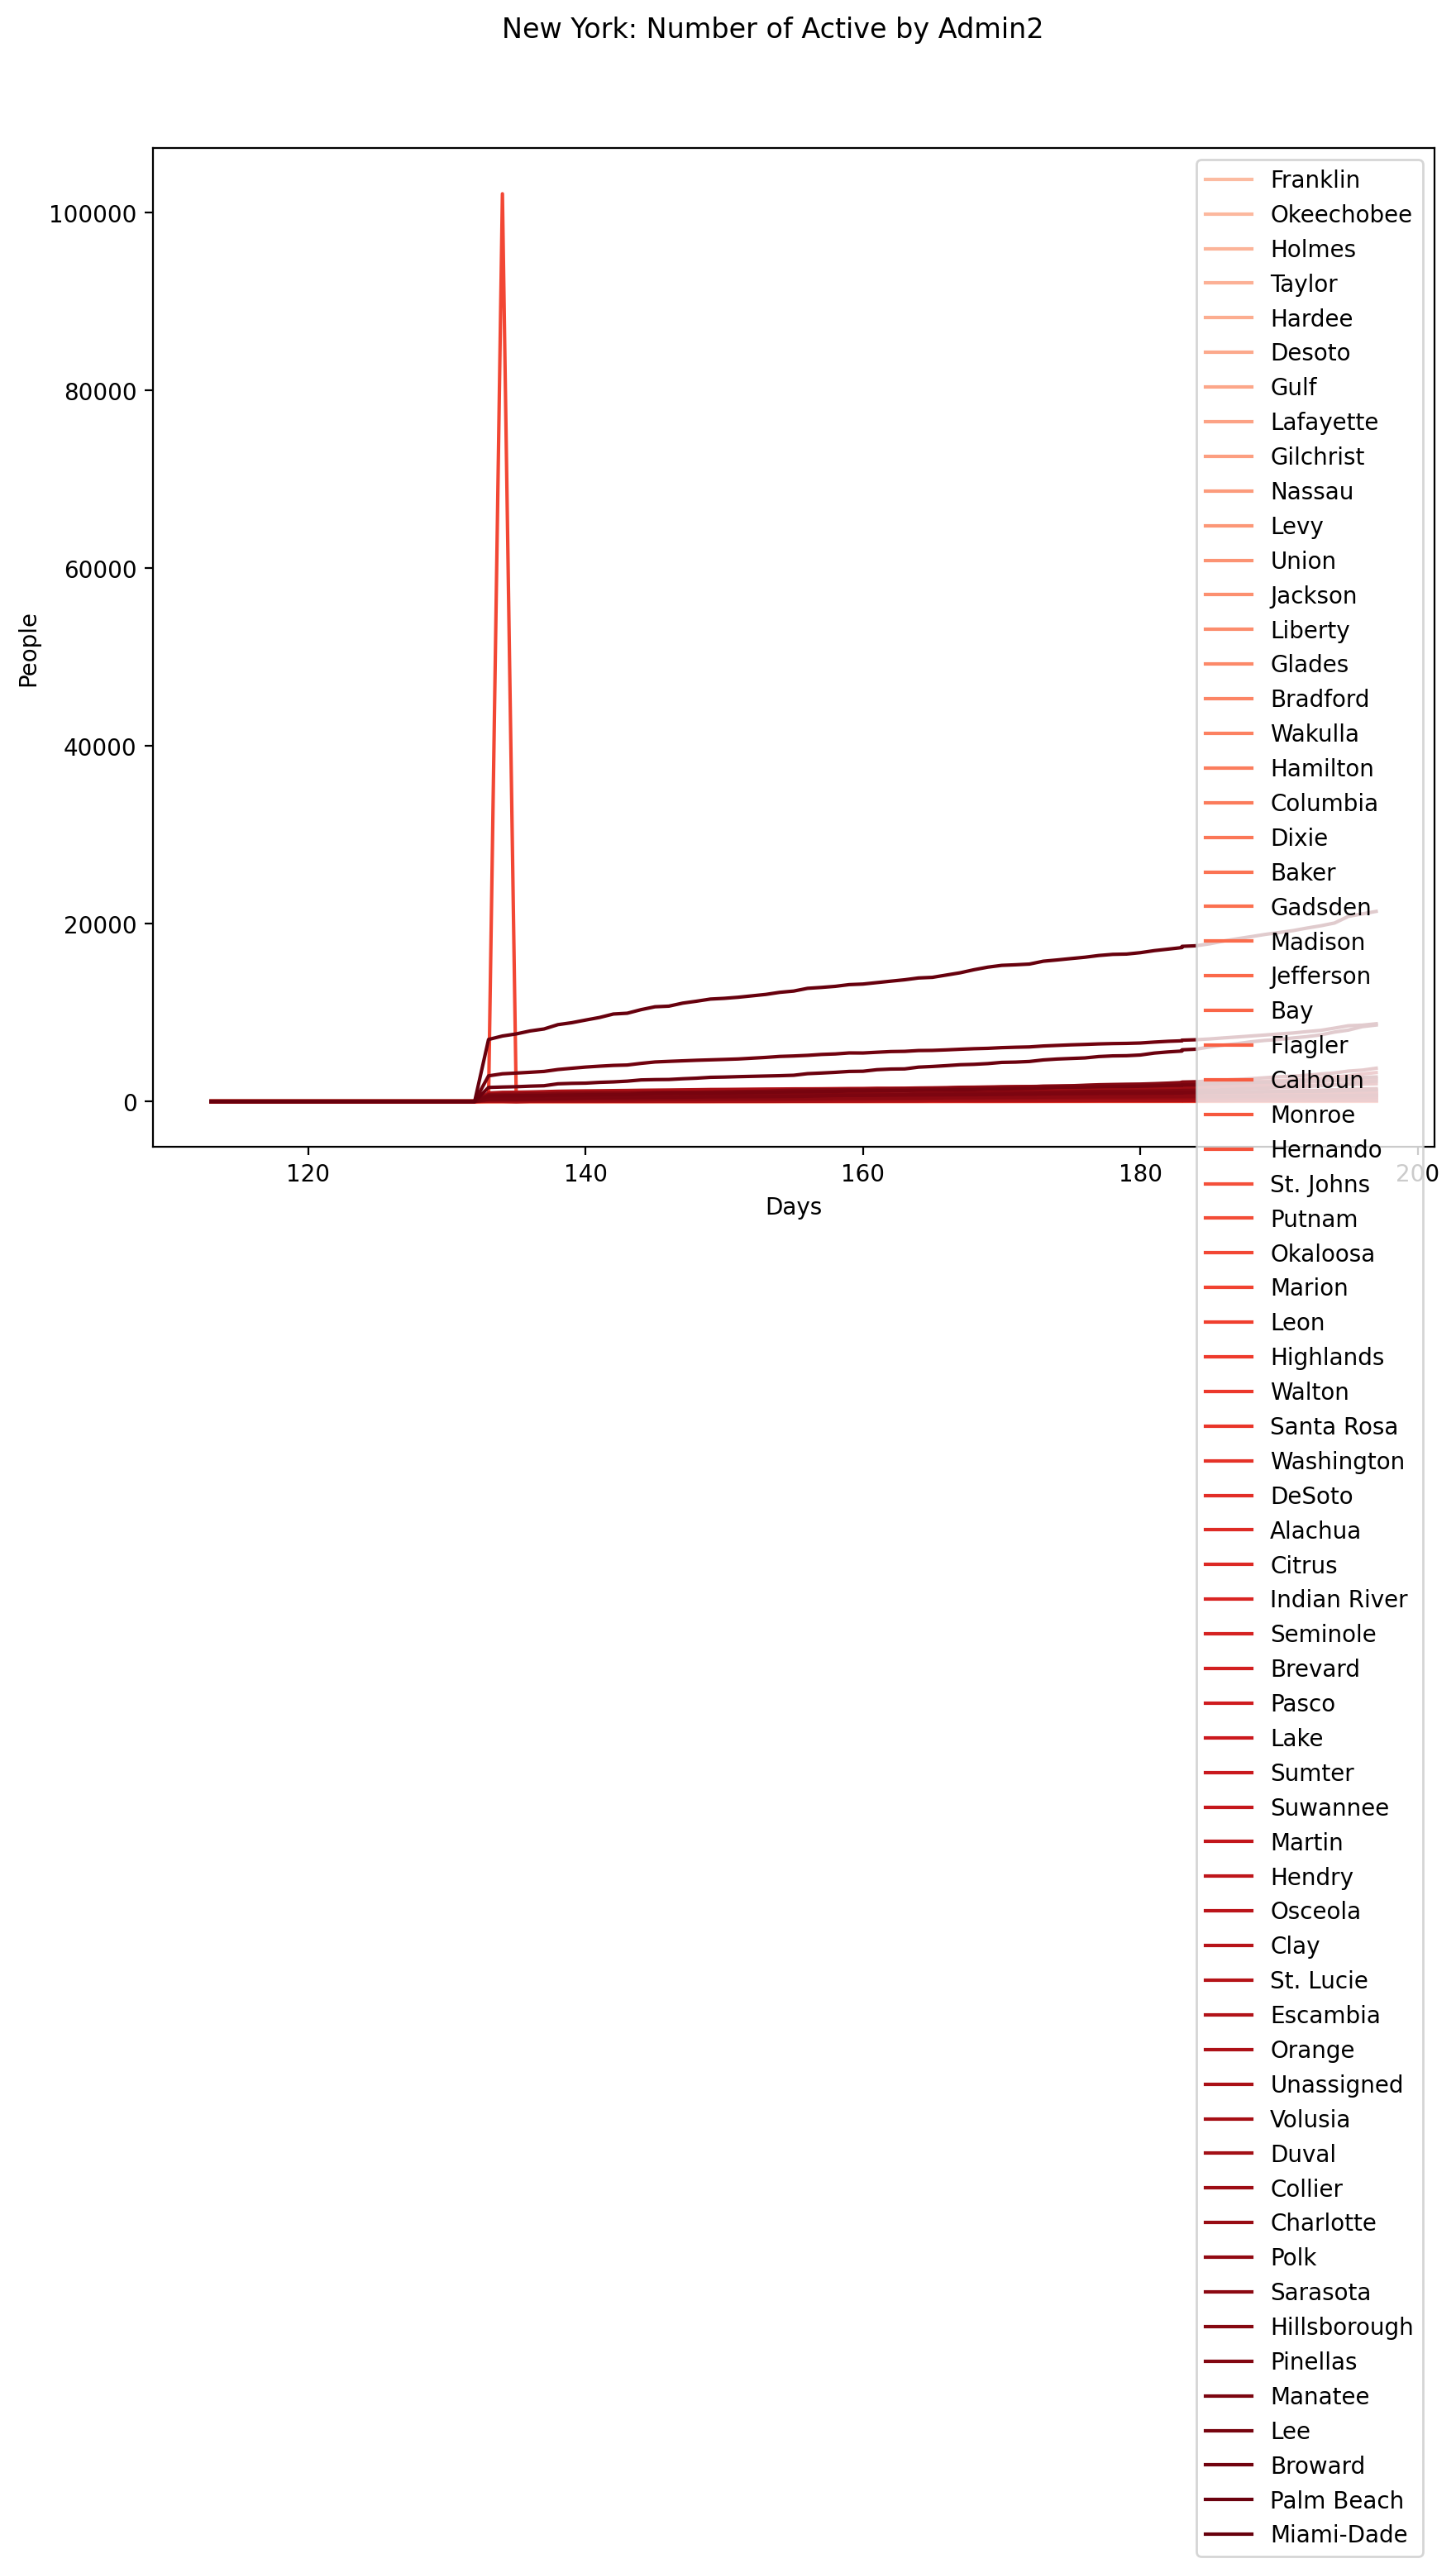

In [15]:
# # import mplcursors

cols1 = ['Confirmed', 'Deaths', 'Active']   #### Things to plot
cmapnames = ['Oranges', 'Greys', 'Reds']       #### Color to plot


def sort_reports(dr, func, cat='Admin2'):
    sortvals = pd.DataFrame()
    sortvals['category'] = list(set(dr[cat]))
    sortvals['vals'] = sortvals.category.map( func )                            
    sortvals.sort_values(by=['vals'], inplace=True)
    return list(sortvals.category)

def plot_reports(dr, stats, cmapnames, cat='Admin2'):
    keys = sort_reports(dr, lambda x: max(dr[dr[cat]==x].Deaths), cat=cat)  ## Sort counties + color by number of deaths
    print( "Sorting {} counties by reported deaths".format(len(keys)) )
    # Nmax = 16 ## Max number of counties per subplot 
    Nmax = len(keys) ## Uncomment for one subplot
    cscale = np.linspace(0.25, 1, Nmax)

    for i, stat in enumerate(stats):
        plt.figure(i)

        cmap = plt.get_cmap(cmapnames[i])
        plt.subplot(1, len(keys)/Nmax, 1)
        plt.xlabel('Days')
        plt.ylabel('People')
        for j, key in enumerate(keys):
            df = dr[dr[cat]==key]
            plt.plot(df.DAY, df[stat], color=cmap(cscale[j%Nmax]), label=key )
            if j%Nmax == 0 and j is not 0:
                plt.legend()
                plt.subplot(1, len(keys)/Nmax, j/Nmax)
                plt.xlabel('Days')



        plt.suptitle("{}: Number of {} by {}".format('New York', stat, cat))
        plt.legend()

        plt.show()
        
# plot_reports(ny, cols1, cmapnames)
# plot_reports(DR_us, cols1, cmapnames, cat='Province_State')
plot_reports(fl, cols1, cmapnames)



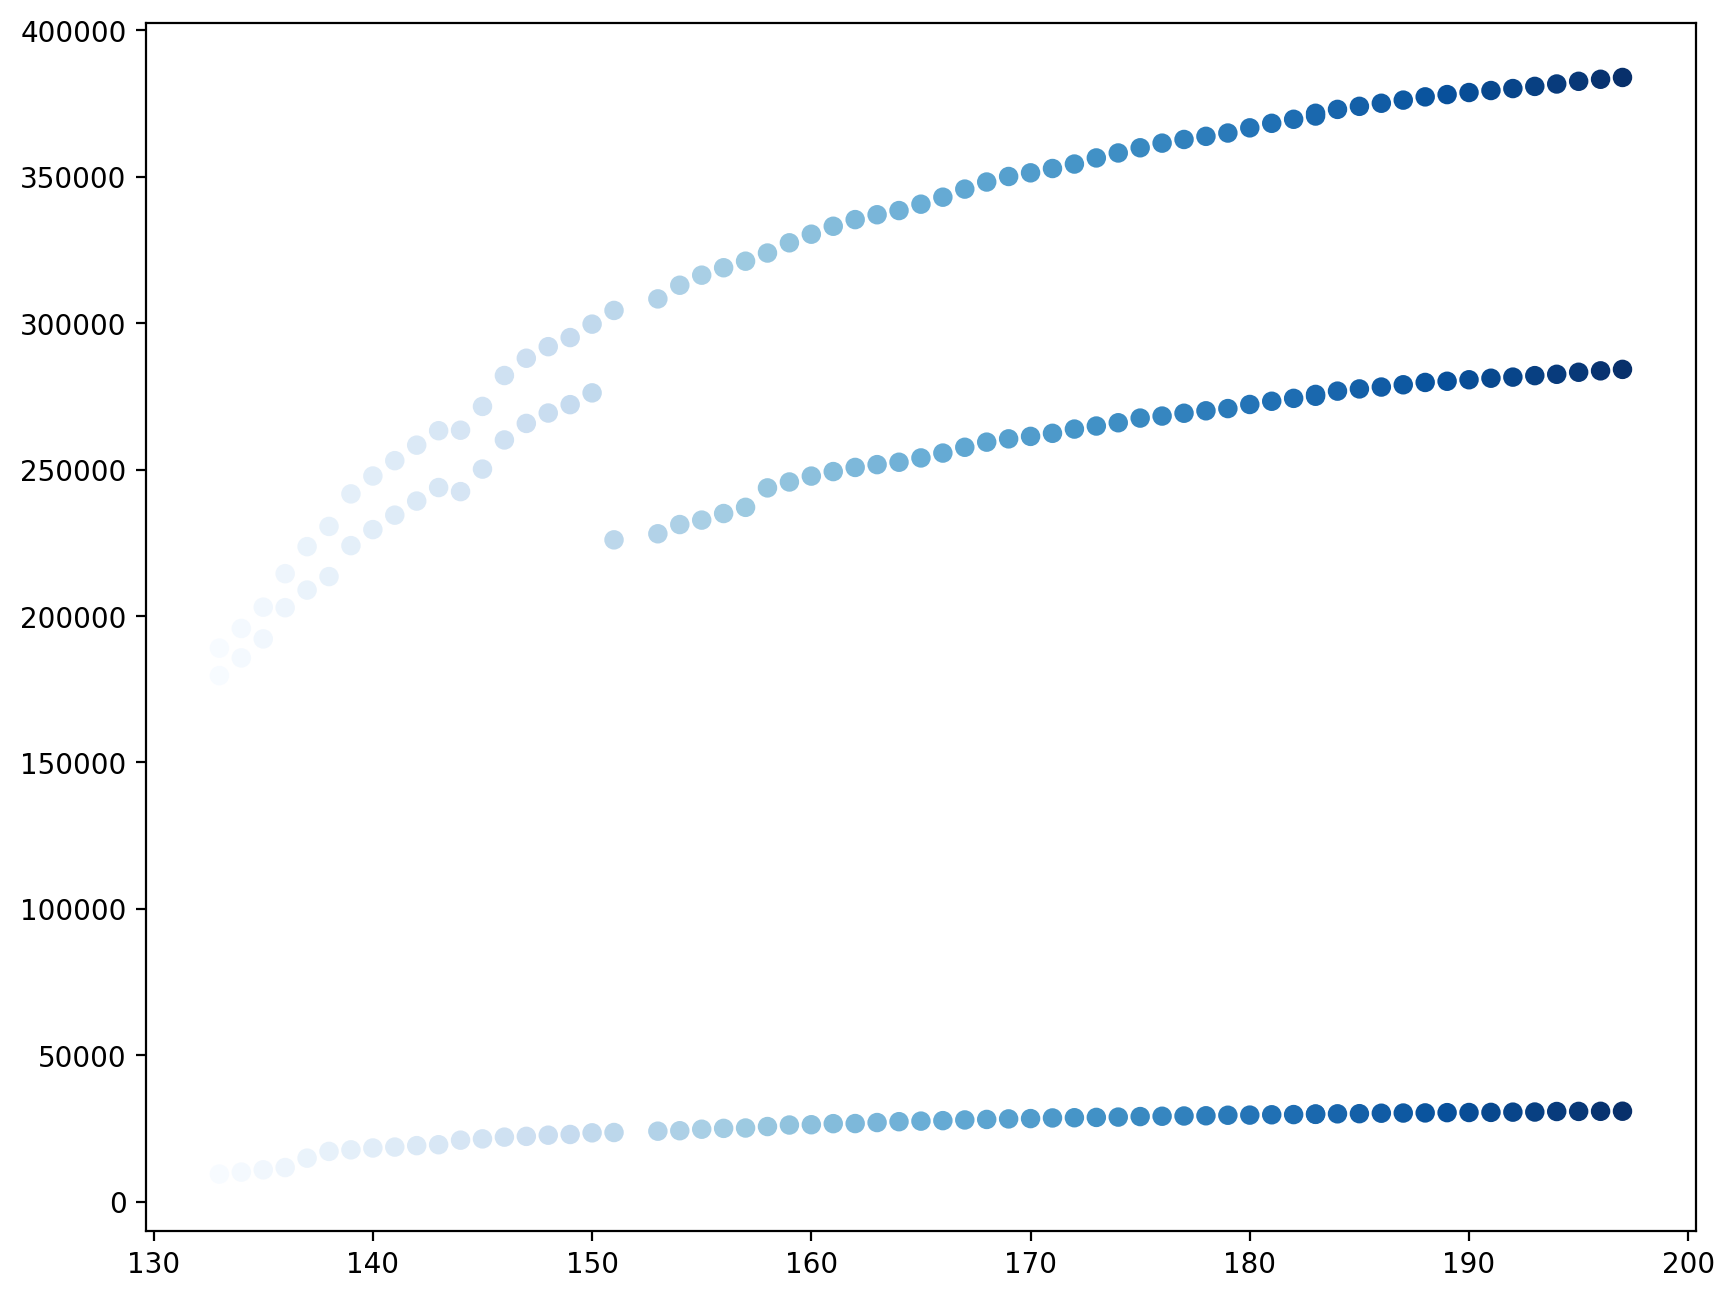

/home/jackie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


['Chautauqua', 'Cortland', 'Albany', 'Yates', 'Cayuga', 'Allegany', 'Westchester', 'Lewis', 'Greene', 'Ontario', 'Nassau', 'Tioga', 'Schenectady', 'Herkimer', 'Cattaraugus', 'Genesee', 'Otsego', 'Rensselaer', 'Ulster', 'Oswego', 'Oneida', 'Steuben', 'Schoharie', 'Monroe', 'Kings', 'Queens', 'Chenango', 'Columbia', 'Erie', 'Orleans', 'Franklin', 'Wyoming', 'Suffolk', 'Rockland', 'Madison', 'Richmond', 'Hamilton', 'Putnam', 'Montgomery', 'Unassigned', 'Washington', 'Essex', 'Chemung', 'New York City', 'Wayne', 'Tompkins', 'Niagara', 'Fulton', 'Sullivan', 'Saratoga', 'Livingston', 'Delaware', 'Bronx', 'Jefferson', 'Broome', 'Onondaga', 'St. Lawrence', 'Seneca', 'Dutchess', 'Clinton', 'Warren', 'Schuyler', 'Orange']
[       Deaths      Admin2
23286     4.0  Chautauqua,        Deaths    Admin2
23456     0.0  Cortland,        Deaths  Admin2
22867   118.0  Albany,        Deaths Admin2
25888     6.0  Yates,        Deaths  Admin2
23256     2.0  Cayuga,        Deaths    Admin2
22880     0.0  All

FIPS         Admin2 Province_State Country_Region  Confirmed  \
25608  90036.0     Unassigned       New York             US        0.0   
25538  36109.0       Tompkins       New York             US      173.0   
25525  36107.0          Tioga       New York             US      139.0   
25576  36111.0         Ulster       New York             US     1741.0   
25794  36119.0    Westchester       New York             US    34327.0   
25712  36113.0         Warren       New York             US      257.0   
25771  36117.0          Wayne       New York             US      133.0   
25742  36115.0     Washington       New York             US      243.0   
25270  36091.0       Saratoga       New York             US      517.0   
25276  36093.0    Schenectady       New York             US      732.0   
25308  36099.0         Seneca       New York             US       64.0   
25279  36095.0      Schoharie       New York             US       54.0   
25283  36097.0       Schuyler       New York             US       12.0   
25153  36083.0     Rensselaer       New York             US      514.0   
25200  36087.0       Rockland       New York             US    13441.0   
25450  36103.0        Suffolk       New York             US    40692.0   
25455  36105.0       Sullivan       New York             US     1432.0   
25432  36101.0        Steuben       New York             US      256.0   
25401  36089.0   St. Lawrence       New York             US      215.0   
25888  36123.0          Yates       New York             US       40.0   
25878  36121.0        Wyoming       New York             US       92.0   
23772  36033.0       Franklin       New York             US       25.0   
23829  36037.0        Genesee       New York             US      213.0   
23799  36035.0         Fulton       New York             US      235.0   
23910  36039.0         Greene       New York             US      251.0   
23956  36041.0       Hamilton       New York             US        6.0   
23691  36031.0          Essex       New York             US       40.0   
23427  36021.0       Columbia       New York             US      439.0   
23456  36023.0       Cortland       New York             US       42.0   
23638  36027.0       Dutchess       New York             US     4068.0   
23684  36029.0           Erie       New York             US     6817.0   
23573  36025.0       Delaware       New York             US       88.0   
24531  36053.0        Madison       New York             US      335.0   
24417  36049.0          Lewis       New York             US       20.0   
24467  36051.0     Livingston       New York             US      123.0   
24045  36043.0       Herkimer       New York             US      128.0   
24197  36045.0      Jefferson       New York             US       81.0   
24745  36057.0     Montgomery       New York             US      104.0   
24724  36055.0         Monroe       New York             US     3380.0   
24833  36063.0        Niagara       New York             US     1169.0   
24821  36061.0  New York City       New York             US   210259.0   
24800  36059.0         Nassau       New York             US    41240.0   
25112  36079.0         Putnam       New York             US     1291.0   
24906  36073.0        Orleans       New York             US      268.0   
24894  36069.0        Ontario       New York             US      233.0   
24892  36067.0       Onondaga       New York             US     2531.0   
24898  36071.0         Orange       New York             US    10573.0   
24921  36077.0         Otsego       New York             US       80.0   
24916  36075.0         Oswego       New York             US      126.0   
24890  36065.0         Oneida       New York             US     1280.0   
23255  36009.0    Cattaraugus       New York             US      106.0   
23256  36011.0         Cayuga       New York             US      106.0   
23394  36019.0        Clinton       New York             US       98.0   
23291  36015.0

In [13]:
cols2 = ['People_Tested', 'People_Hospitalized', 'Testing_Rate', 'Hospitalization_Rate']
cols3 = ['Incident_Rate', 'Mortality_Rate']

# from matplotlib import cm

# print( np.linspace(0, 1, 256) )
cmap = plt.get_cmap('Blues')
x = ny2.DAY.to_numpy()
x_scaled = x/max(x) - min(x) 
for stat in cols1:
    plt.scatter(ny2.DAY.to_numpy(), ny2[stat], c=x_scaled, cmap=cmap)
    
plt.show()


df = ny
counties = list(set(df.Admin2))

tot_deaths = [ df[df.Admin2==county][df.DAY==max(df.DAY)].loc[:, ['Deaths', 'Admin2']] for county in counties ]

print(counties)
print(tot_deaths)
display(df[df.DAY == max(df.DAY)])

# for county in counties:
#     colorvals['county']

    


# Outdated

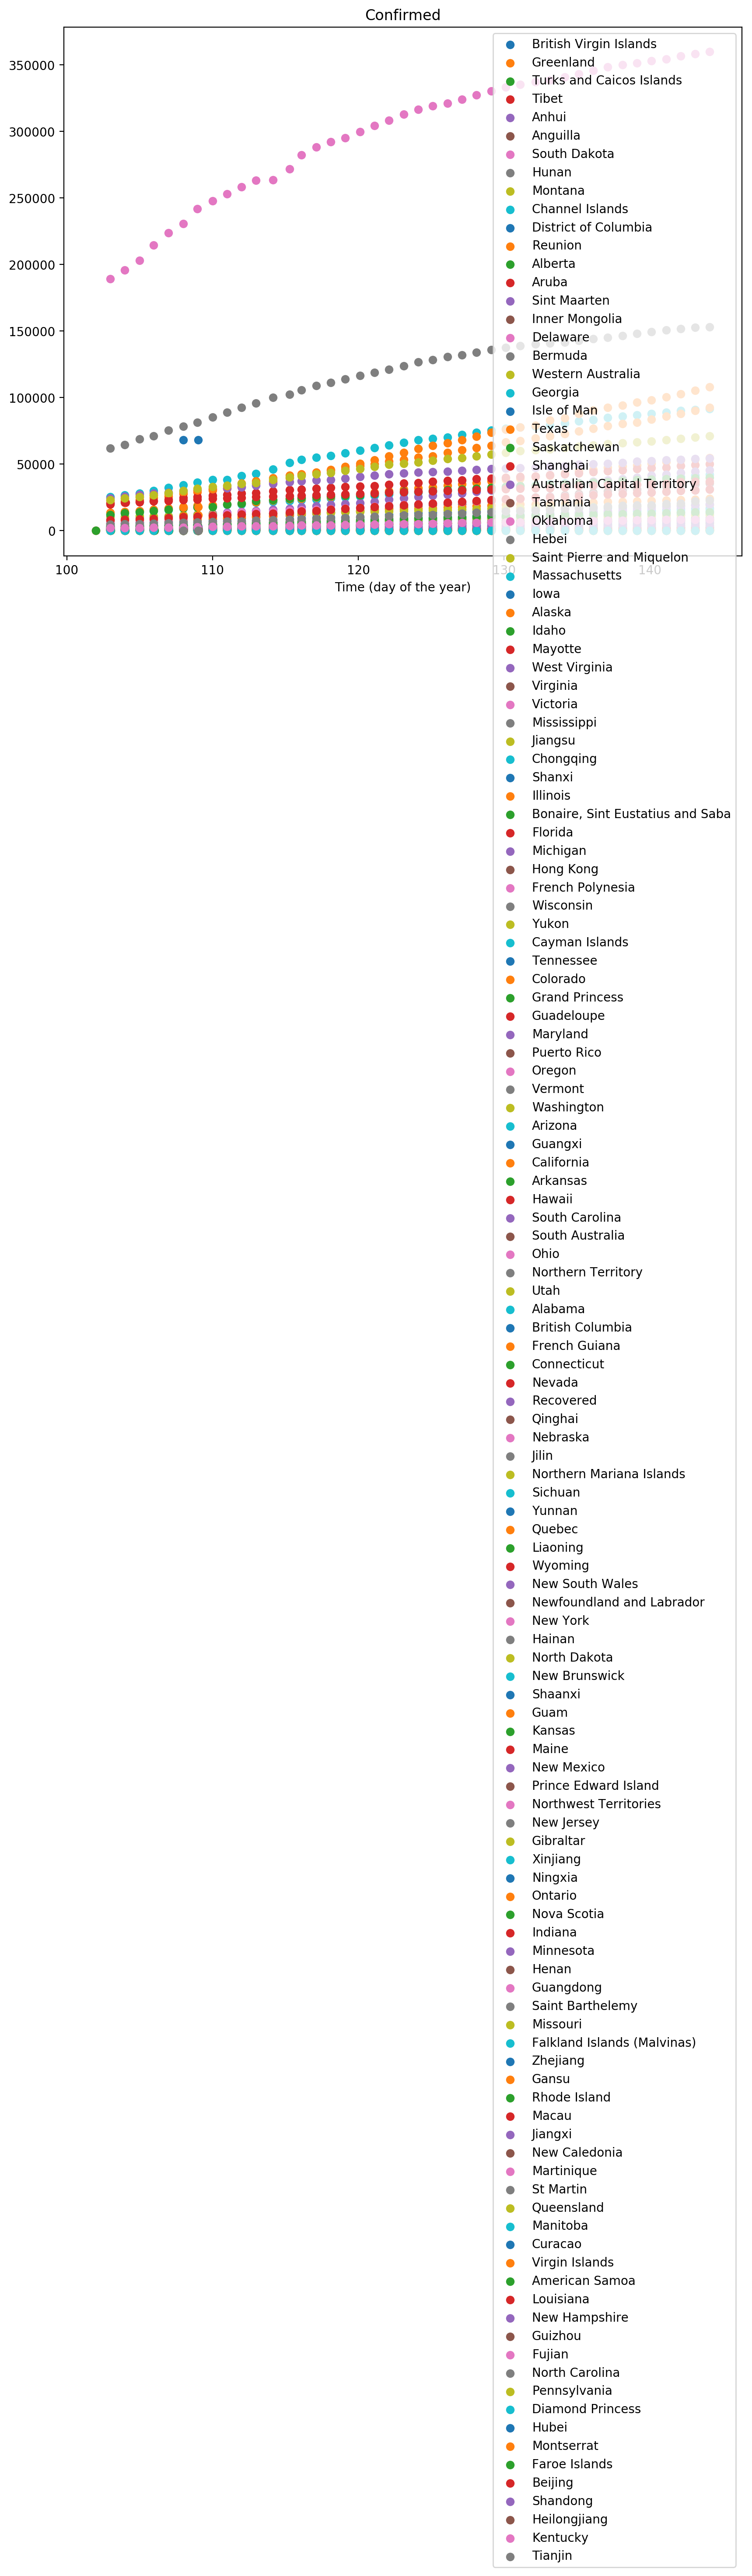

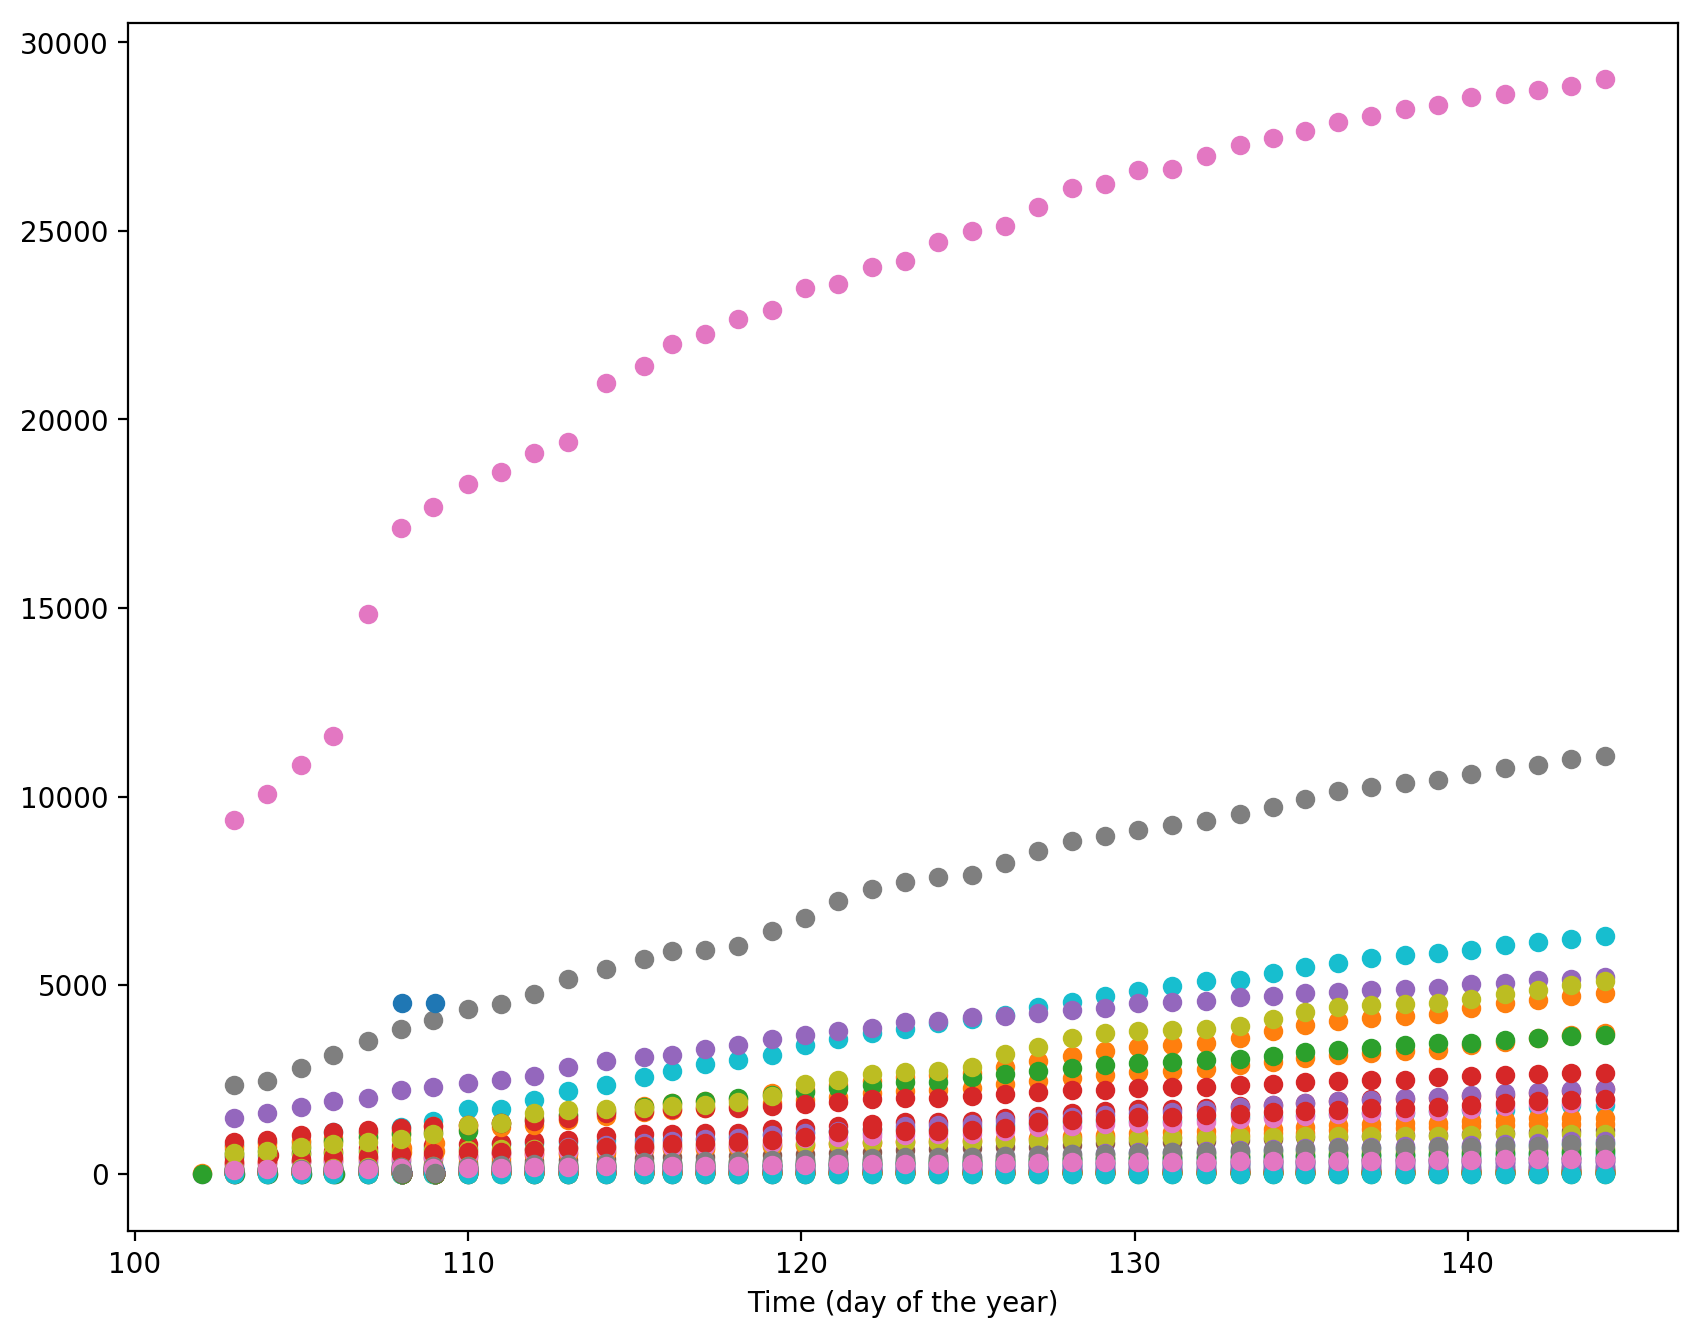

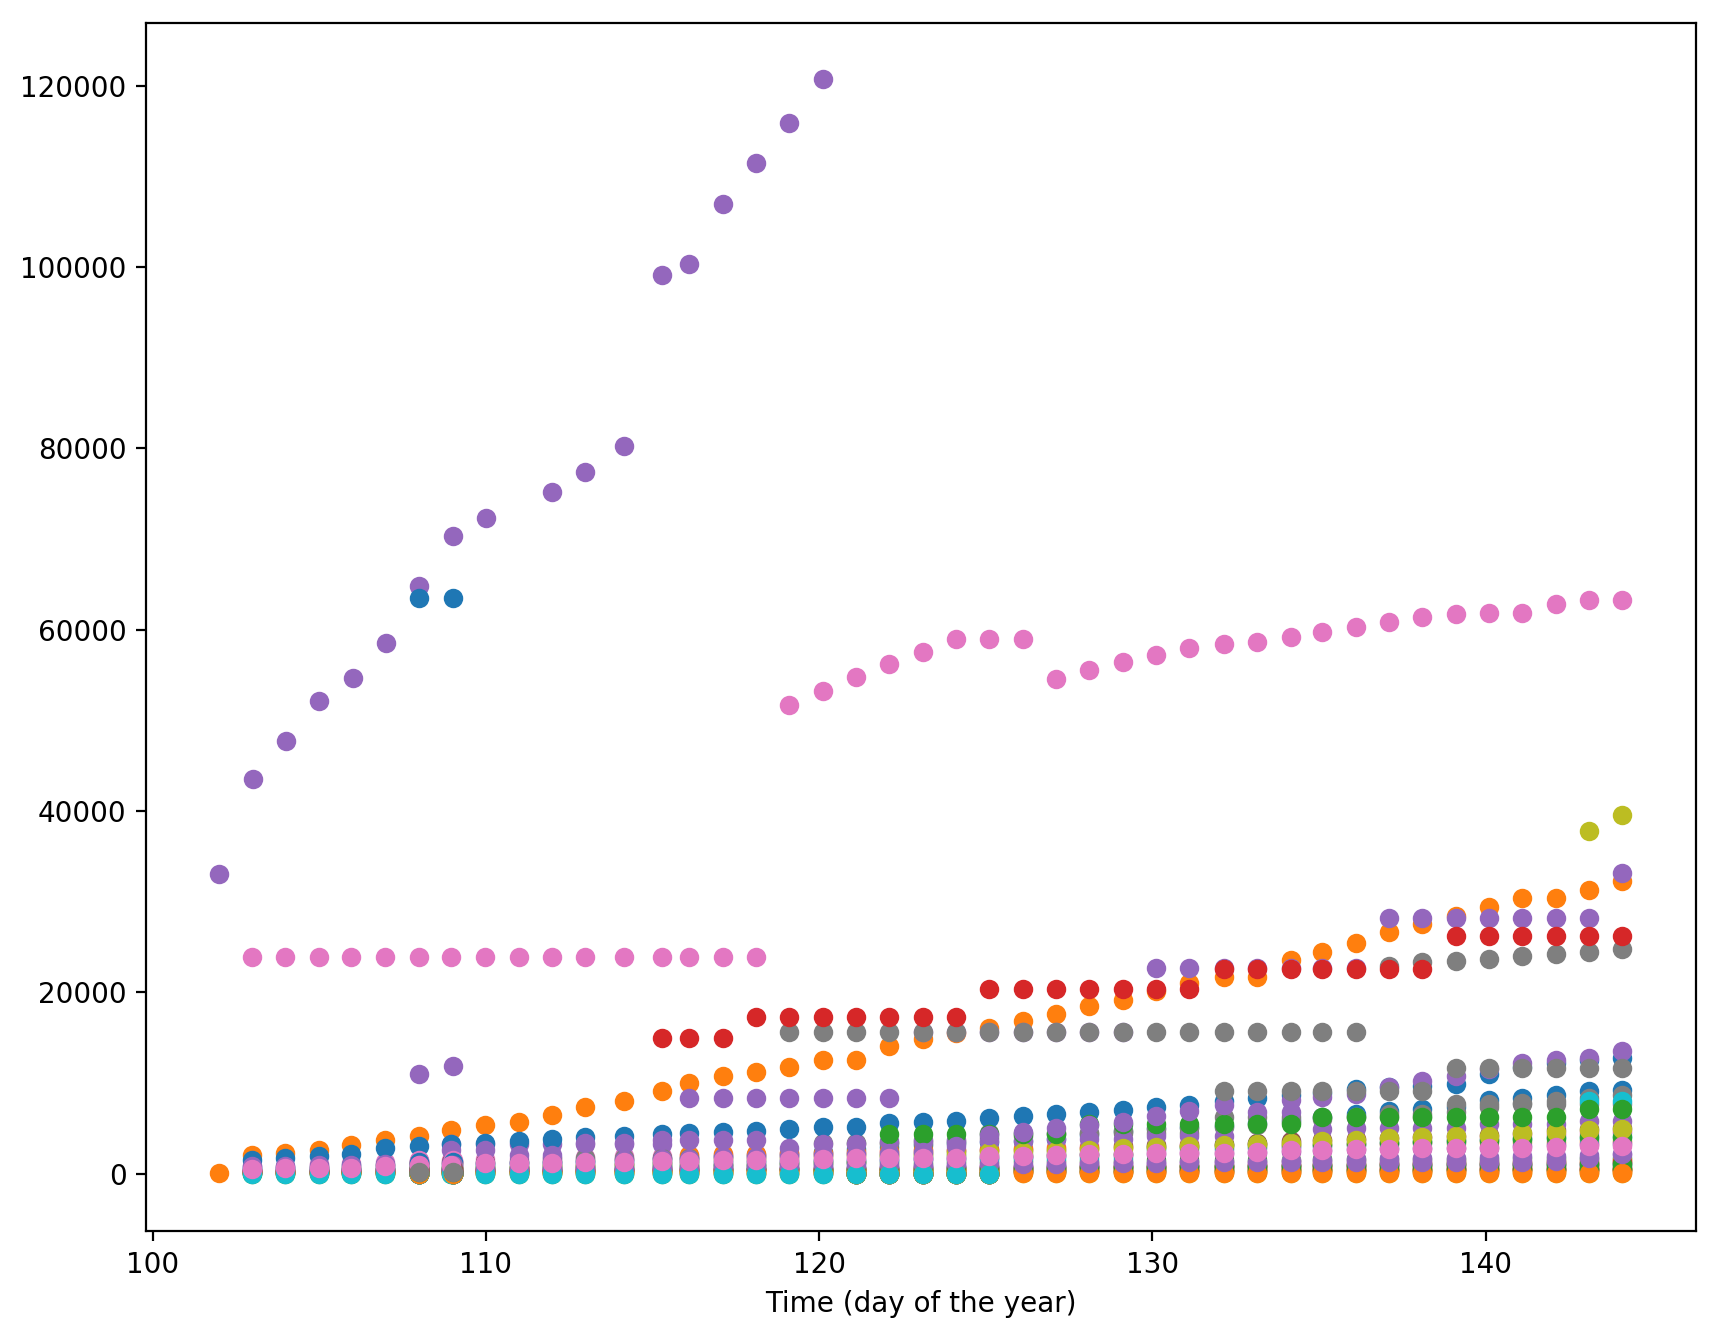

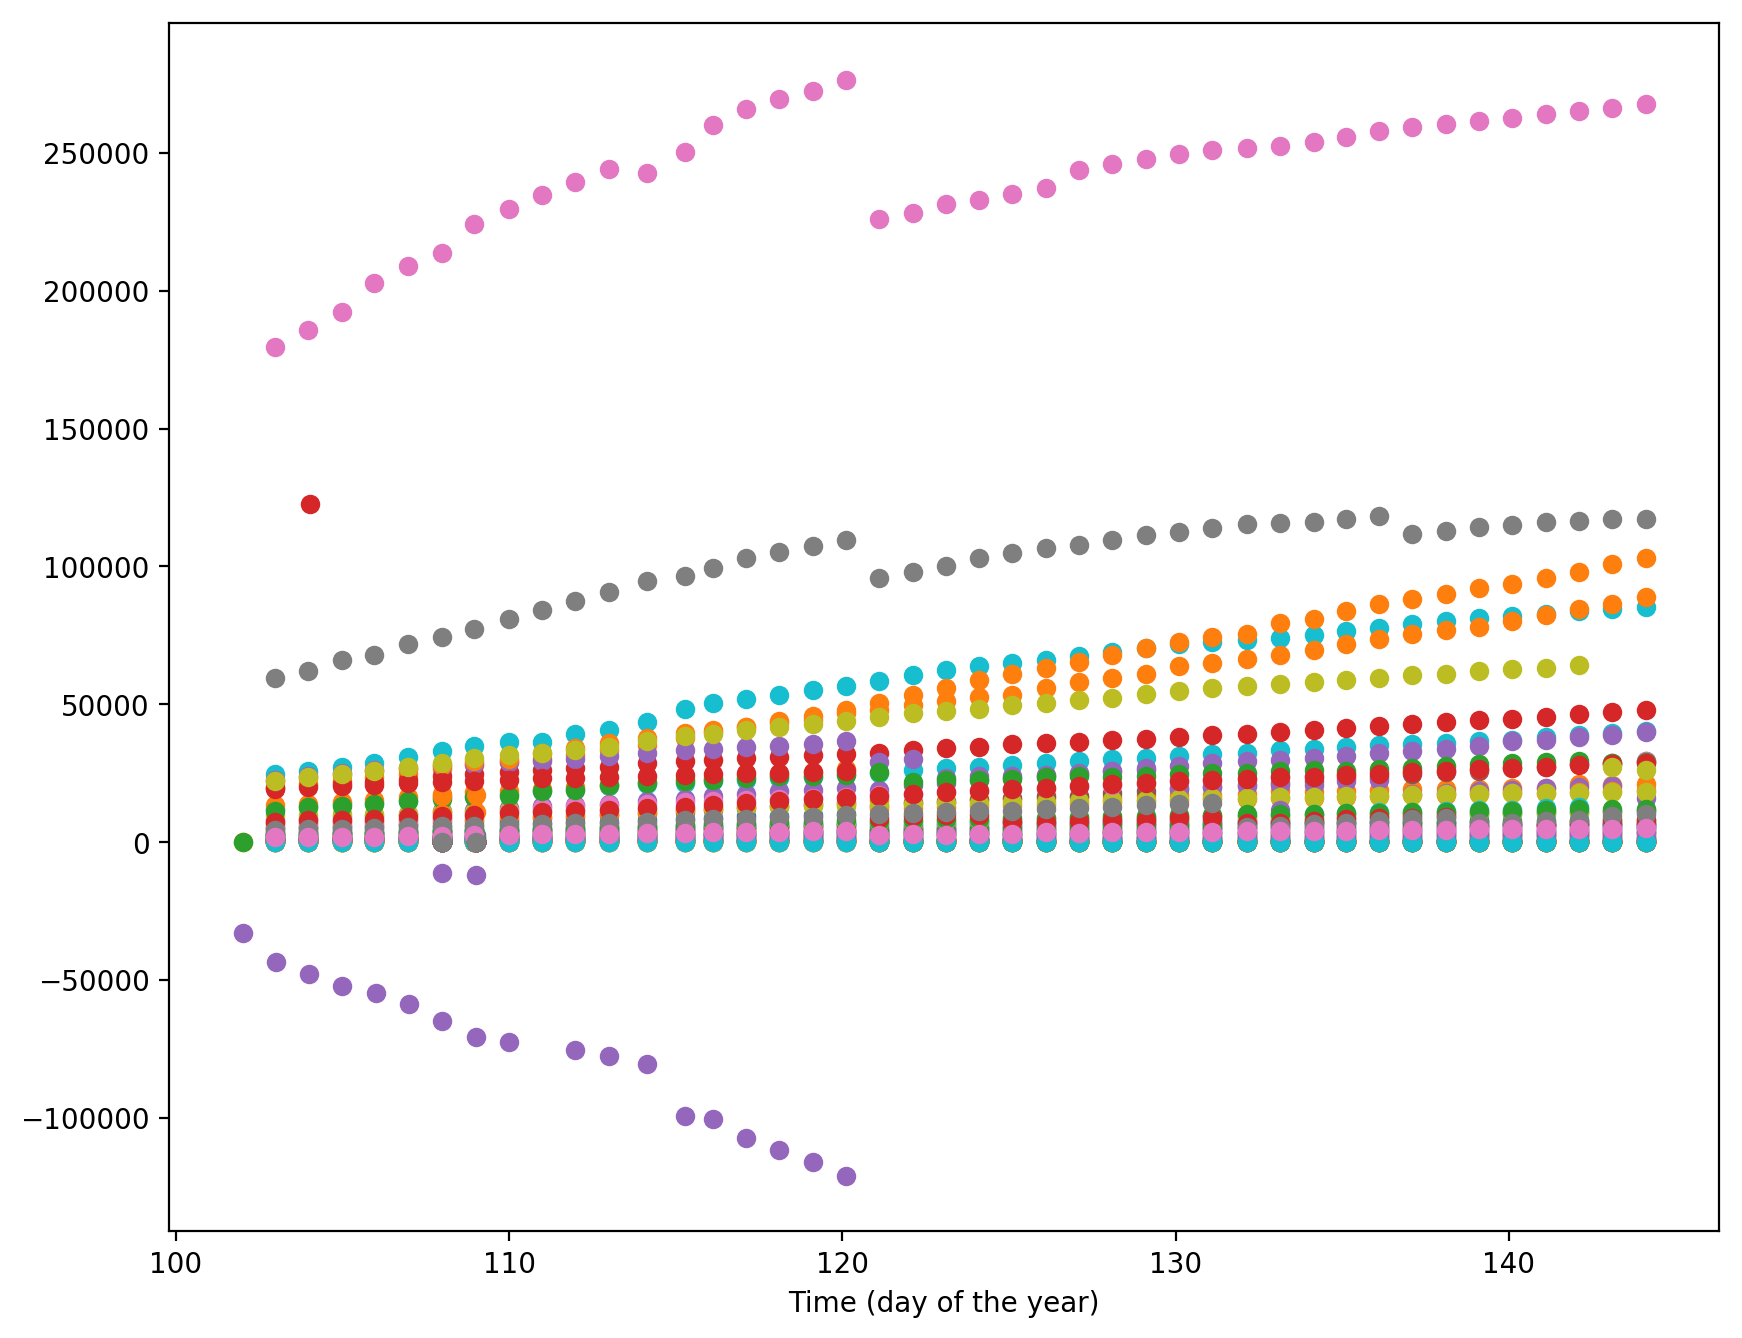

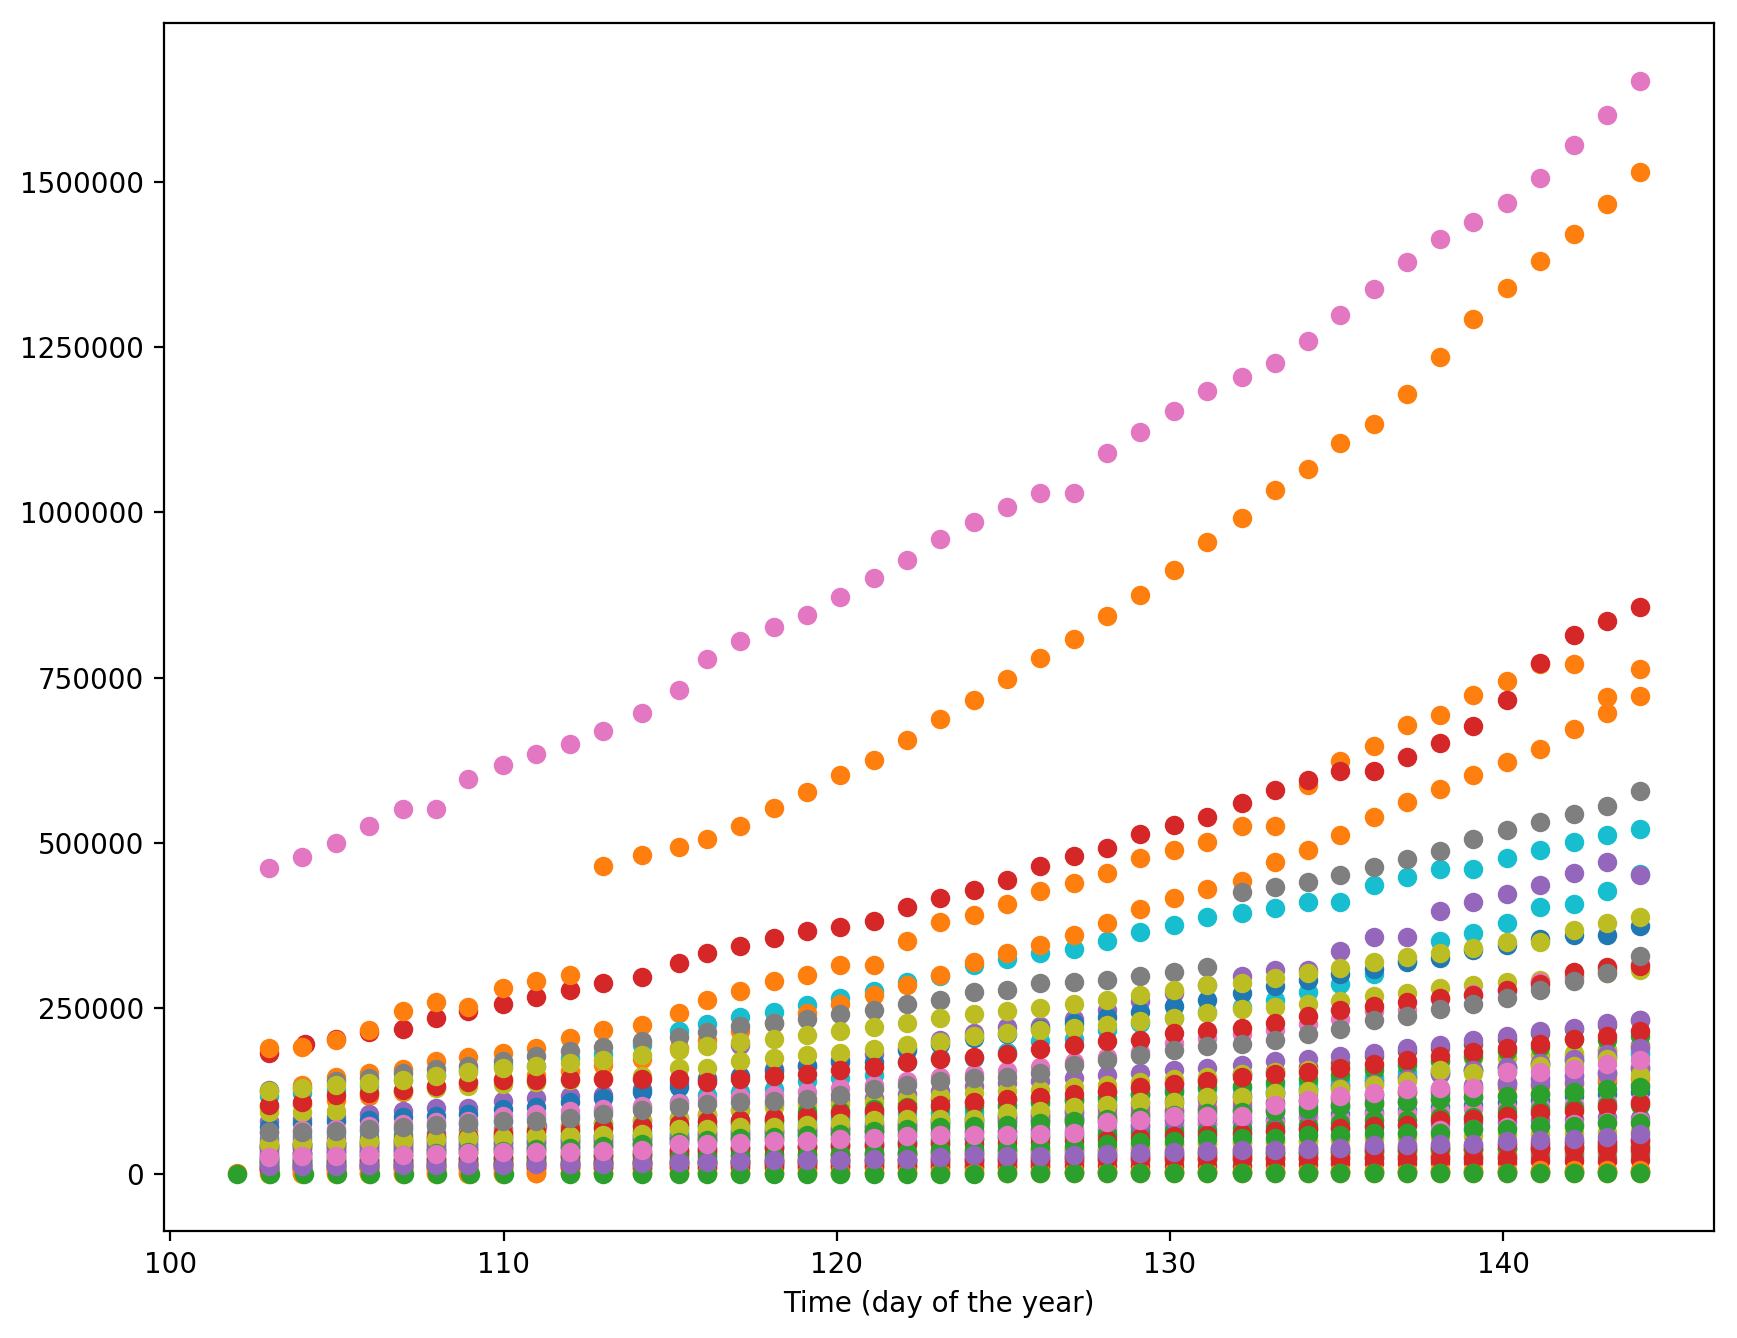

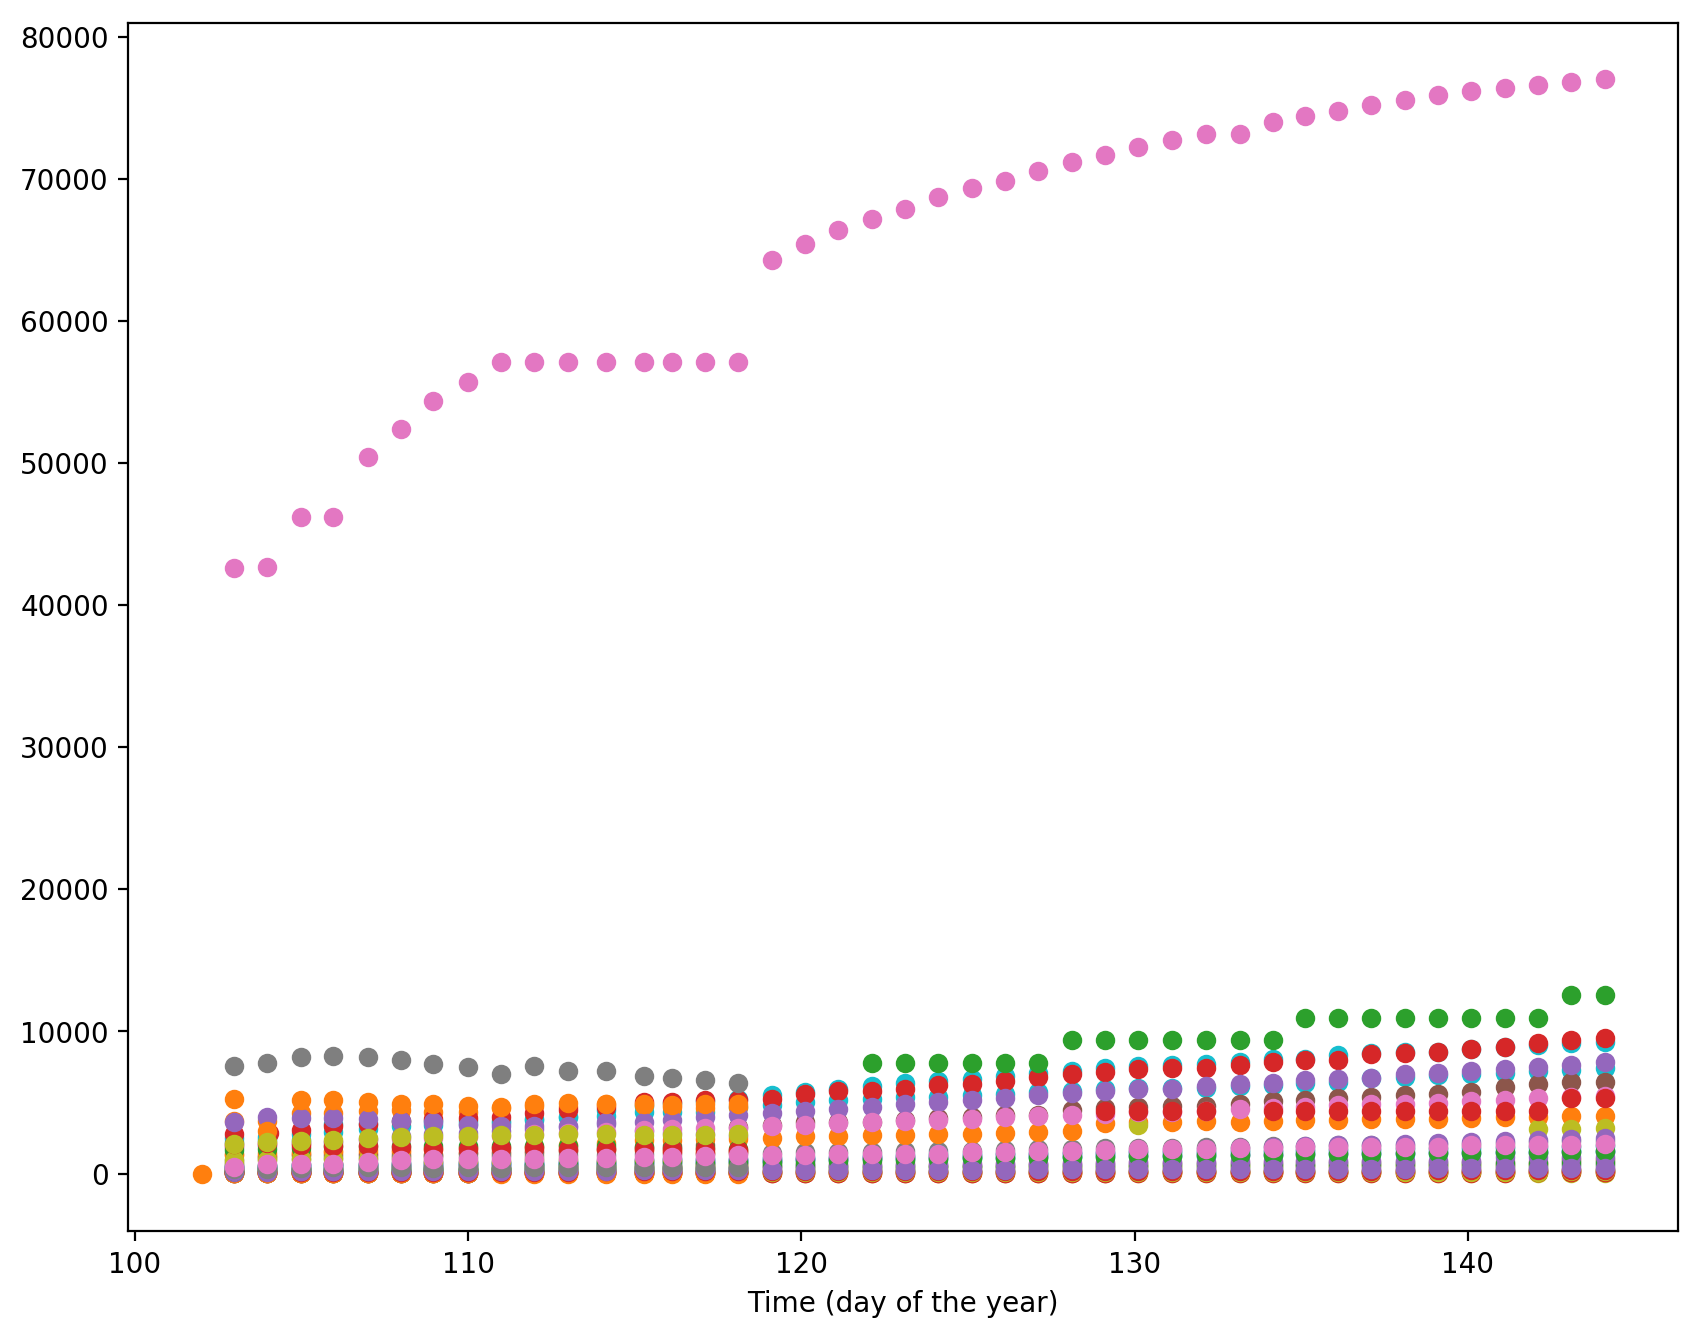

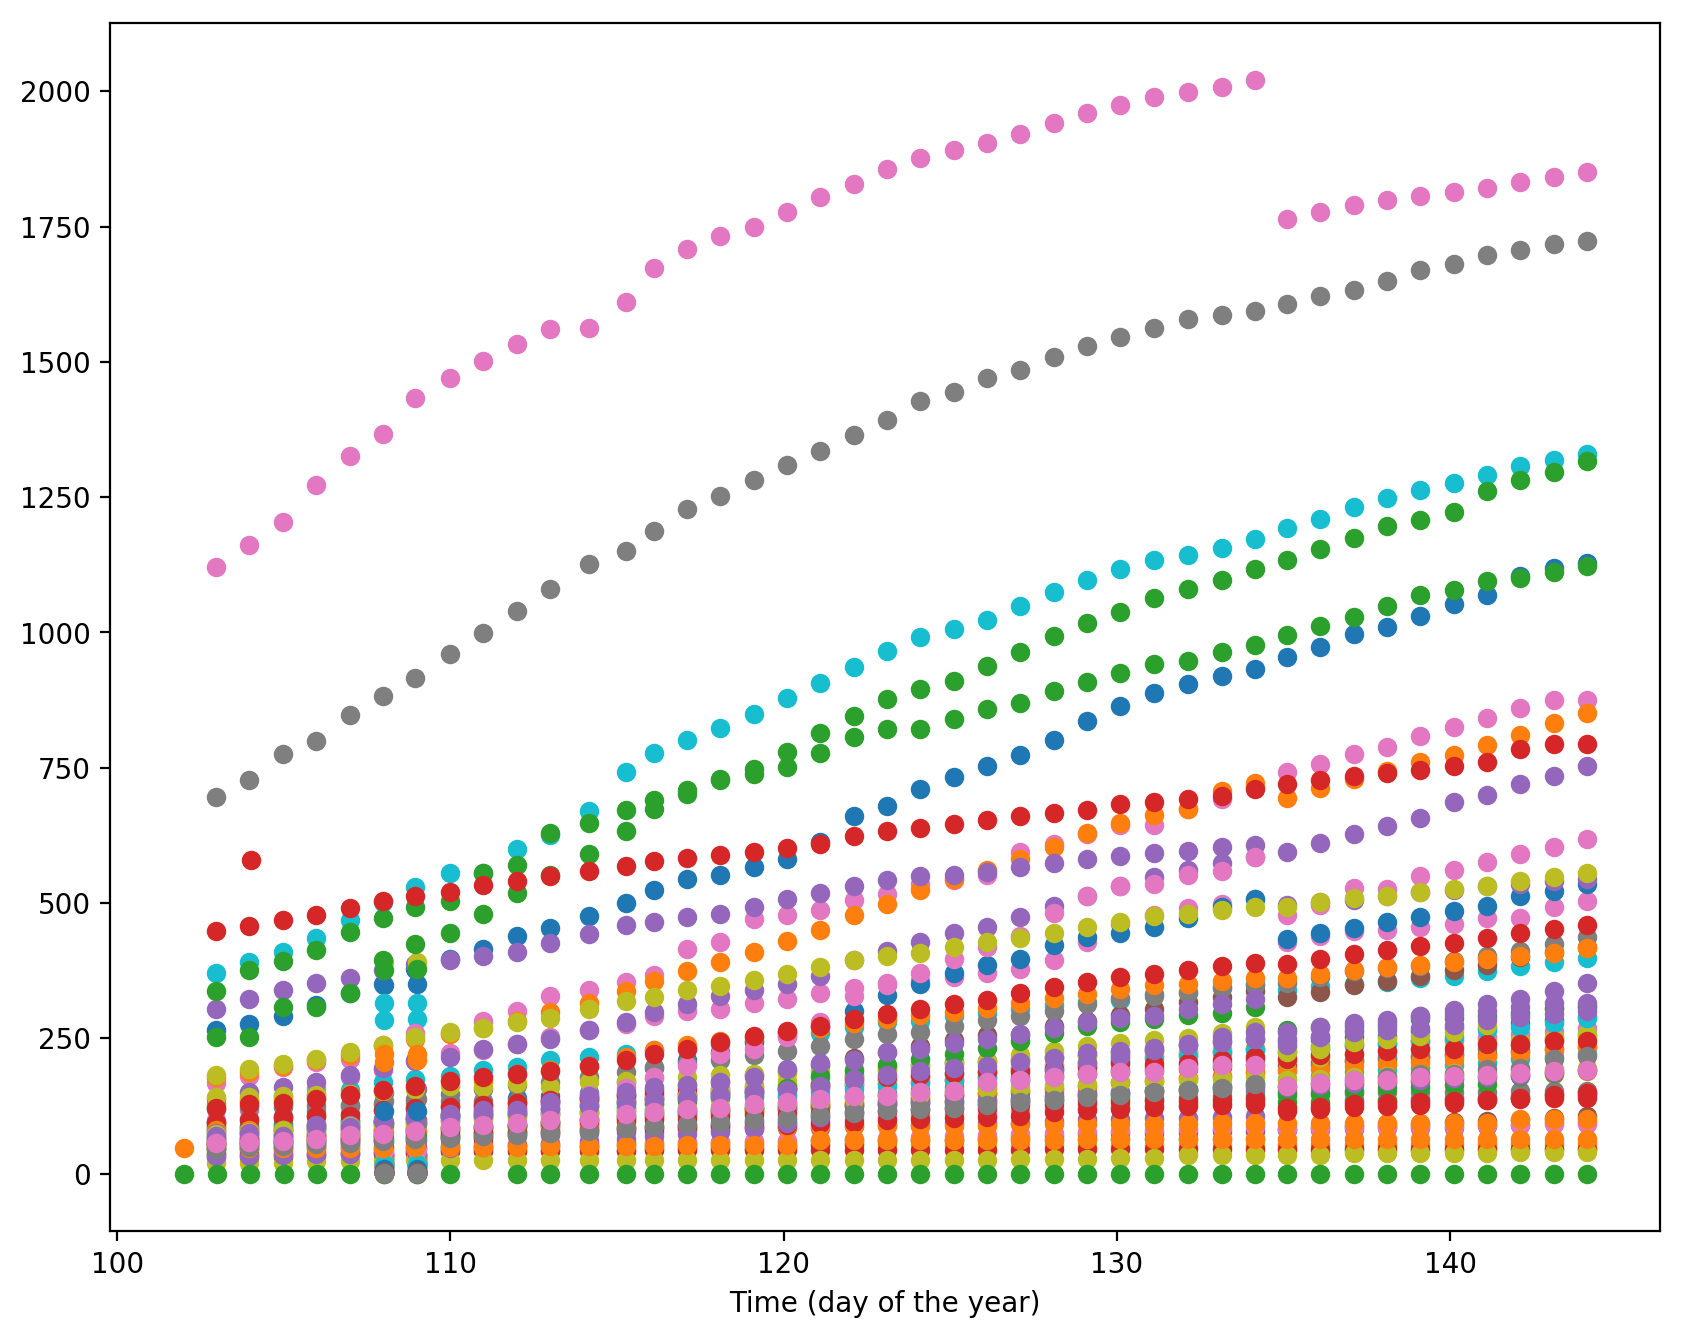

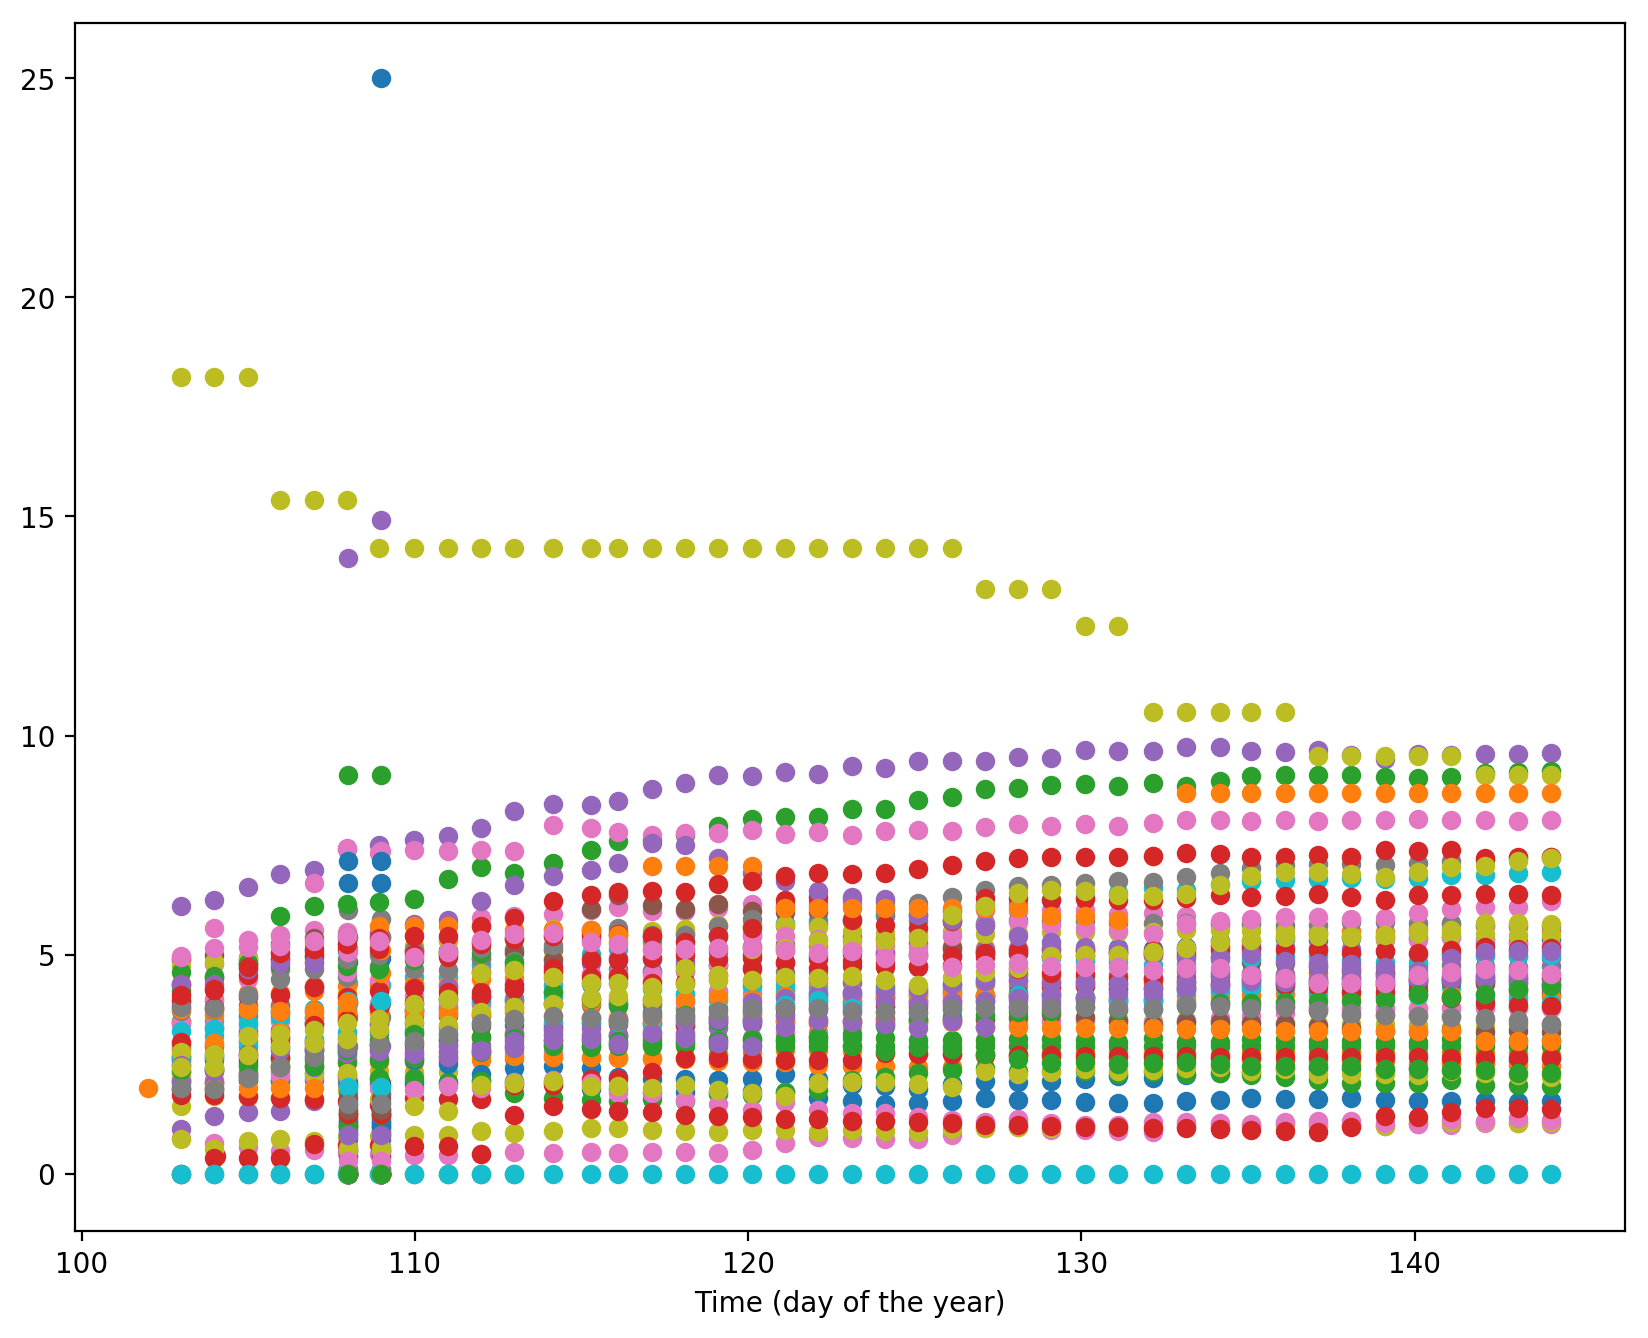

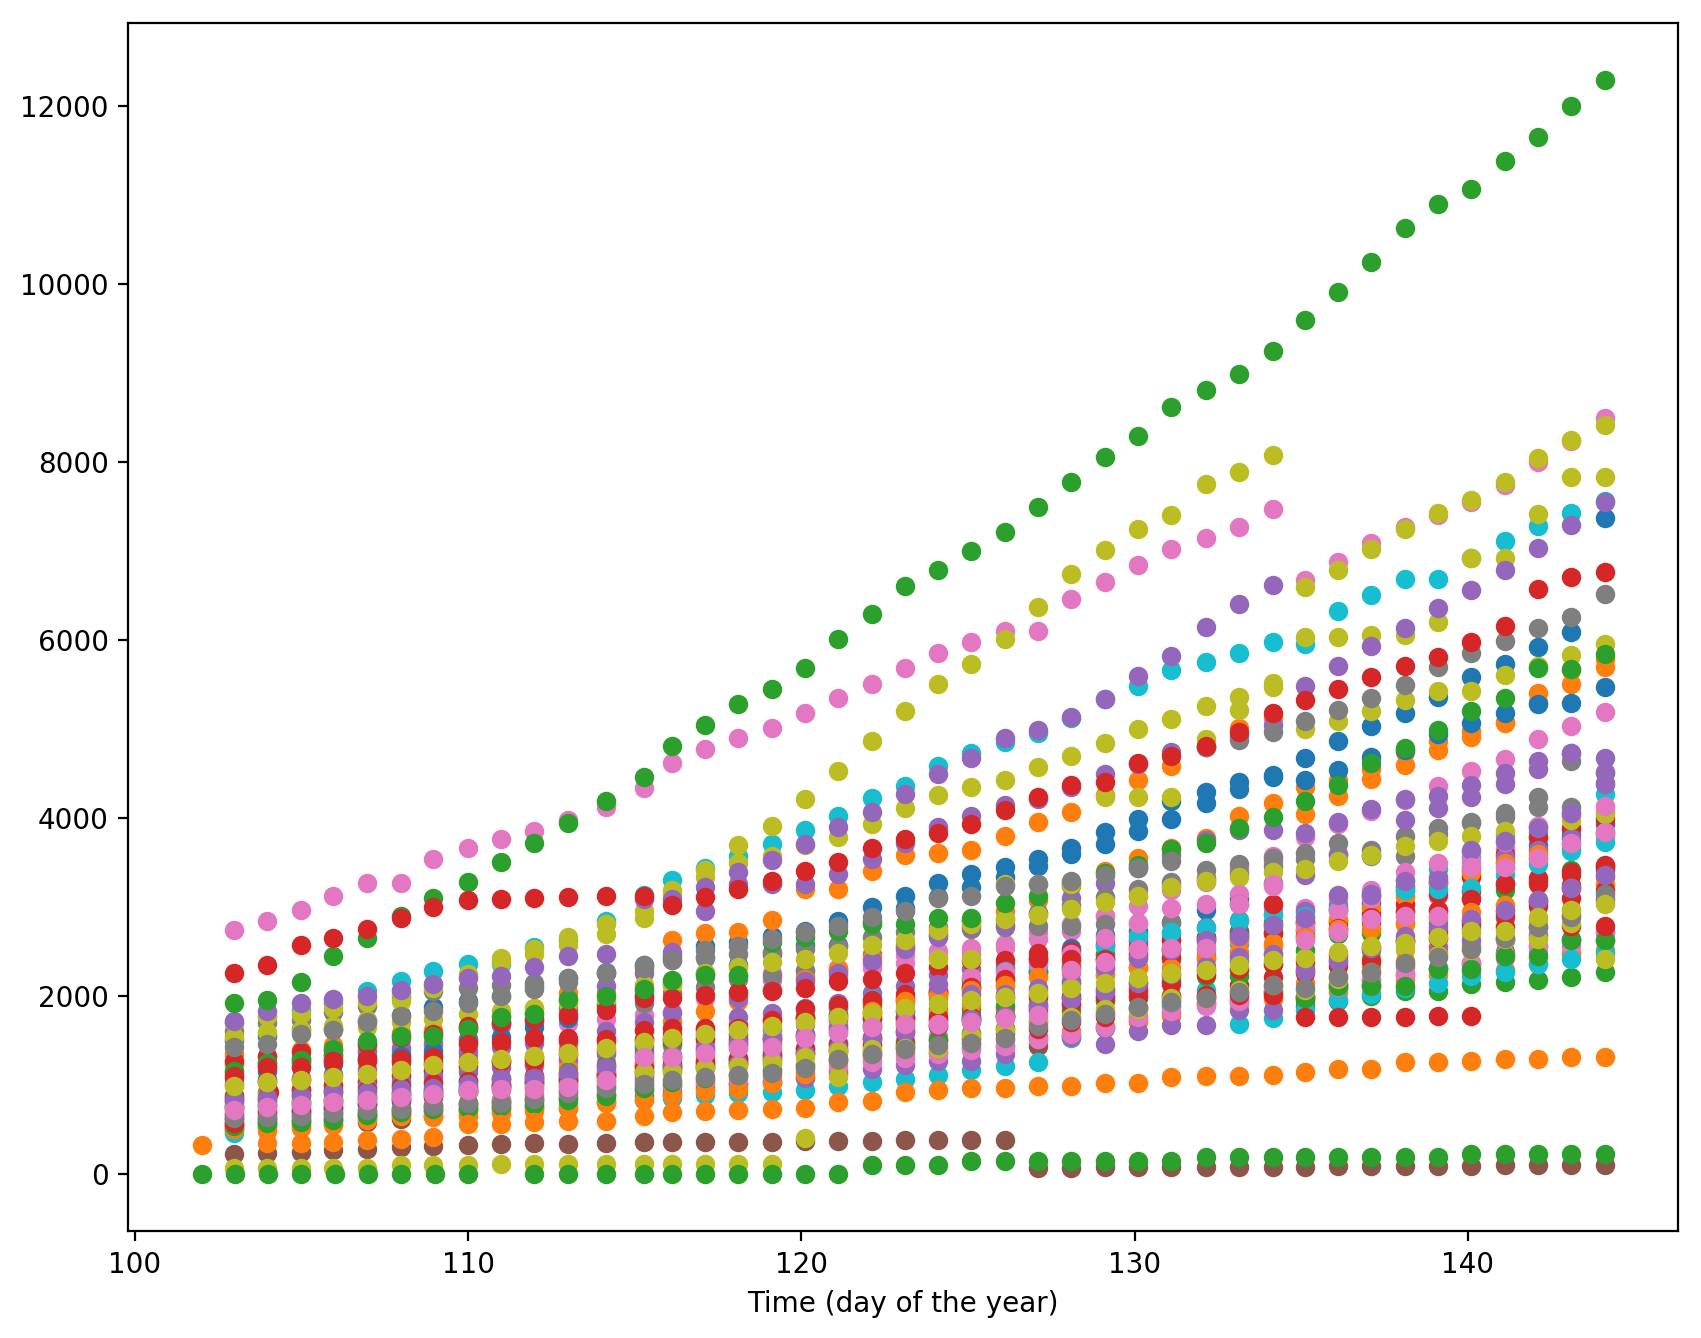

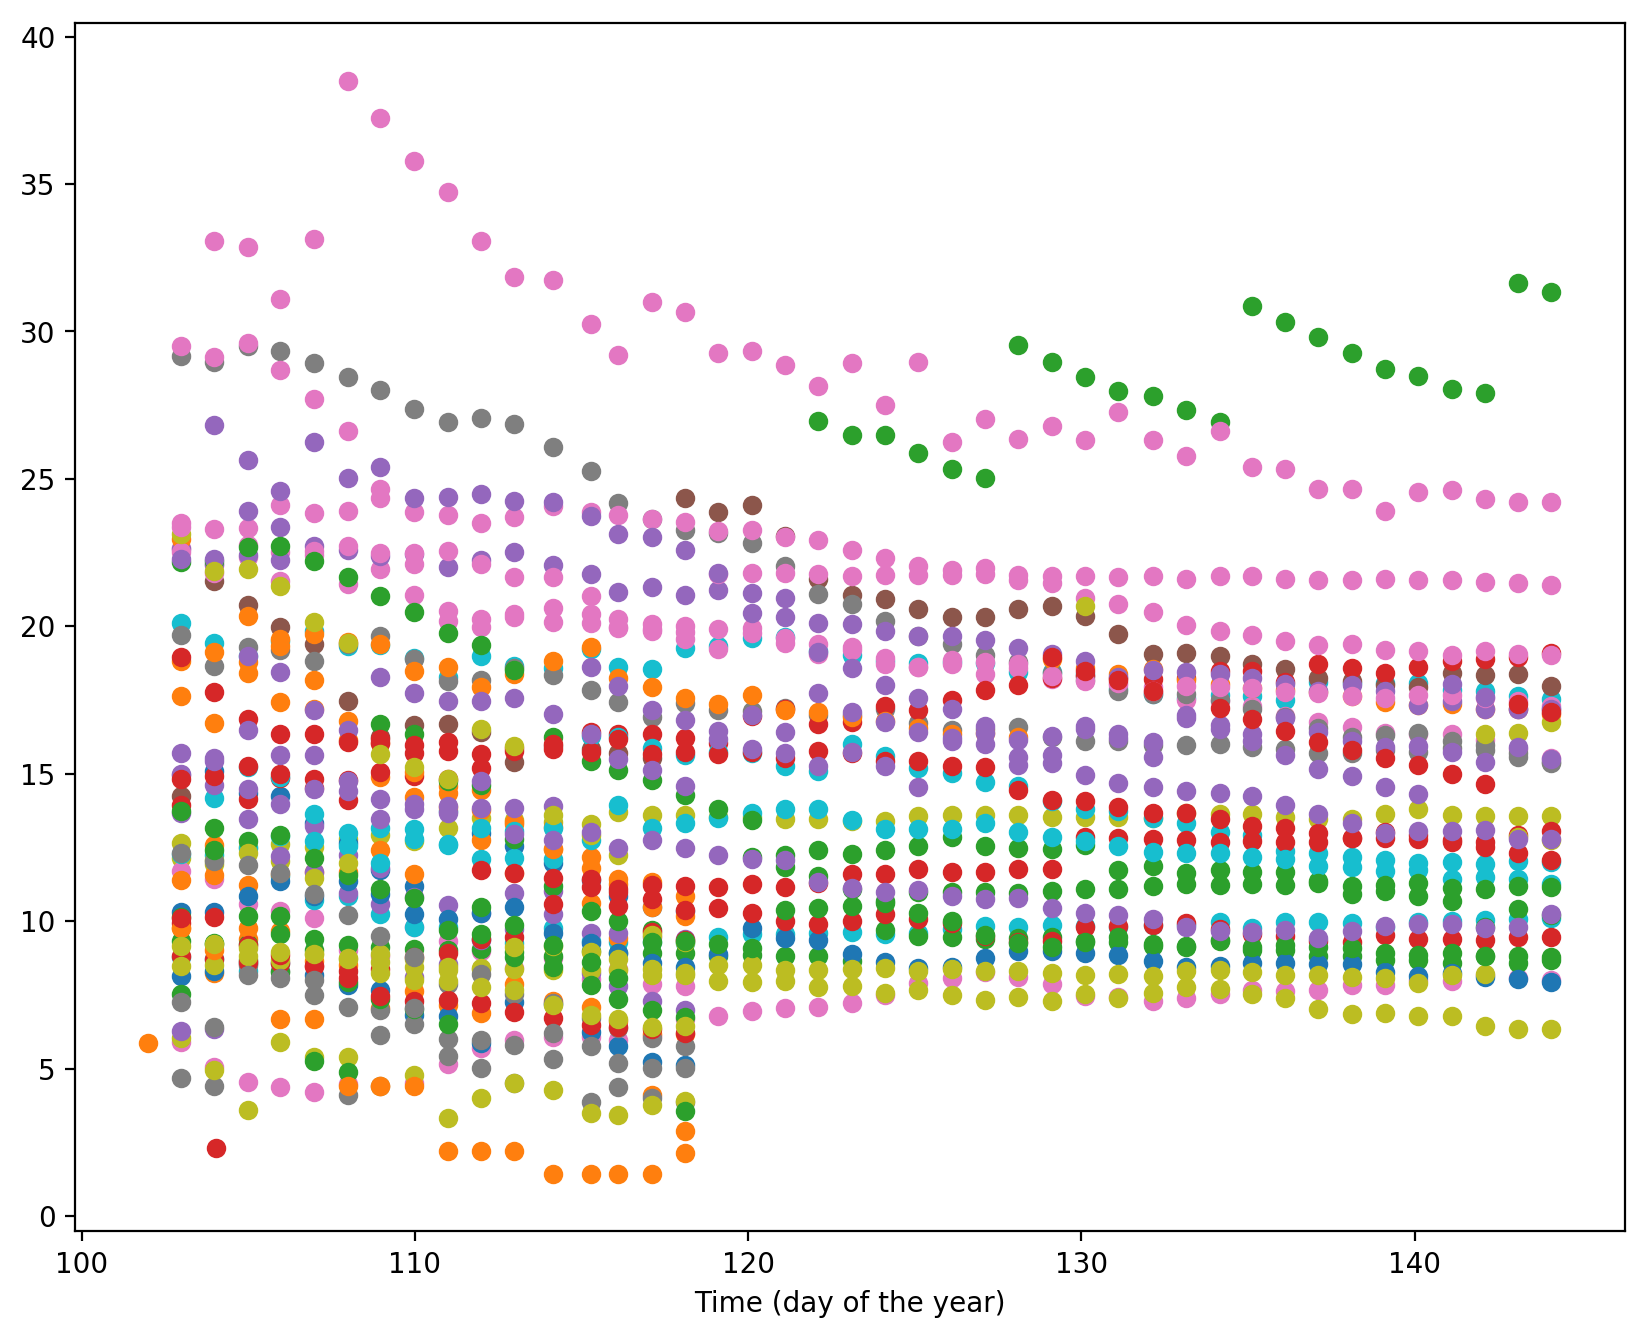

No handles with labels found to put in legend.


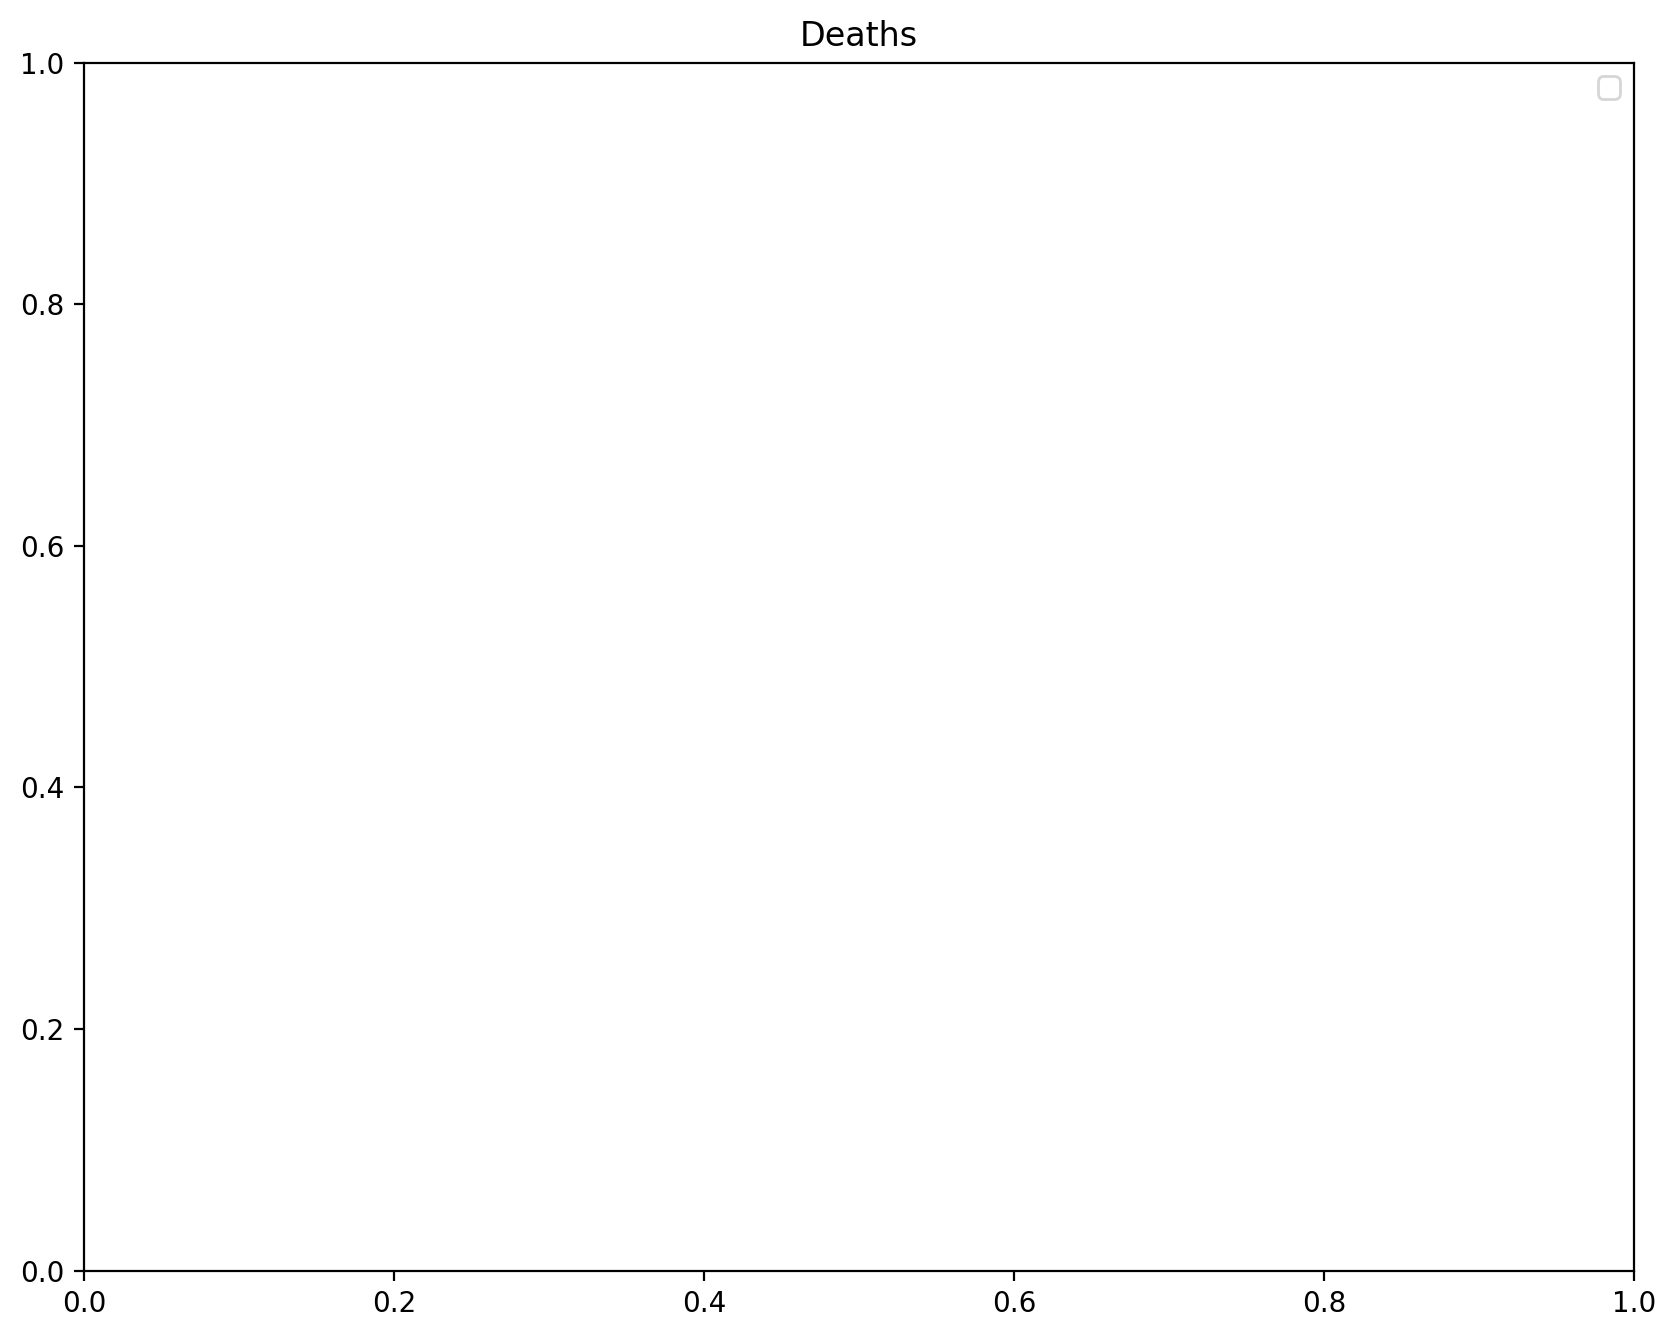

No handles with labels found to put in legend.


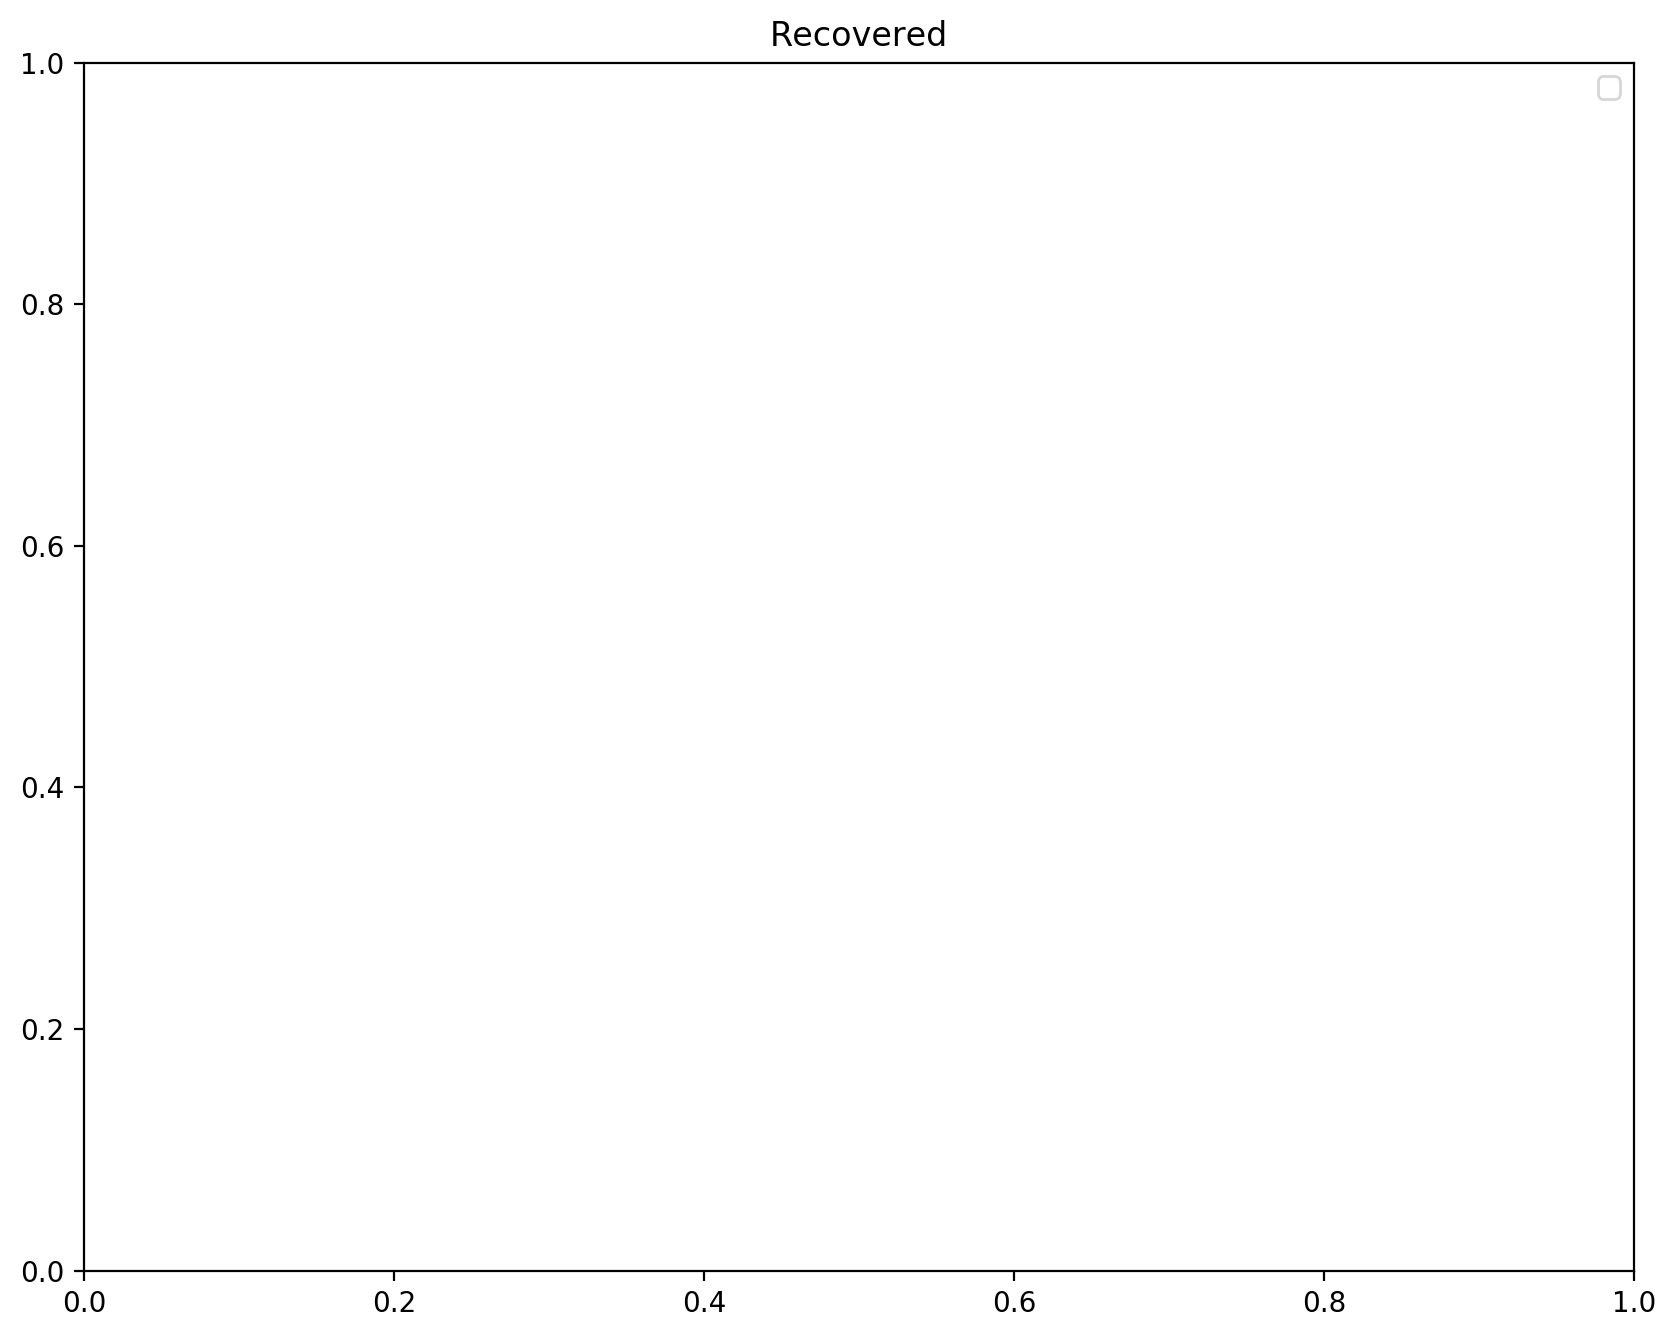

No handles with labels found to put in legend.


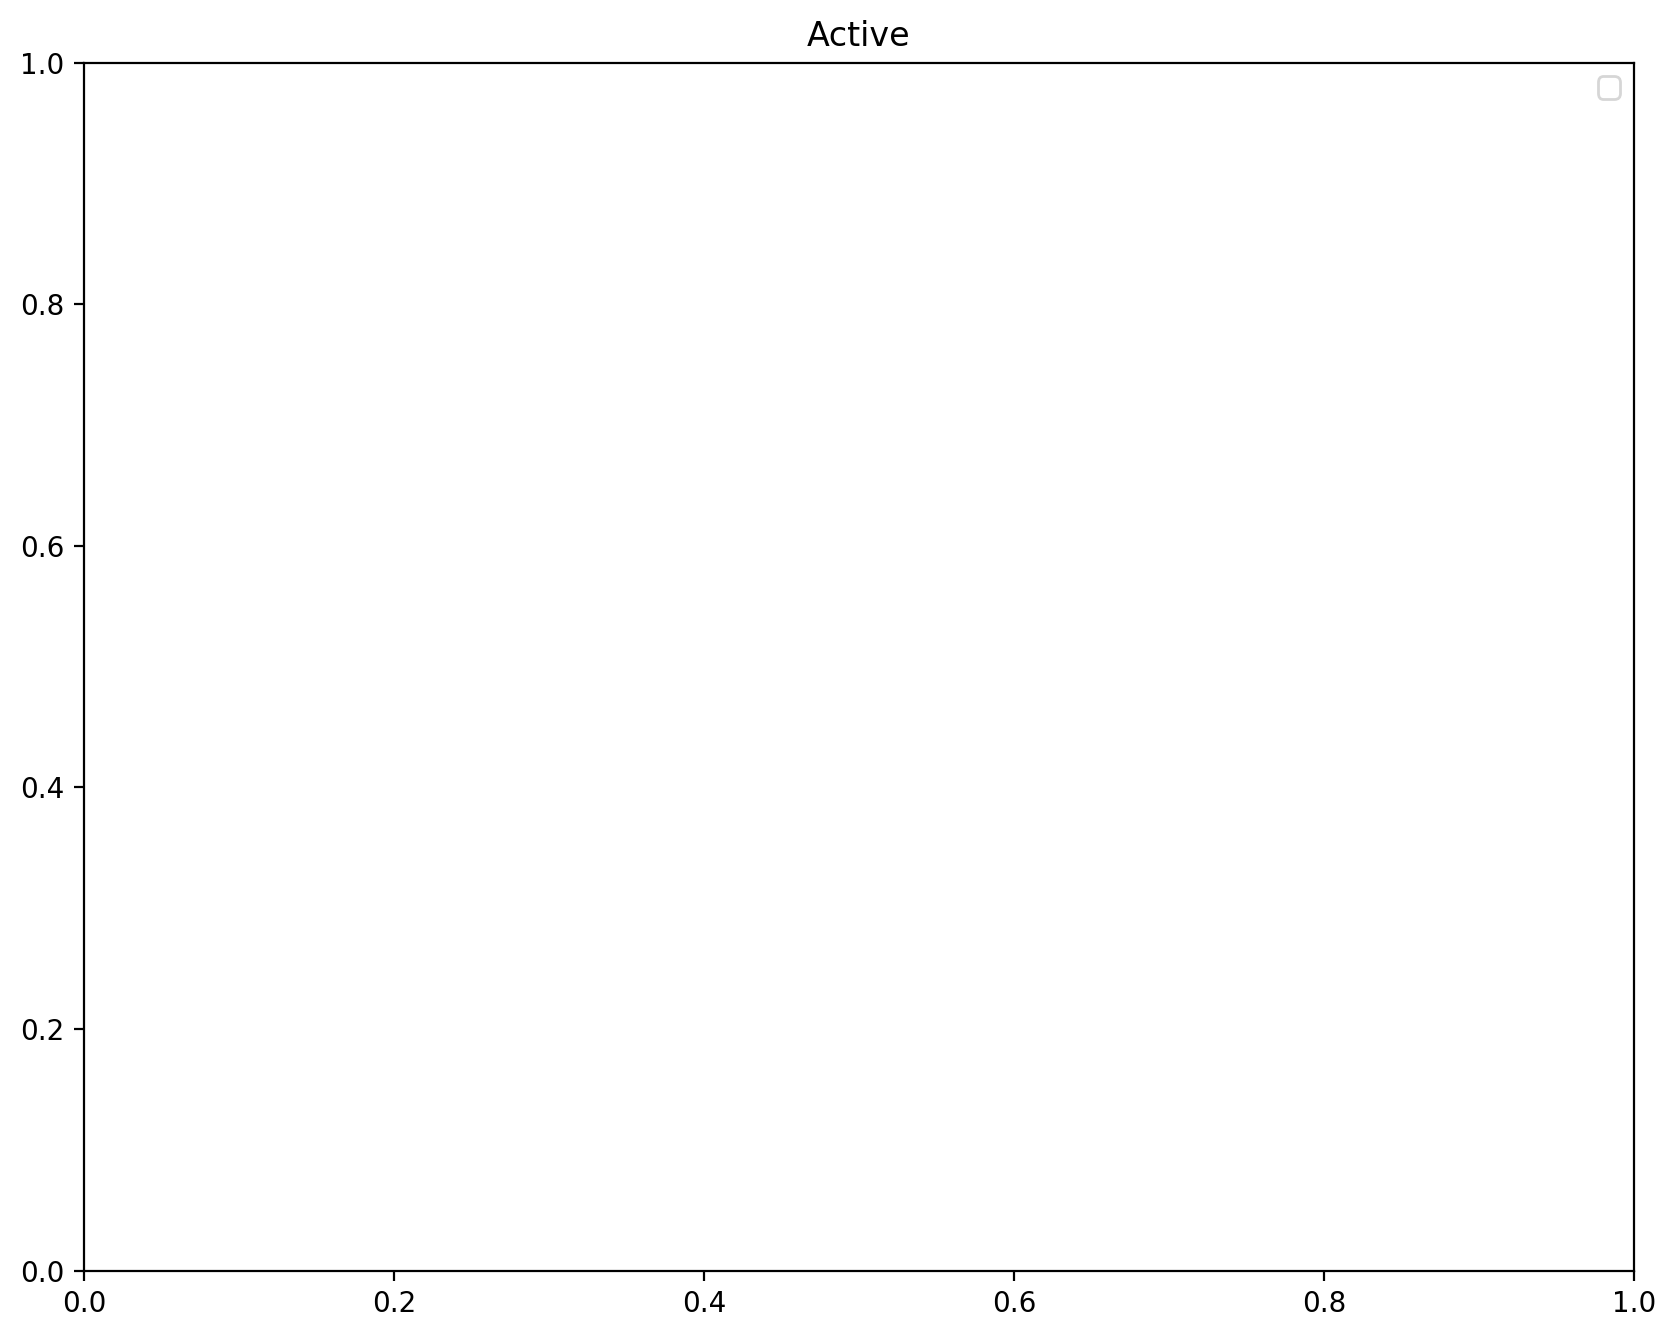

No handles with labels found to put in legend.


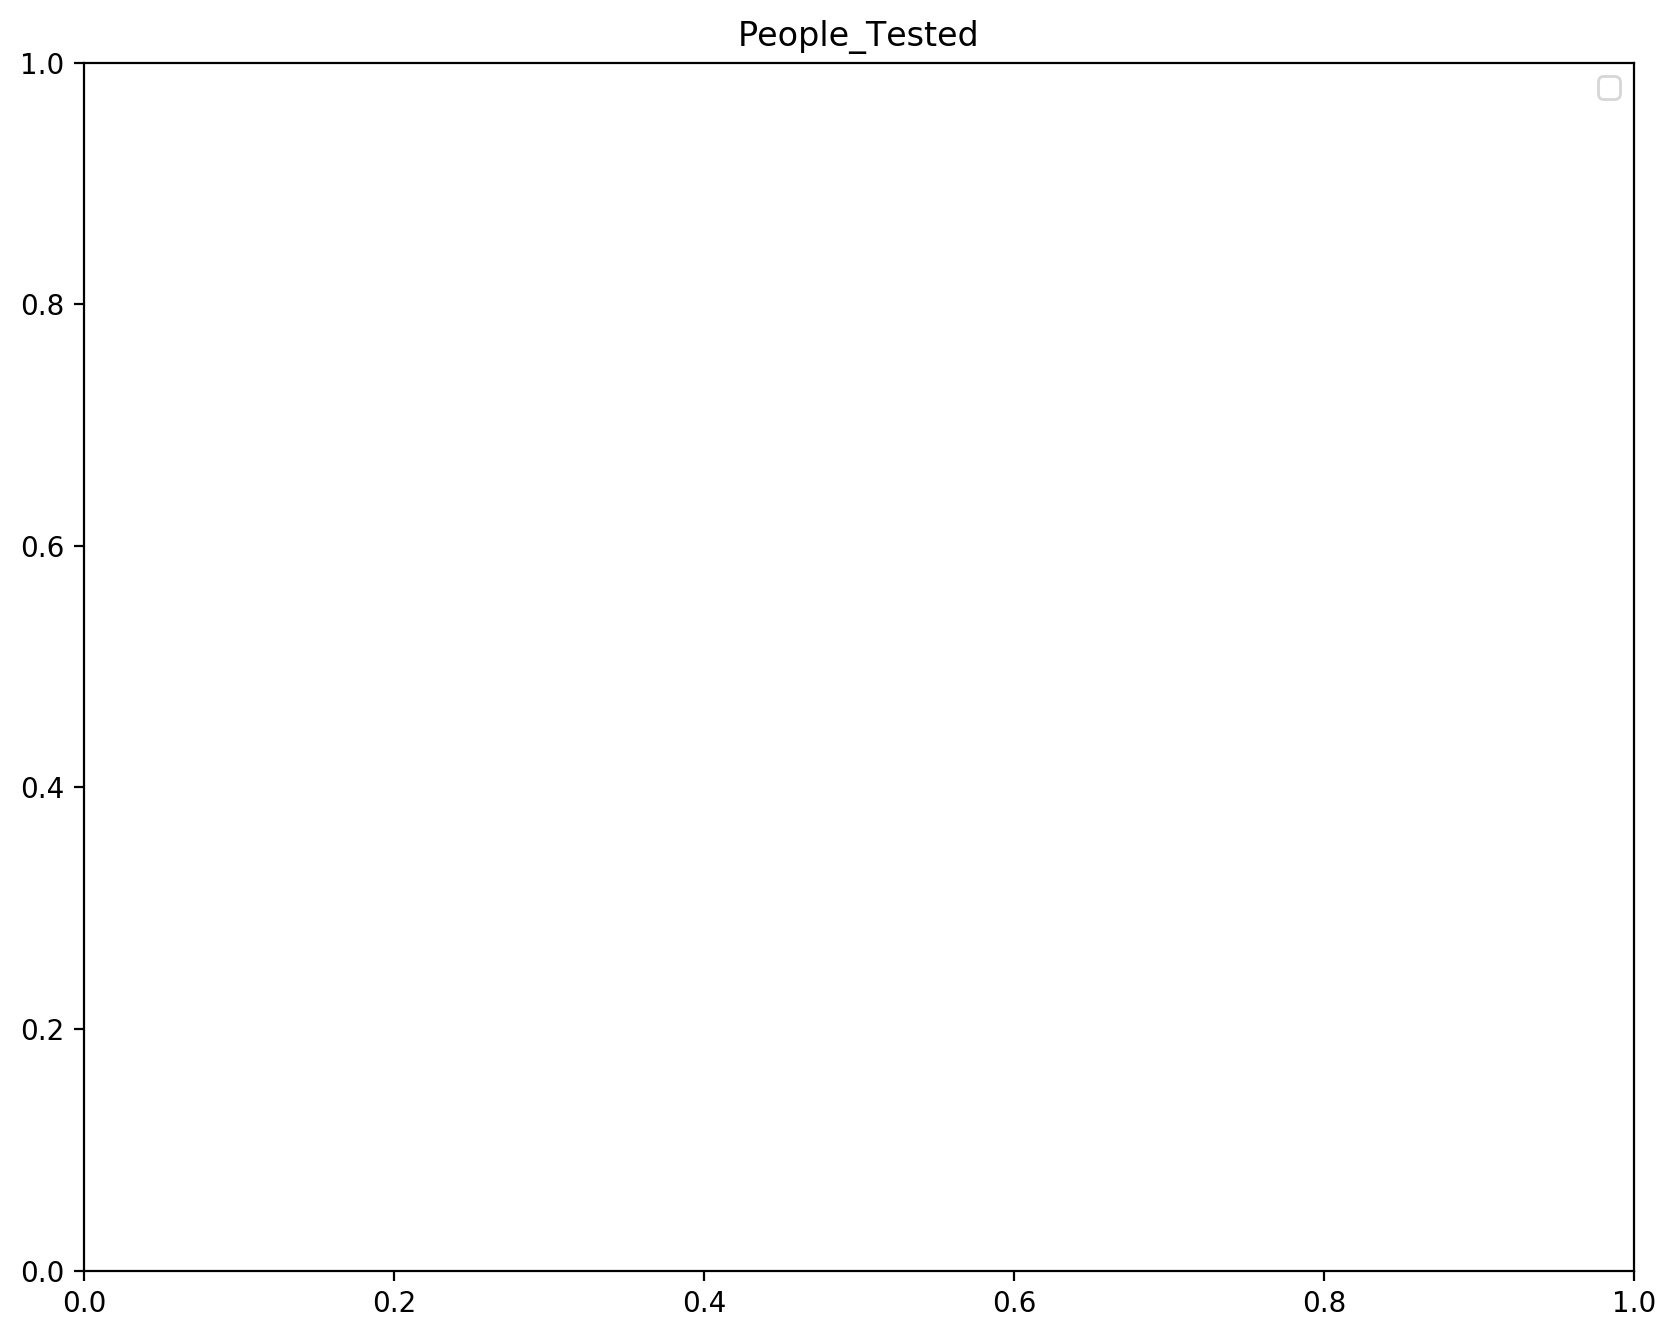

No handles with labels found to put in legend.


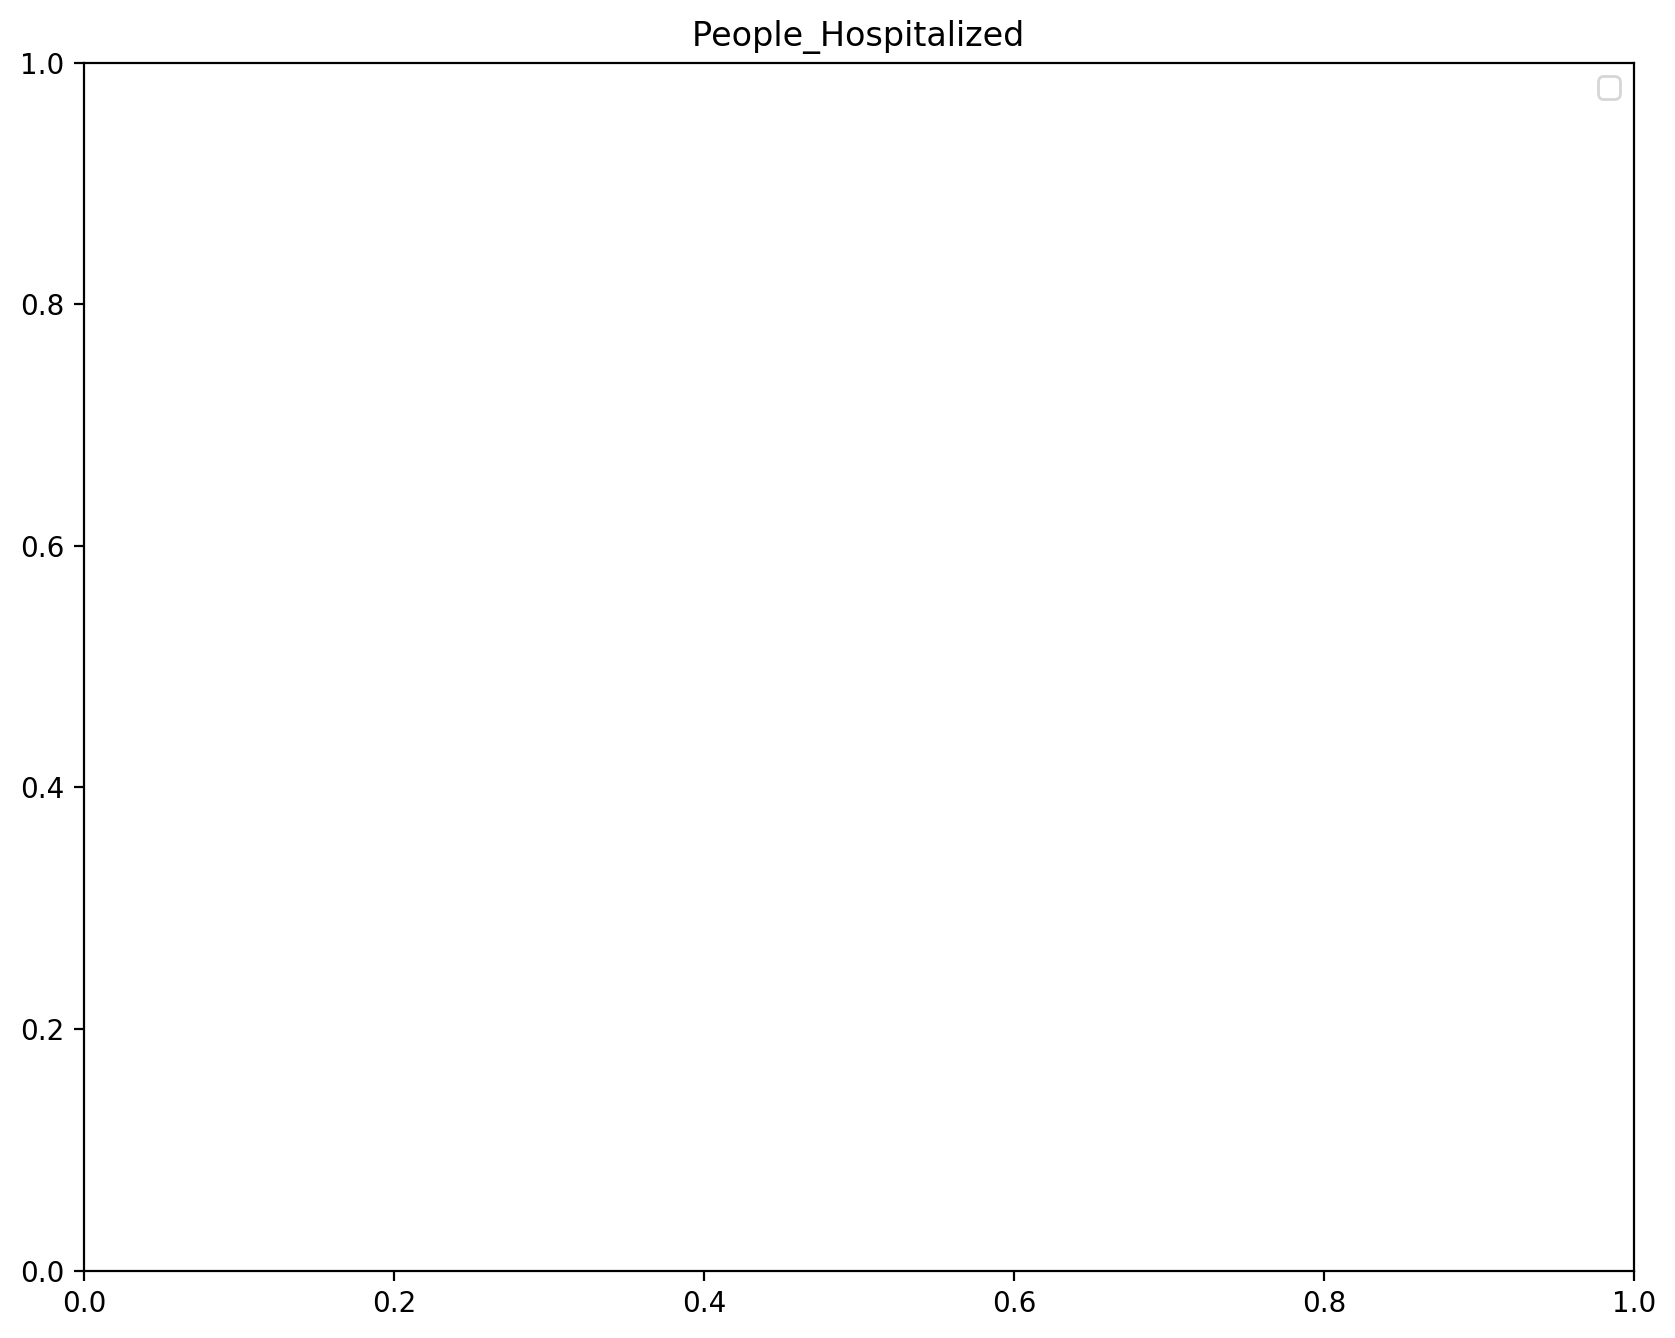

No handles with labels found to put in legend.


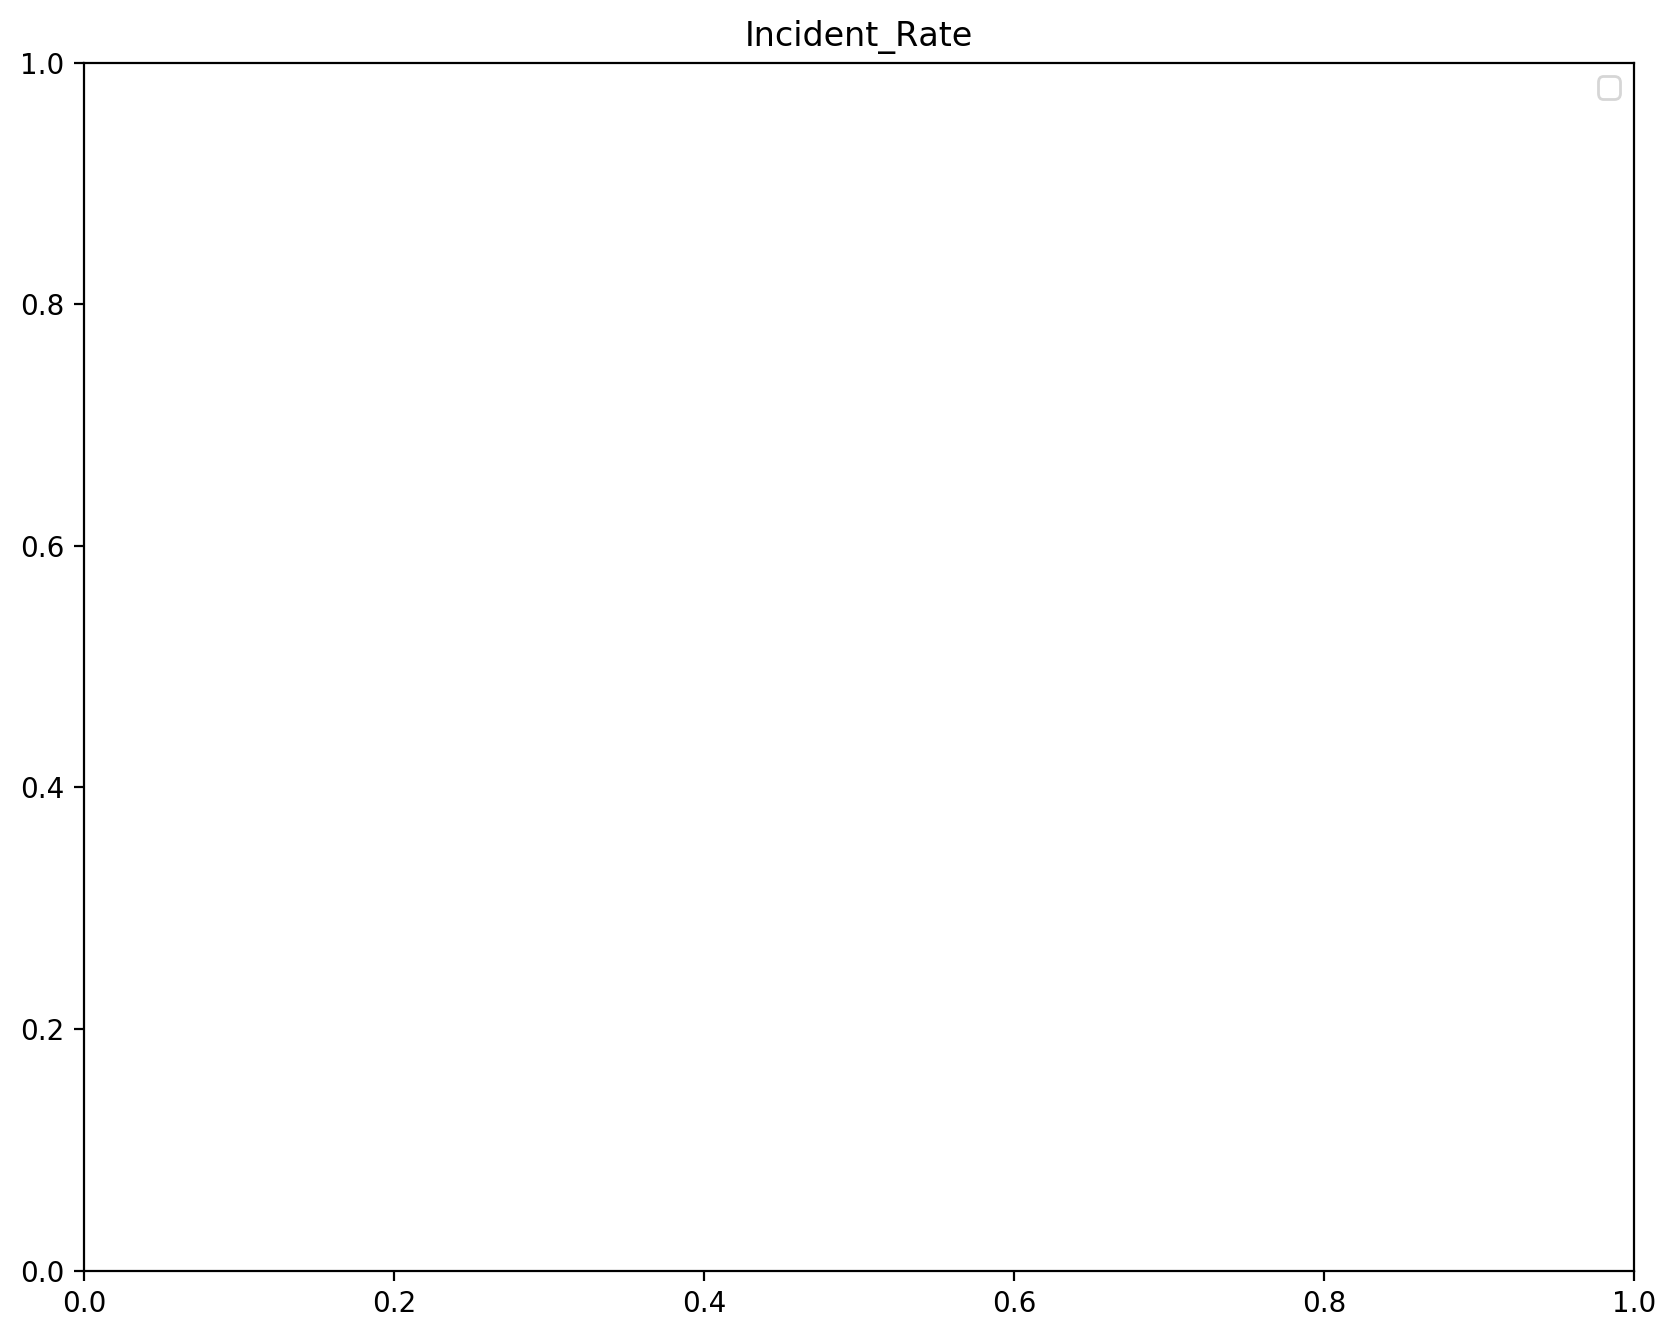

No handles with labels found to put in legend.


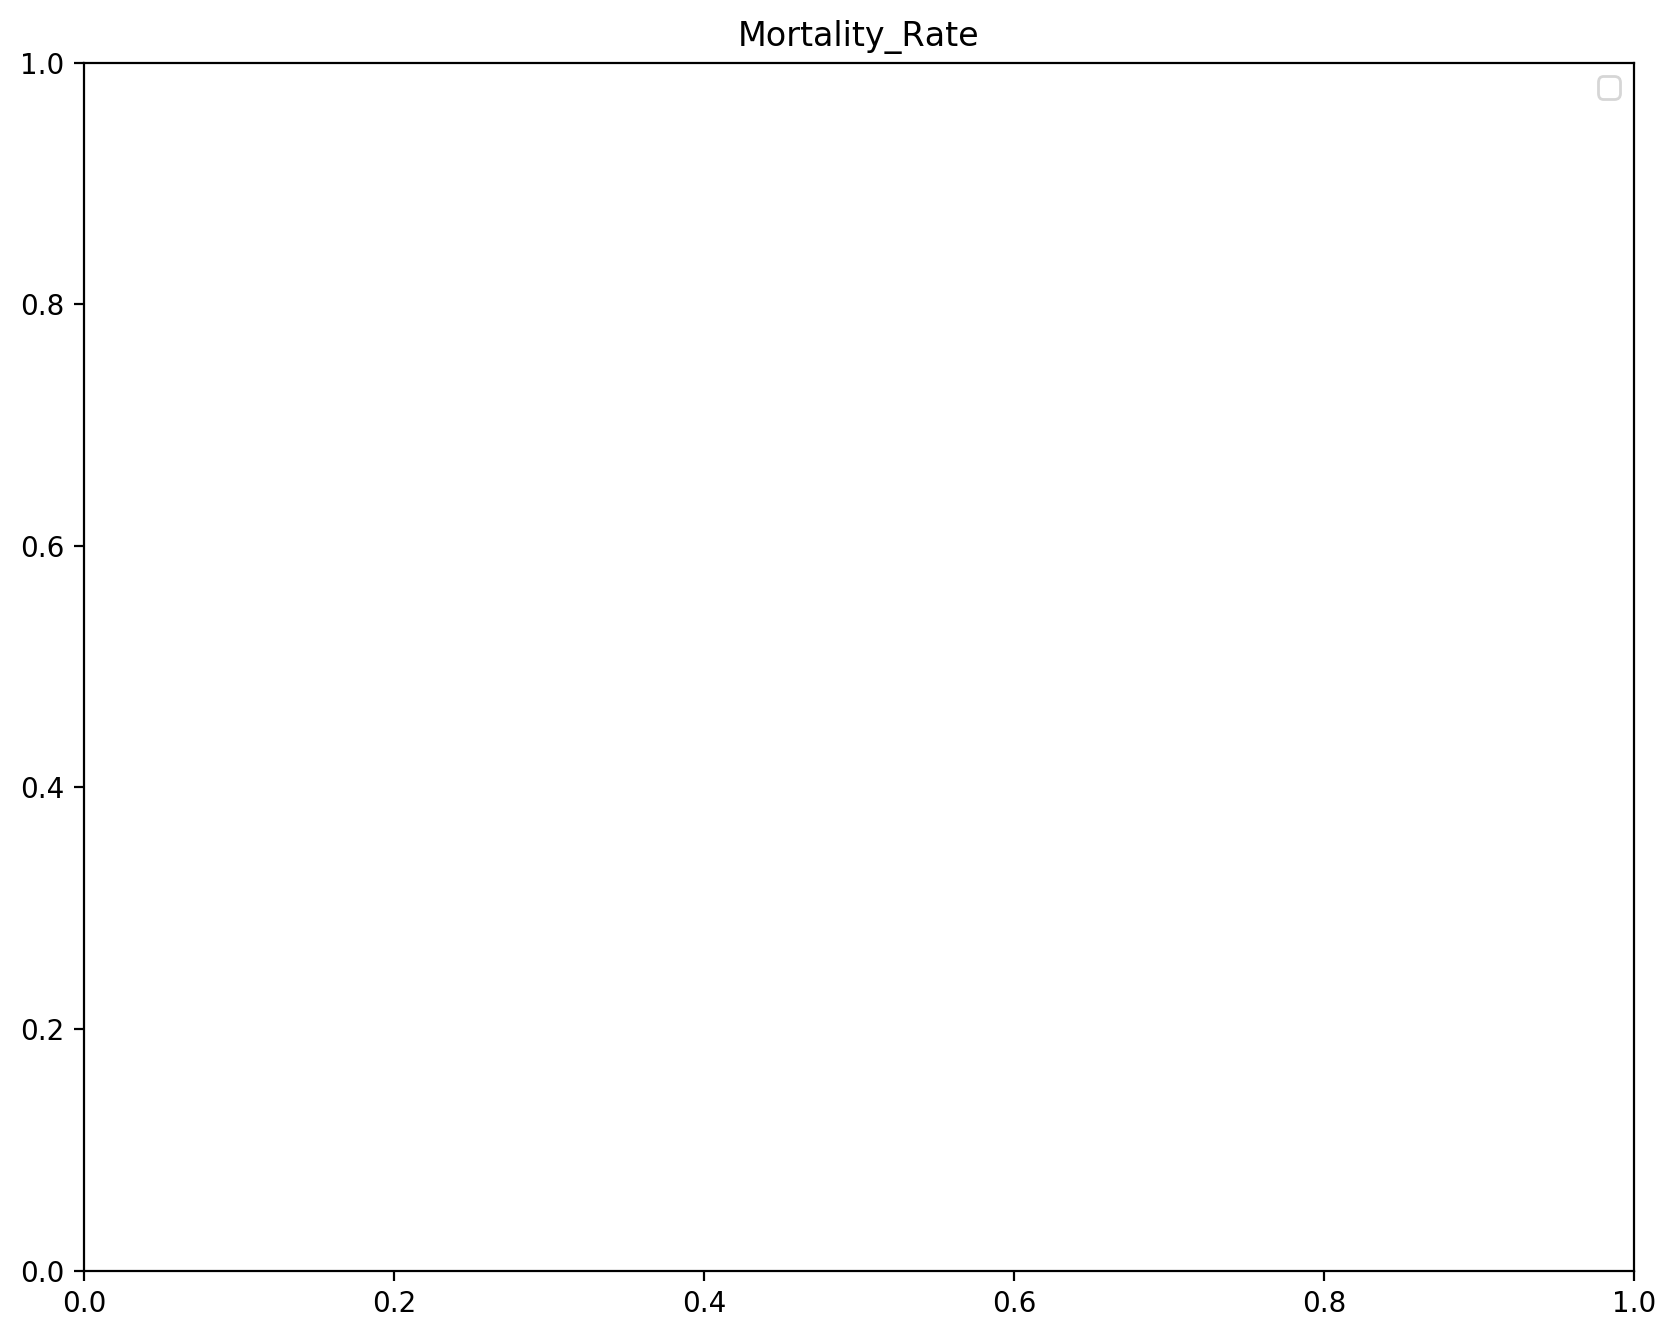

No handles with labels found to put in legend.


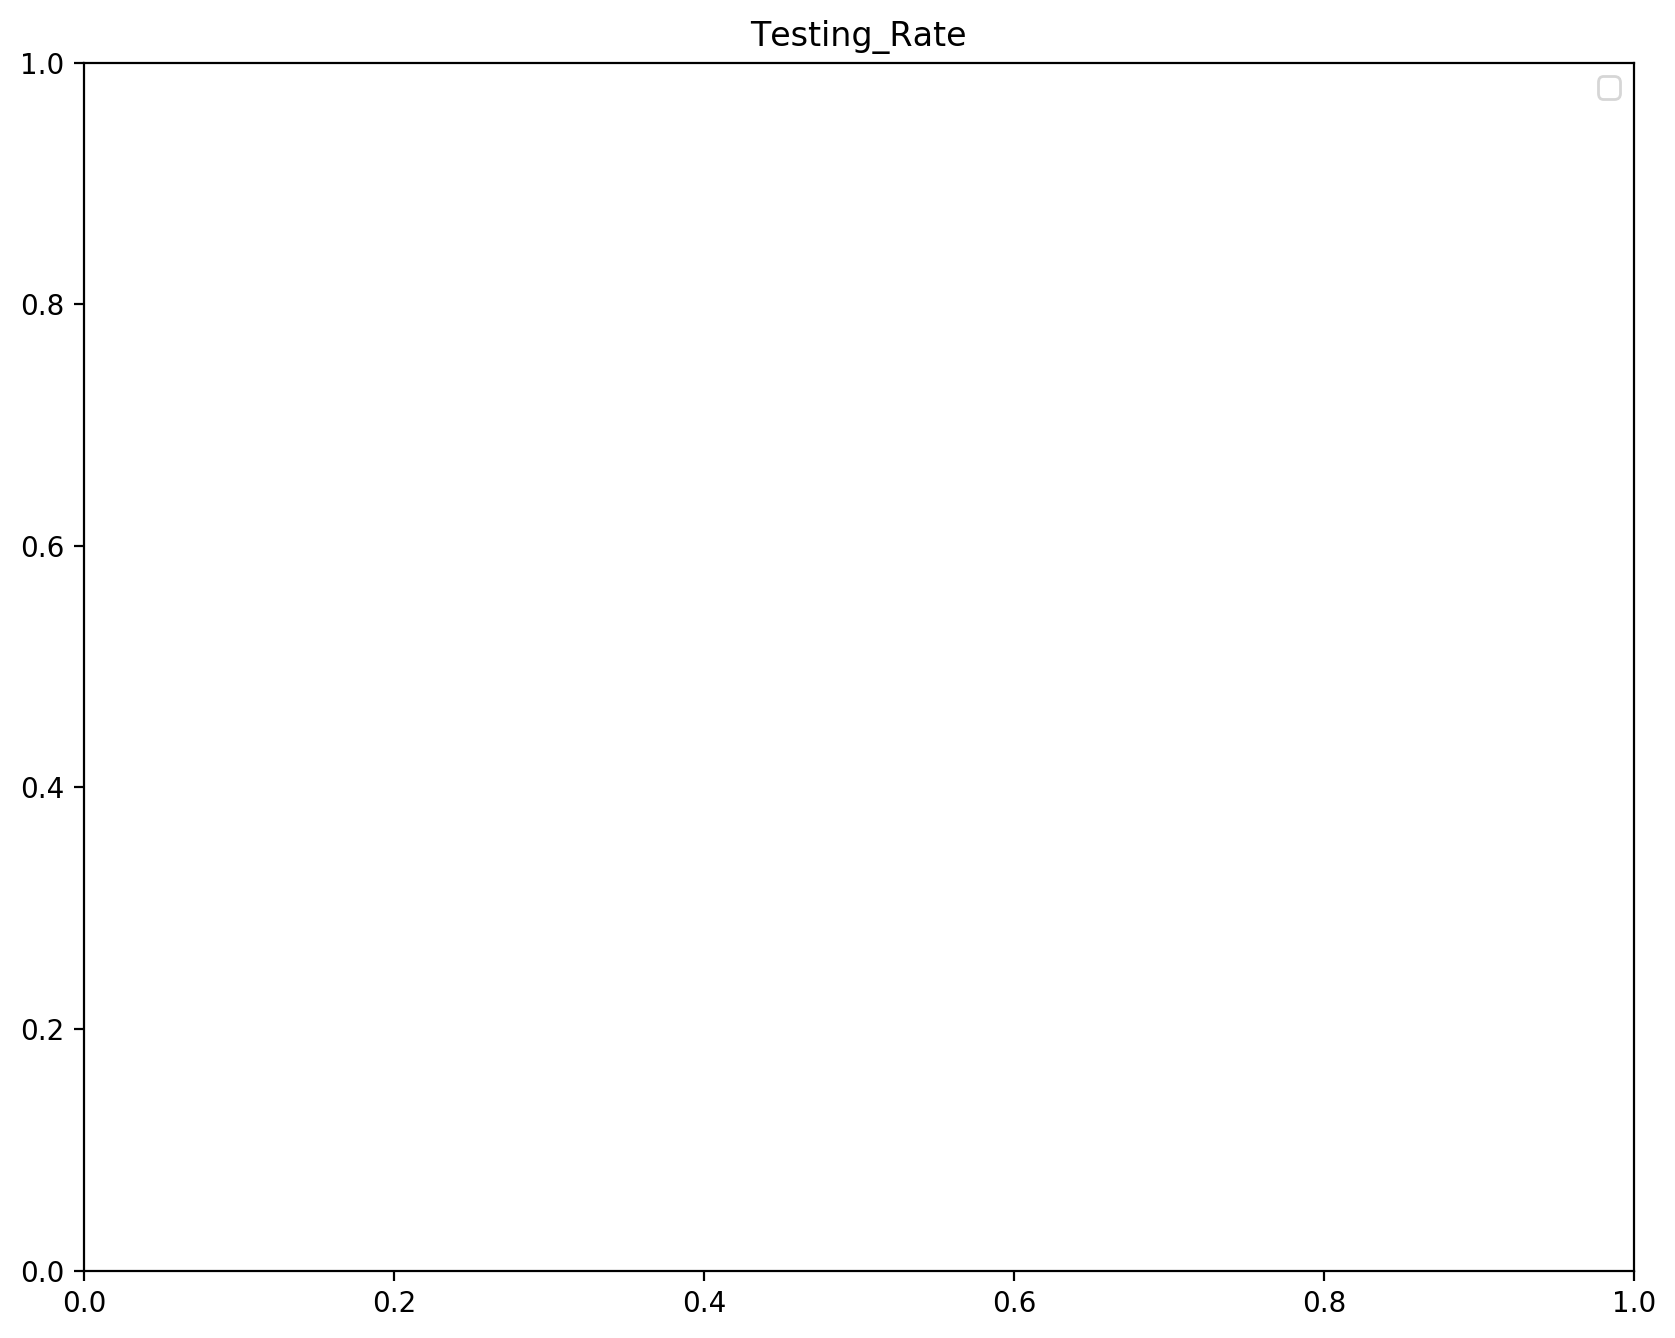

No handles with labels found to put in legend.


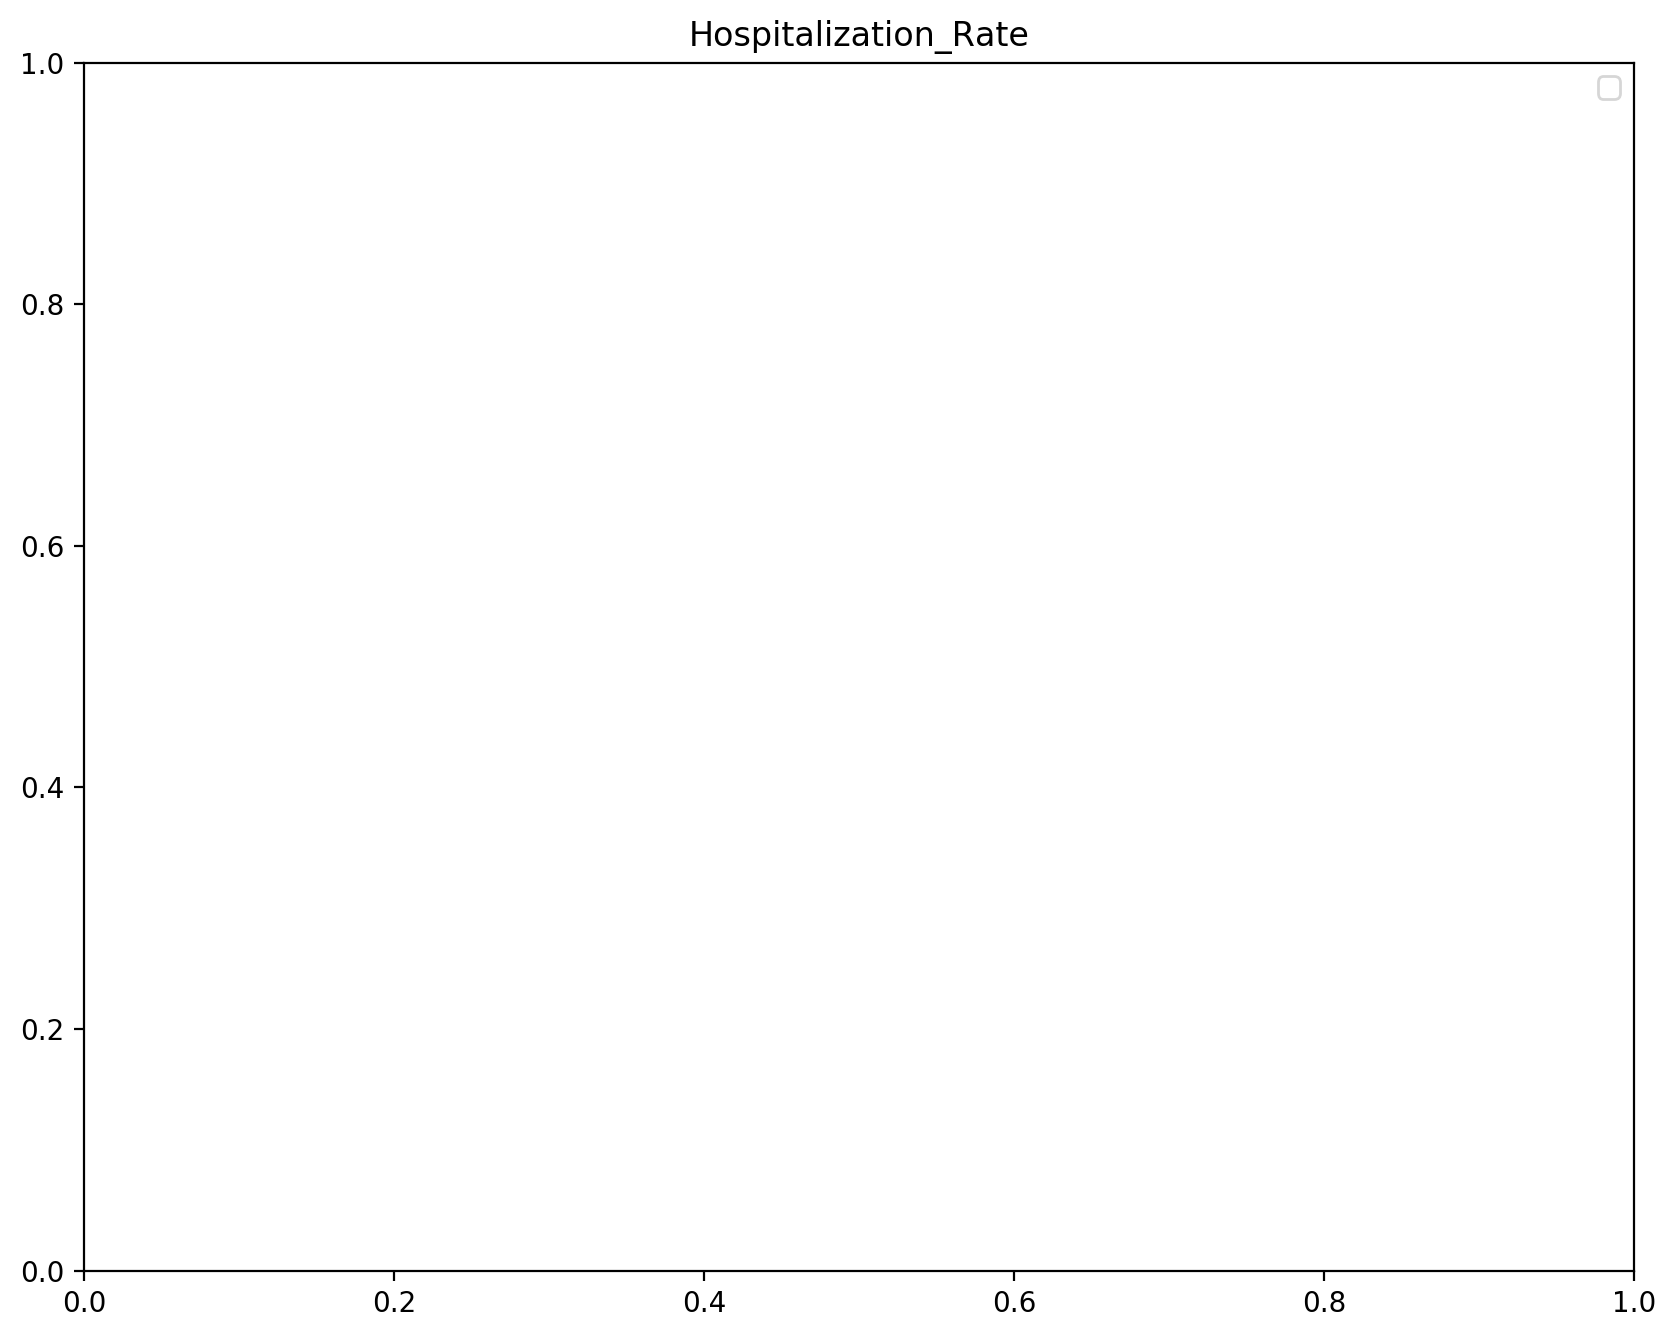

In [176]:

for state in list(set(covid.Province_State.to_list())):
    i=0;
    df = covid[covid.Province_State == state]
    x = df.TIME.to_numpy()
    for ynames in [cols1, cols2]:
        for name in ynames:
            plt.figure(i)
            plt.scatter(x, df[name], label=state)
            plt.xlabel('Time (day of the year)')
            i=i+1
i=0;            
for ynames in [cols1, cols2]:
    for name in ynames:
        plt.figure(i)
        plt.legend()
        plt.title(name)
        plt.show()
        i=i+1

In [178]:
# covid.drop(covid.Province_State==['Hawaii', 'Alaska', 'Puerto Rico', 'Diamond Princess', 'District of Columbia', 'Grand Princess', 'Guam'], axis=1)
covid = covid[covid.Country_Region == 'US'] ## Only United States

covid = covid[covid.Province_State != 'Hawaii']  ## Remove far-away region for clearer geographic plot
covid = covid[covid.Province_State!='Alaska']
covid = covid[covid.Province_State!='Puerto Rico']
covid = covid[covid.Province_State!='Diamond Princess']
covid = covid[covid.Province_State!='District of Columbia']
covid = covid[covid.Province_State!='Grand Princess']
covid = covid[covid.Province_State!='Guam']
covid = covid[covid.Province_State!='Northern Mariana Islands']
covid = covid[covid.Province_State!='Virgin Islands']
covid = covid[covid.Province_State!='American Samoa']
covid = covid[covid.Province_State!='Recovered']
print(covid)

print(set(covid.Province_State.to_list()))
print(len(set(covid.Province_State.to_list())))

    Province_State Country_Region          Last_Update      Lat     Long_  \
0          Alabama             US  2020-04-12 23:18:15  32.3182  -86.9023   
2          Arizona             US  2020-04-12 23:18:15  33.7298 -111.4312   
3         Arkansas             US  2020-04-12 23:18:15  34.9697  -92.3731   
4       California             US  2020-04-12 23:18:15  36.1162 -119.6816   
5         Colorado             US  2020-04-12 23:18:15  39.0598 -105.3111   
6      Connecticut             US  2020-04-12 23:18:15  41.5978  -72.7554   
7         Delaware             US  2020-04-12 23:18:15  39.3185  -75.5071   
10         Florida             US  2020-04-12 23:18:15  27.7663  -81.6868   
11         Georgia             US  2020-04-12 23:18:15  33.0406  -83.6431   
15           Idaho             US  2020-04-12 23:18:15  44.2405 -114.4788   
16        Illinois             US  2020-04-12 23:18:15  40.3495  -88.9861   
17         Indiana             US  2020-04-12 23:18:15  39.8494  -86.2583   

Not Plotting Puerto Rico
Not Plotting Alaska
Not Plotting Hawaii


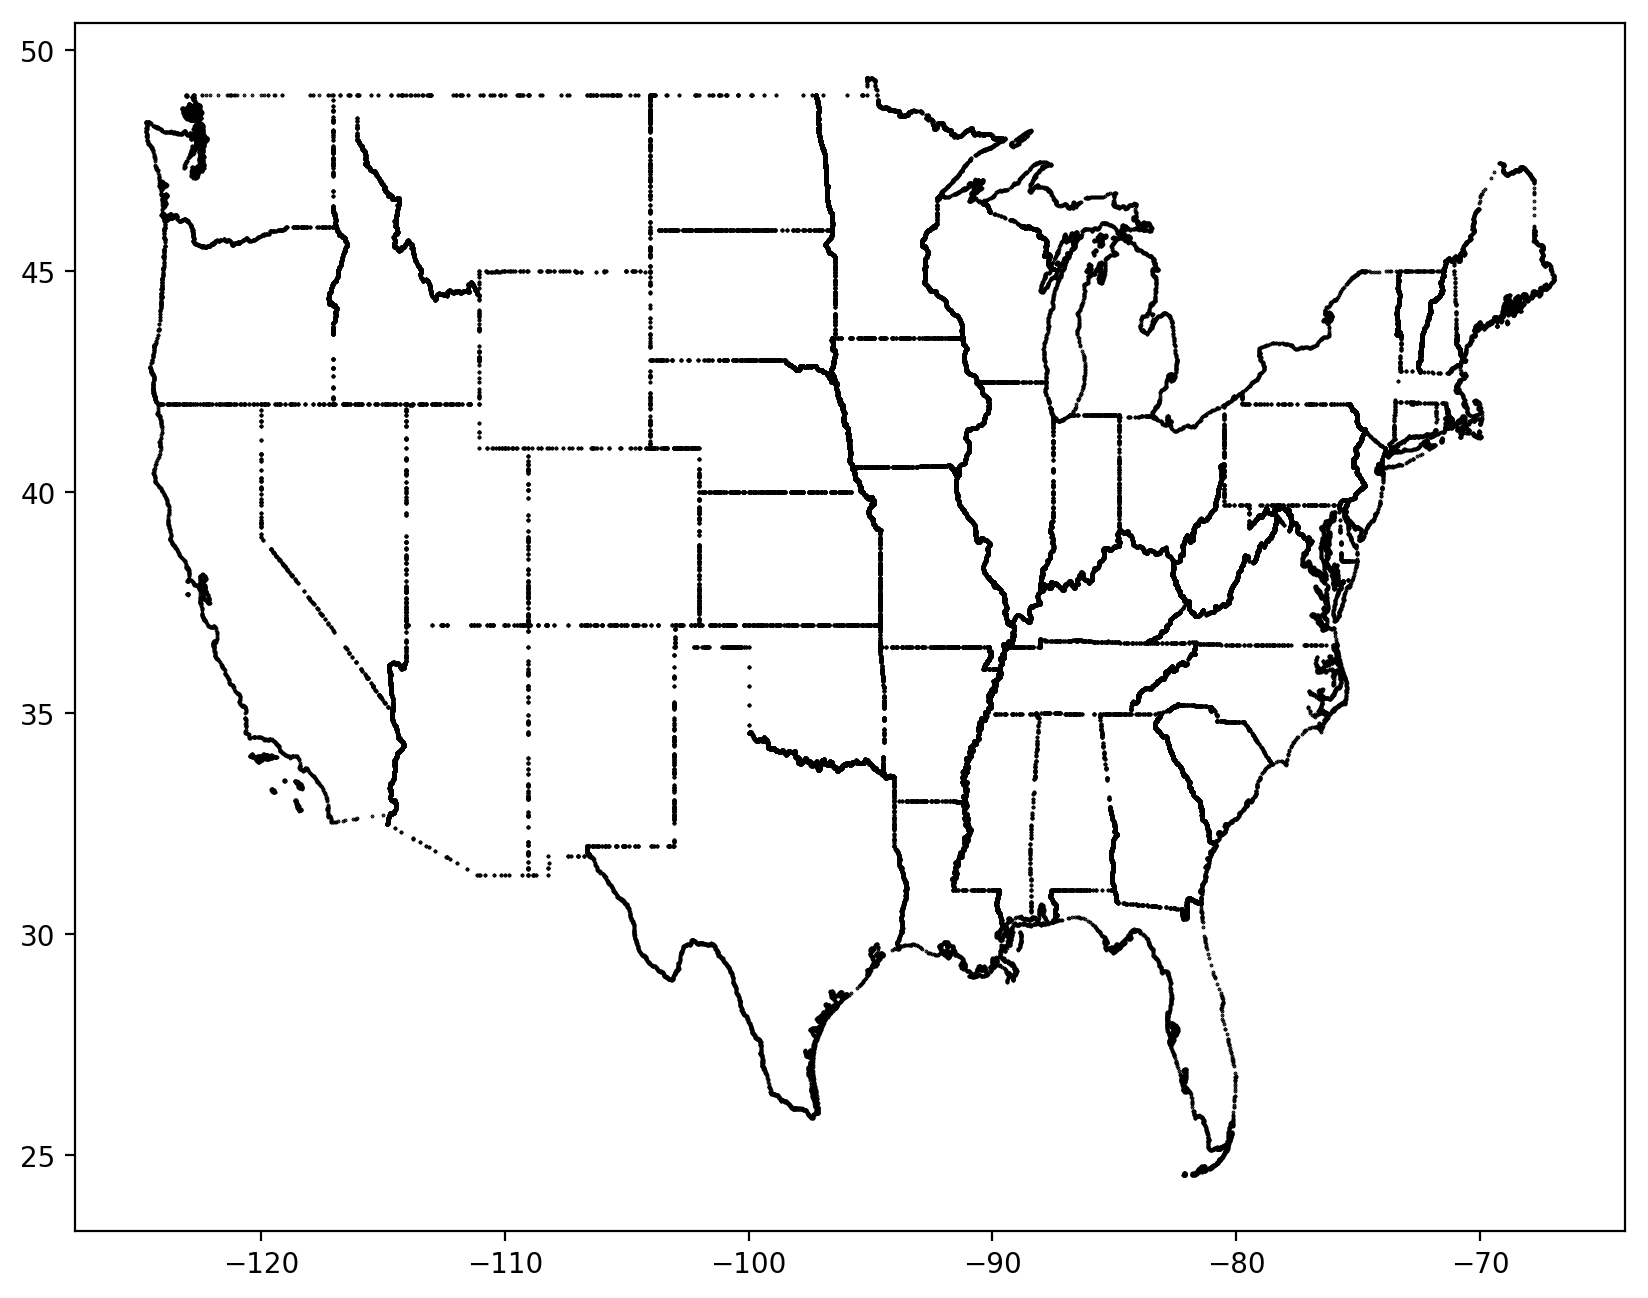

In [186]:
def load_US_MAP():
    with open('sketchy_internet_map.json') as f:
        US_MAP = json.load(f)
        
    FARAWAYSTATES = False
    states = []
    names = []
    for i in range(51):
        names.append(US_MAP['features'][i]['properties']['NAME'])
        coords = US_MAP['features'][i]['geometry']['coordinates']
        x = []
        y = []
        for line in coords:
            for subline in line:
                for point in subline:
                    if isinstance(point, list):
                        x.append(point[0])
                        y.append(point[1])
    #                     print(np.shape(point))
                    else:
                        x.append(subline[0])
                        y.append(subline[1])
    #                     print(np.shape(subline))
        states.append([x, y])
    return names, states

def print_US_MAP(names, states, FARAWAYSTATES = False):
    X = []
    Y = []
    for i in range(len(names)):
        if (FARAWAYSTATES is False) and ((names[i] == 'Hawaii') or (names[i] == 'Alaska') or (names[i] == 'Puerto Rico')):
            print('Not Plotting ' + names[i])
        else: 
            x = states[i][0]
            y = states[i][1]
            plt.scatter(x, y, color='black', s=0.15)
            for xi in x:
                X.append(xi)
            for yi in y:
                Y.append(yi)
        
   
    plt.show()
    return X, Y

names, states = load_US_MAP()
X, Y = print_US_MAP(names, states)


In [116]:
# dr[['date', 'time']] = dr.Last_Update.str.split(' ', expand=True)
# dr.loc[:, ['date', 'time']].fillna(dr['Last Update'].str.split('T', expand=True), inplace=True)
# display(dr)

# dr.assign('Year'=np.nan, 'Month'=np.nan, 'Day = np.nan)
# dr.loc[:, ['Year', 'Month', 'Day']].fillna(dr.date.str.split('-', expand=True), inplace=True).astype('int32')
# display(dr)

# dr.loc[:, ['Day', 'Month', 'Year']].fillna(dr.date.str.split('/', expand=True), inplace=True).astype('int32')
# display(dr[dr.date.str.contains('/')])

# # dr['Last_Update'] = dr['Last_Update'].str.replace('/', '-')
# # dr['Last Update'] = dr['Last Update'].str.replace('T', '-')
# # dr.Last_Update.fillna(dr['Last Update'], inplace=True)

# # dr[['Year', 'Month', 'Day']] = dr.Last_Update.str.split('-', expand=True)
# # dr[['Year', 'Month', 'Day']] = dr[['Year', 'Month', 'Day']].astype('int32')
# display(dr.dtypes)

# #times.drop(columns=3, inplace=True)
# # times = times.astype('int32')
# # display(times)

# # eturn sum(DAYS_IN[:(int(month)-1)]) + int(day) + int(hour)/24 + int(mins)/(24*60) + int(sec)/(24*60*60)


# # update = dr.Last_Update.str.split('-', expand=True)
# # display(update)

# # display(dr)
# counter = dict()
# DAYS_IN = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]    ## Days in each month
# counter.values = [sum(DAYS_IN[:i]) for i in range(12)]
# counter.keys = list(range(12)) + 1
# print(counter)
# # month = dr.Month.to_numpy()-1
# # day = dr.Day.to_numpy()
# # DAY = sum(DAYS_IN(month)) + day
# # # dr.drop('Last_Update', 'Last Update', )

# # dr.drop('Lat', 'Long_', 'Latitude', 'Longitude')


# # dr[['Province','State']] = dr['Province/State'].str.split(', ', expand=True)
# # dr['Province'].fillna(dr['Admin2'], inplace=True)
# # dr['State'].fillna(dr['Province_State'], inplace=True)
# # display(dr)

# # dr.loc[:, ['Admin2', 'Province_State']].fillna(dr['Province/State'].str.split(', ', expand=True), inplace=True)
# # display(dr)
# # # dr['Last_Update'].fillna(dr['Last Update'], inplace=True) 
# # # display(dr)
# # Province = []
# # State = []
# # Country = []
# # keys = dr['Combined_Key'].dropna()
# # print(keys)


/home/jackie/.local/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


FIPS     Admin2  Province_State Country_Region  \
0       45001.0  Abbeville  South Carolina             US   
1       22001.0     Acadia       Louisiana             US   
2       51001.0   Accomack        Virginia             US   
3       16001.0        Ada           Idaho             US   
4       19001.0      Adair            Iowa             US   
...         ...        ...             ...            ...   
269670      NaN        NaN             NaN            NaN   
269671      NaN        NaN             NaN            NaN   
269672      NaN        NaN             NaN            NaN   
269673      NaN        NaN             NaN            NaN   
269674      NaN        NaN             NaN            NaN   

                Last_Update        Lat       Long_  Confirmed  Deaths  \
0       2020-04-26 02:30:51  34.223334  -82.461707       24.0     0.0   
1       2020-04-26 02:30:51  30.295065  -92.414197      130.0     7.0   
2       2020-04-26 02:30:51  37.767072  -75.632346      146.0     3.0   
3       2020-04-26 02:30:51  43.452658 -116.241552      650.0    15.0   
4       2020-04-26 02:30:51  41.330756  -94.471059        1.0     0.0   
...                     ...        ...         ...        ...     ...   
269670                  NaN        NaN         NaN        1.0     0.0   
269671                  NaN        NaN         NaN        1.0     0.0   
269672                  NaN        NaN         NaN        1.0     0.0   
269673                  NaN        NaN         NaN        1.0     0.0   
269674                  NaN        NaN         NaN        1.0     0.0   

        Recovered  ...          Last Update Latitude Longitude Incidence_Rate  \
0             0.0  ...                  NaN      NaN       NaN            NaN   
1             0.0  ...                  NaN      NaN       NaN            NaN   
2             0.0  ...                  NaN      NaN       NaN            NaN   
3             0.0  ...                  NaN      NaN       NaN            NaN   
4             0.0  ...                  NaN      NaN       NaN            NaN   
...           ...  ...                  ...      ...       ...            ...   
269670        0.0  ...  2020-02-05T21:53:02      NaN       NaN            NaN   
269671        0.0  ...  2020-02-01T19:53:03      NaN       NaN            NaN   
269672        0.0  ...  2020-02-13T18:53:02      NaN       NaN            NaN   
269673        1.0  ...  2020-02-09T07:03:04      NaN       NaN            NaN   
269674        0.0  ...  2020-02-01T19:43:03      NaN       NaN            NaN   

       Case-Fatality_Ratio        date      time  Year  Month Day  
0                      NaN  2020-04-26  02:30:51   NaN    NaN NaN  
1                      NaN  2020-04-26  02:30:51   NaN    NaN NaN  
2                      NaN  2020-04-26  02:30:51   NaN    NaN NaN  
3                      NaN  2020-04-26  02:30:51   NaN    NaN NaN  
4                      NaN  2020-04-26  02:30:51   NaN    NaN NaN  
...                    ...         ...       ...   ...    ...  ..  
269670                 NaN         NaN       NaN   NaN    NaN NaN  
269671                 NaN         NaN       NaN   NaN    NaN NaN  
269672                 NaN         NaN       NaN   NaN    NaN NaN  
269673                 NaN         NaN       NaN   NaN    NaN NaN  
269674                 NaN         NaN       NaN   NaN    NaN NaN  

[269675 rows x 24 columns]

0         1
9167    2020-03-11  10:53:02
9168    2020-03-11  21:33:02
9169    2020-03-11  18:52:03
9170    2020-03-11  21:13:18
9171    2020-03-11  22:53:03
...            ...       ...
269670  2020-02-05  21:53:02
269671  2020-02-01  19:53:03
269672  2020-02-13  18:53:02
269673  2020-02-09  07:03:04
269674  2020-02-01  19:43:03

[7057 rows x 2 columns]

FIPS     Admin2  Province_State Country_Region  \
0       45001.0  Abbeville  South Carolina             US   
1       22001.0     Acadia       Louisiana             US   
2       51001.0   Accomack        Virginia             US   
3       16001.0        Ada           Idaho             US   
4       19001.0      Adair            Iowa             US   
...         ...        ...             ...            ...   
269670      NaN        NaN             NaN            NaN   
269671      NaN        NaN             NaN            NaN   
269672      NaN        NaN             NaN            NaN   
269673      NaN        NaN             NaN            NaN   
269674      NaN        NaN             NaN            NaN   

                Last_Update        Lat       Long_  Confirmed  Deaths  \
0       2020-04-26 02:30:51  34.223334  -82.461707       24.0     0.0   
1       2020-04-26 02:30:51  30.295065  -92.414197      130.0     7.0   
2       2020-04-26 02:30:51  37.767072  -75.632346      146.0     3.0   
3       2020-04-26 02:30:51  43.452658 -116.241552      650.0    15.0   
4       2020-04-26 02:30:51  41.330756  -94.471059        1.0     0.0   
...                     ...        ...         ...        ...     ...   
269670                  NaN        NaN         NaN        1.0     0.0   
269671                  NaN        NaN         NaN        1.0     0.0   
269672                  NaN        NaN         NaN        1.0     0.0   
269673                  NaN        NaN         NaN        1.0     0.0   
269674                  NaN        NaN         NaN        1.0     0.0   

        Recovered  ...          Last Update Latitude Longitude Incidence_Rate  \
0             0.0  ...                  NaN      NaN       NaN            NaN   
1             0.0  ...                  NaN      NaN       NaN            NaN   
2             0.0  ...                  NaN      NaN       NaN            NaN   
3             0.0  ...                  NaN      NaN       NaN            NaN   
4             0.0  ...                  NaN      NaN       NaN            NaN   
...           ...  ...                  ...      ...       ...            ...   
269670        0.0  ...  2020-02-05T21:53:02      NaN       NaN            NaN   
269671        0.0  ...  2020-02-01T19:53:03      NaN       NaN            NaN   
269672        0.0  ...  2020-02-13T18:53:02      NaN       NaN            NaN   
269673        1.0  ...  2020-02-09T07:03:04      NaN       NaN            NaN   
269674        0.0  ...  2020-02-01T19:43:03      NaN       NaN            NaN   

       Case-Fatality_Ratio        date      time  Year  Month Day  
0                      NaN  2020-04-26  02:30:51   NaN    NaN NaN  
1                      NaN  2020-04-26  02:30:51   NaN    NaN NaN  
2                      NaN  2020-04-26  02:30:51   NaN    NaN NaN  
3                      NaN  2020-04-26  02:30:51   NaN    NaN NaN  
4                      NaN  2020-04-26  02:30:51   NaN    NaN NaN  
...                    ...         ...       ...   ...    ...  ..  
269670                 NaN         NaN       NaN   NaN    NaN NaN  
269671                 NaN         NaN       NaN   NaN    NaN NaN  
269672                 NaN         NaN       NaN   NaN    NaN NaN  
269673                 NaN         NaN       NaN   NaN    NaN NaN  
269674                 NaN         NaN       NaN   NaN    NaN NaN  

[269675 rows x 24 columns]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

Not Plotting Puerto Rico
Not Plotting Alaska
Not Plotting Hawaii


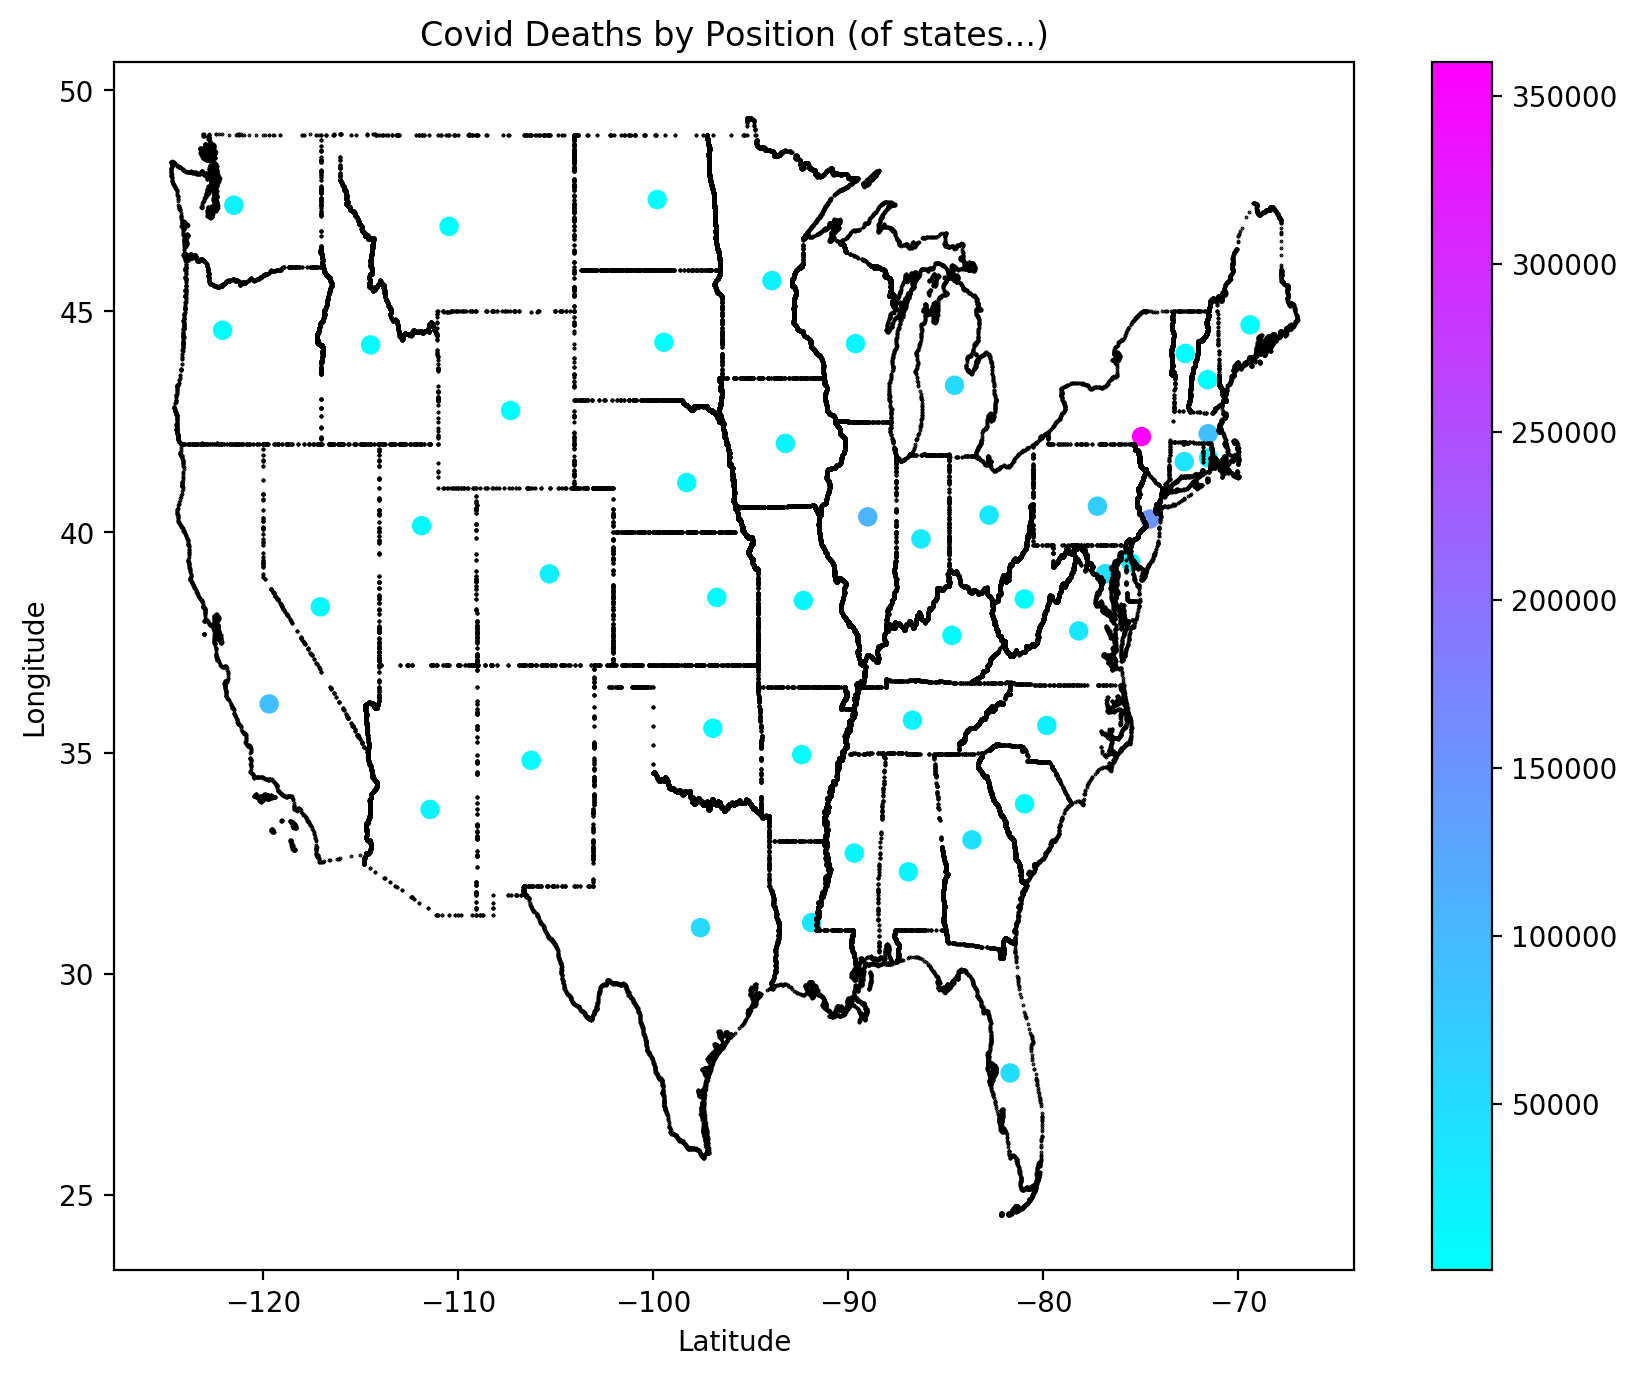

In [187]:
today = covid[covid.DAY == max(covid.DAY)]

lat = today.Lat.to_numpy()
lon = today.Long_.to_numpy()
conf = today.Confirmed.to_numpy()

plt.scatter(lon, lat, c=conf, cmap='cool')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Covid Deaths by Position (of states...)')
plt.colorbar()
print_US_MAP(names, states)
plt.show()

# WIDTH = 65
# HEIGHT = 35
# x0 = -120
# y0 = 25

# x0 = min(X)
# y0 = min(Y)
# WIDTH = max(X) - x0 + 10
# HEIGHT - max(Y) - y0 + 10
# x =  (WIDTH/360.0) * (180 + lon) + x0;
# y =  (HEIGHT/180.0) * (90 - lat) + y0;

# plt.scatter(x, y, c=conf, cmap='cool')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('(Flattened) Covid Deaths by Position (of states...)')
# plt.colorbar()
# print_US_MAP(names, states)
# plt.show()


In [188]:
print(NY.columns)


Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate', 'TIME', 'DAY'],
      dtype='object')


Text(0.5, 1.0, 'New York Testing Rate Autocorrelation ')

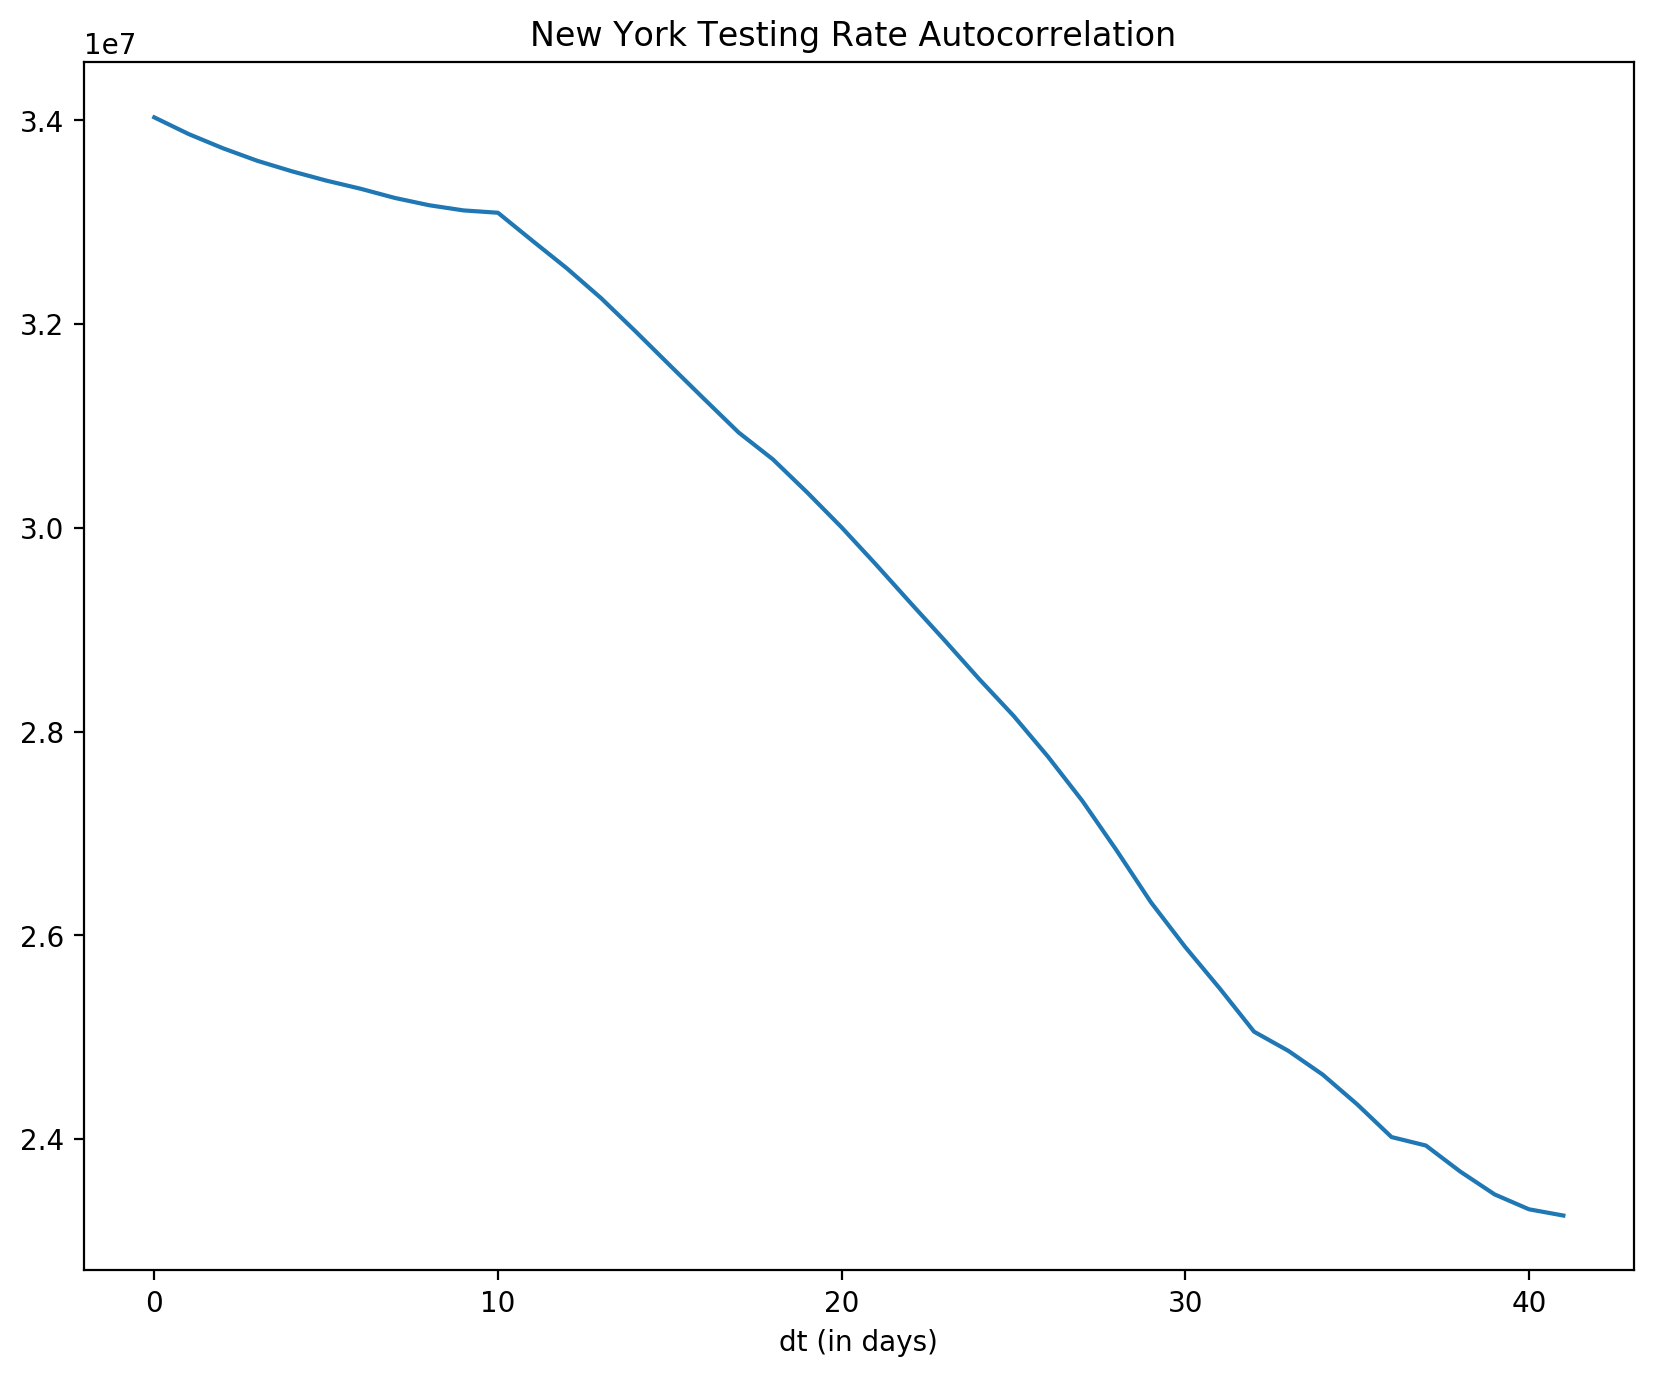

In [200]:
def corr(x1, x2):
    N = np.size(x1)
    out = np.zeros(N)
    for i in range(N):
        for j in range(N-i):
            out[i] += x1[j]*x2[j+i]
    out = out/(N-np.arange(N))
    return out 
#     return out/out[0]

def acorr(x, n=None):    
    return corr(x, x) if n is None else corr(x, x)[:n]

plt.plot(acorr(NY.Testing_Rate.to_numpy()))
plt.xlabel('dt (in days)')
plt.title('New York Testing Rate Autocorrelation ')

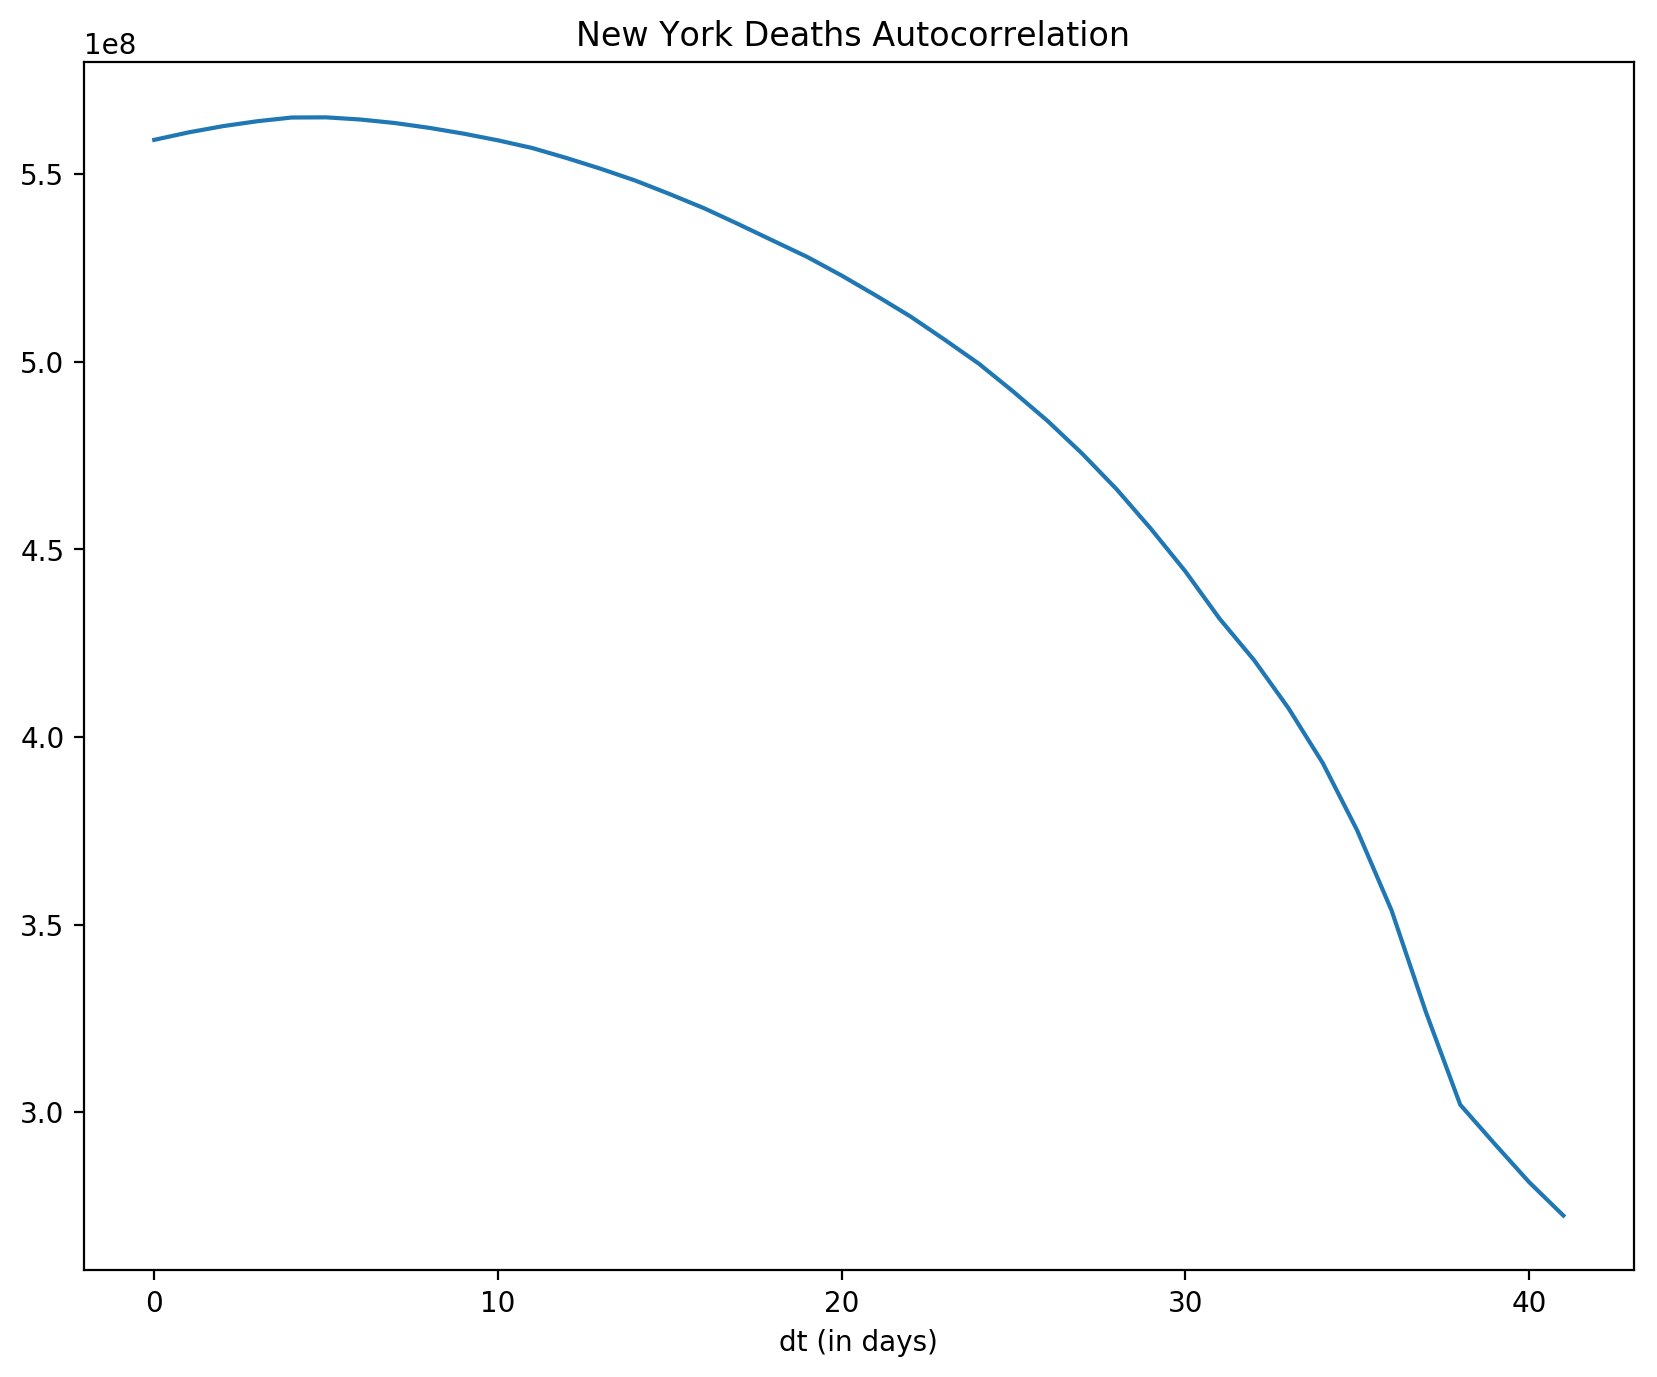

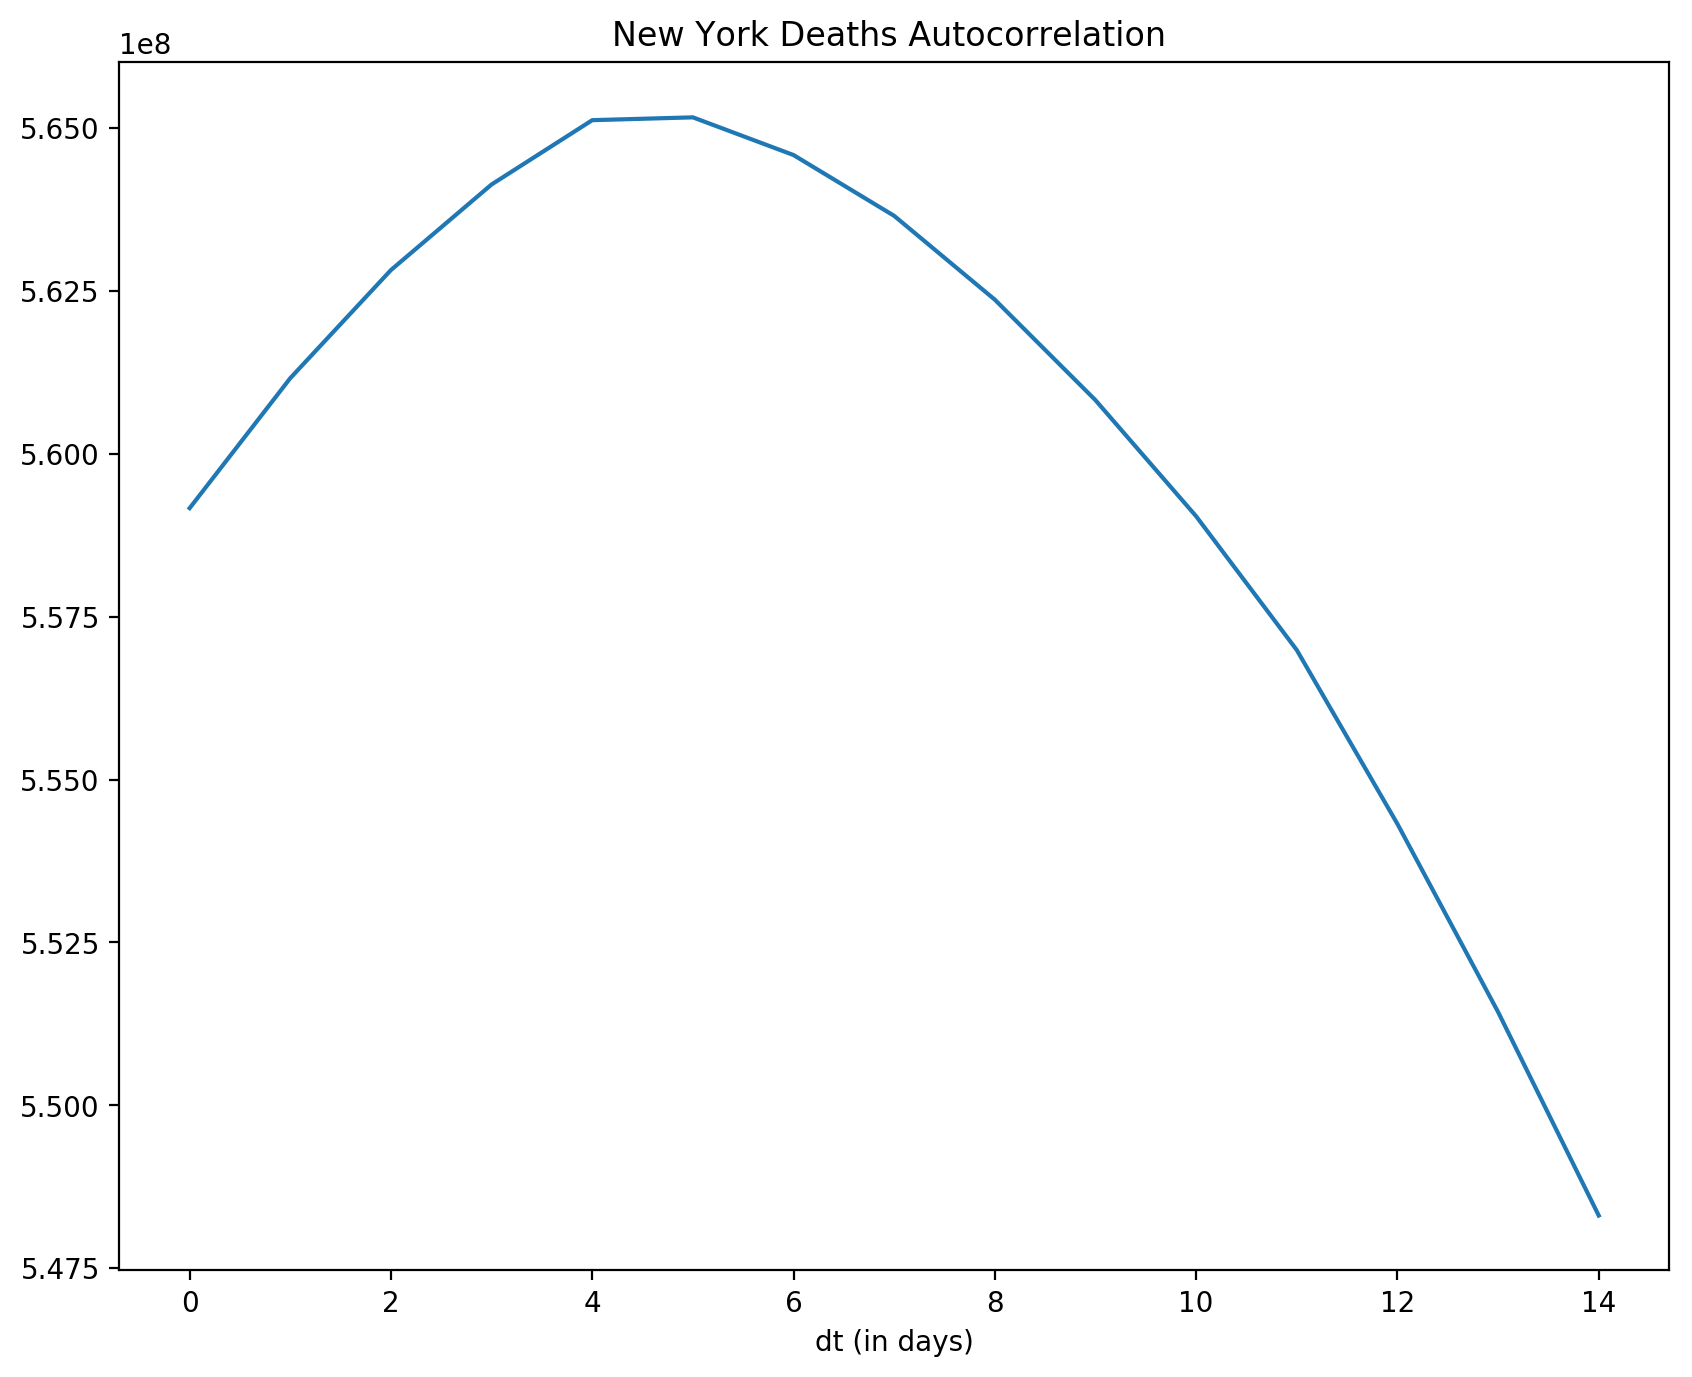

In [208]:

def randomdata(cat, n=None):
    plt.plot(acorr(NY[NY.columns[cat]].to_numpy(), n=n))
    plt.xlabel('dt (in days)')
    plt.title('New York ' + NY.columns[cat] + ' Autocorrelation ')
    plt.show()
    
randomdata(6)
randomdata(6, n=15)

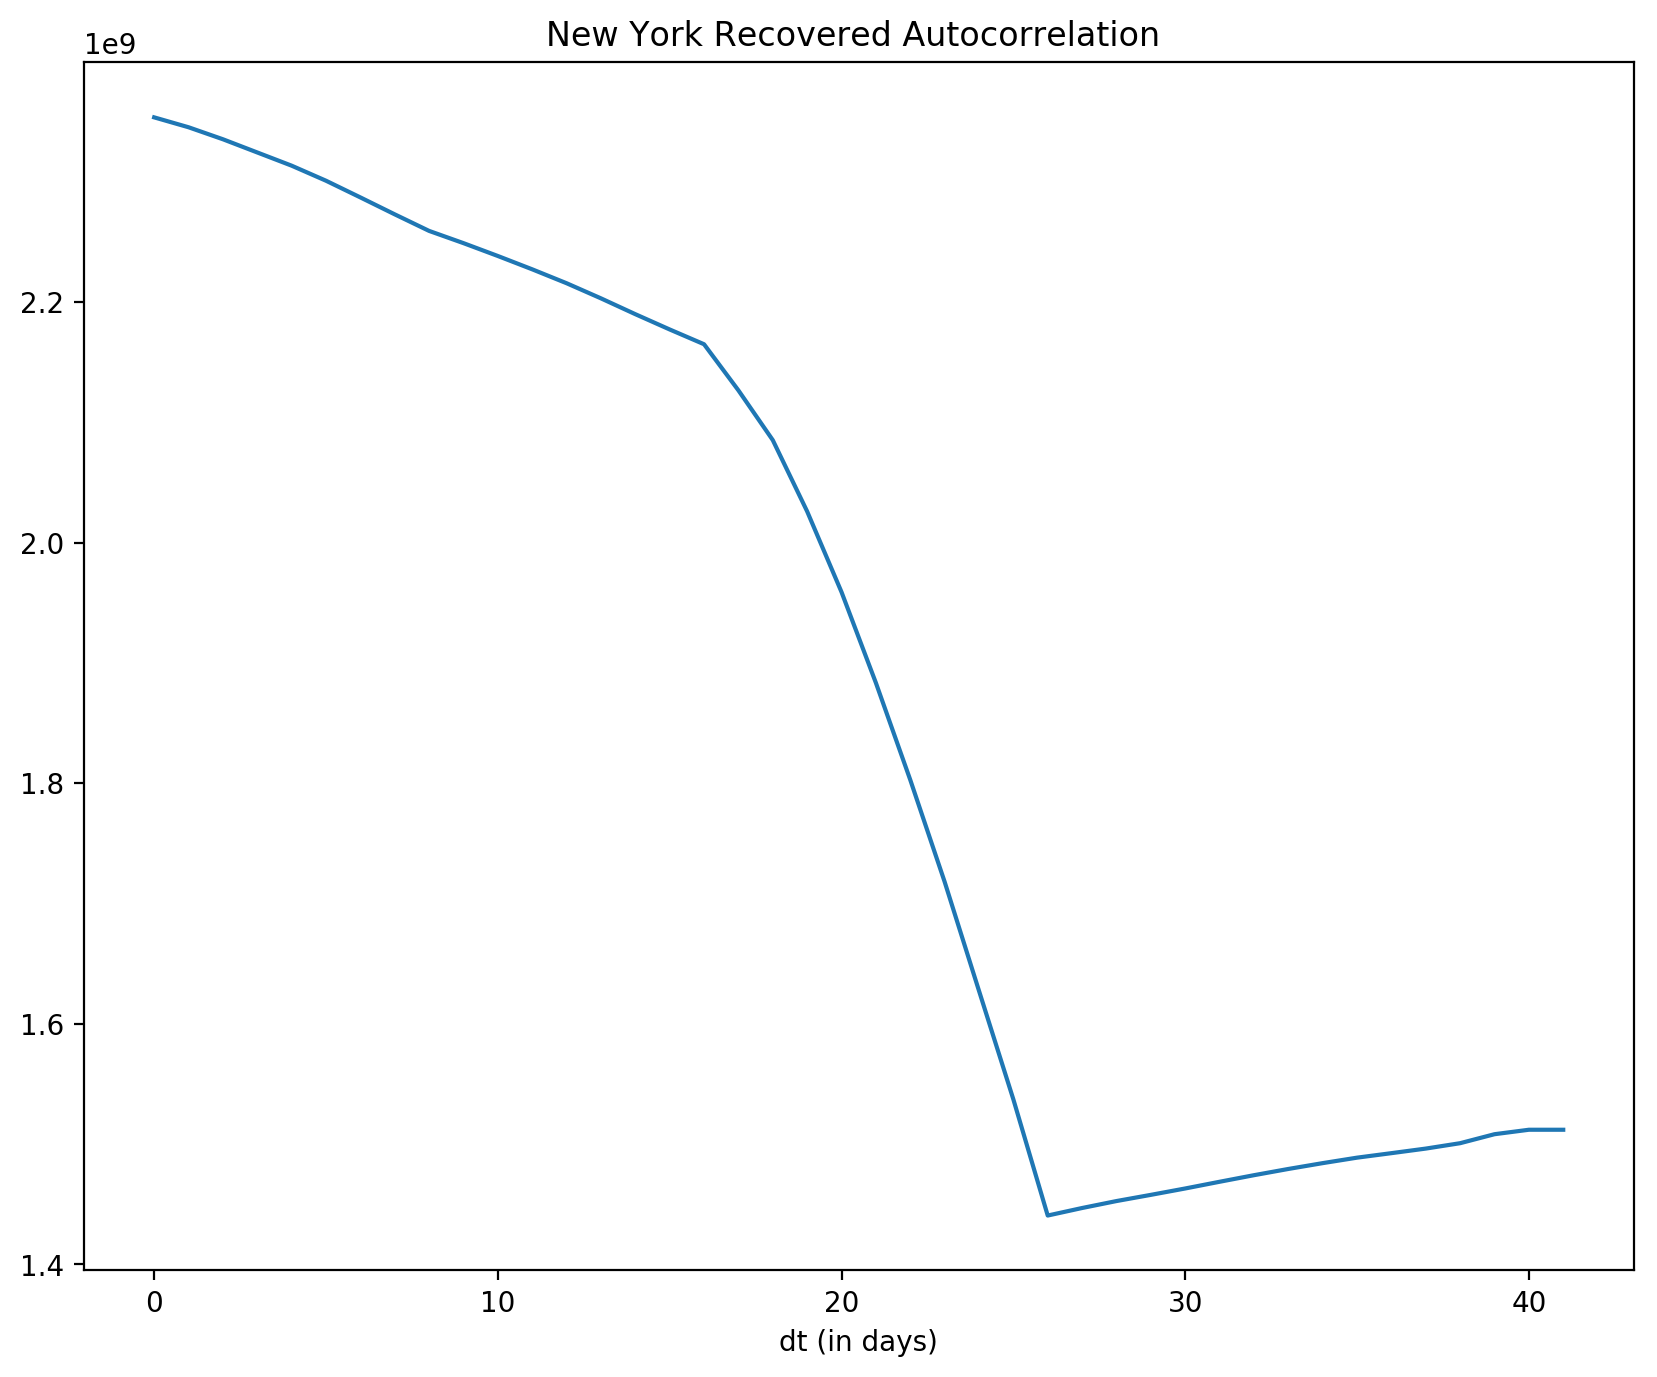

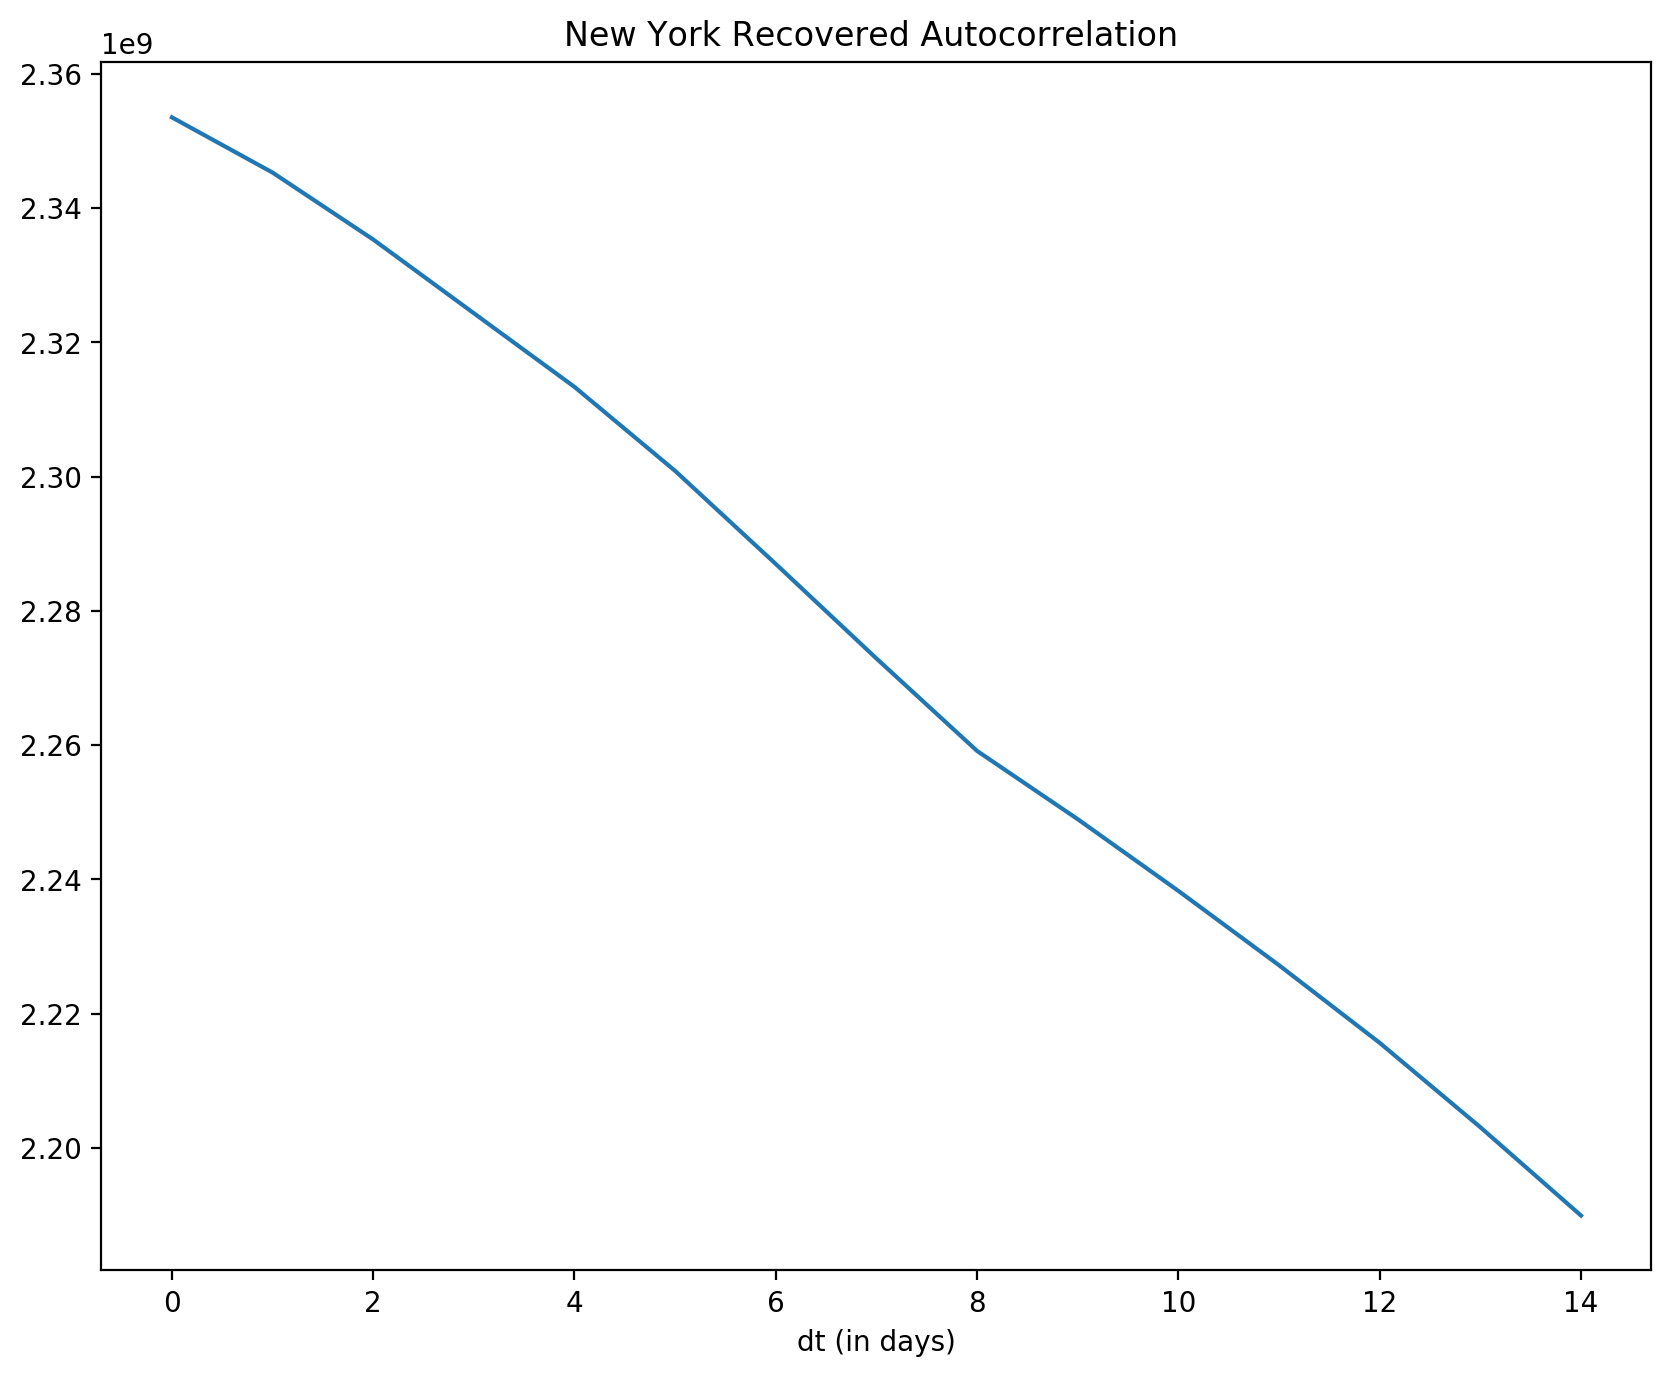

In [209]:
randomdata(7)
randomdata(7, n=15)

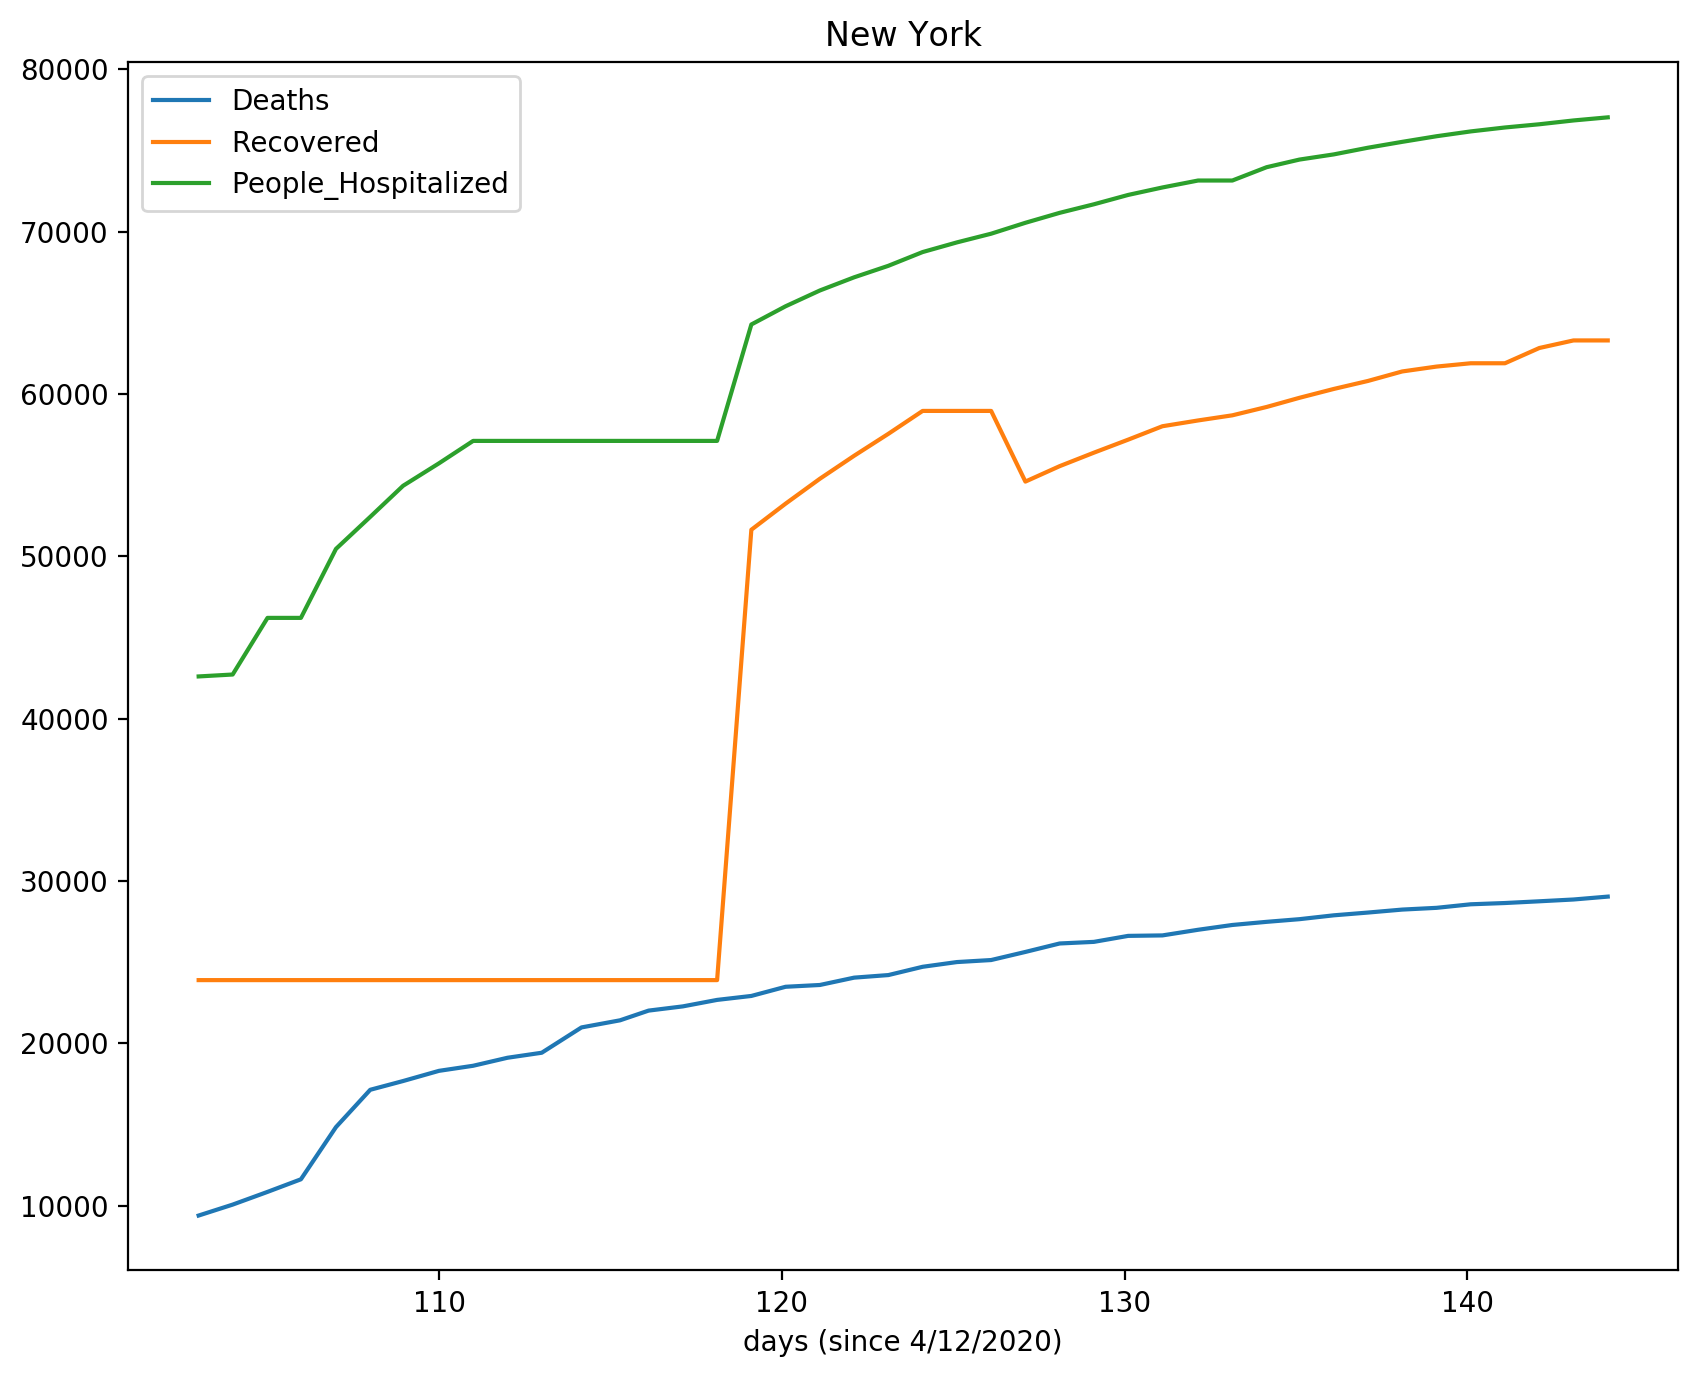

In [217]:
for i in [6,7, 12]:
    plt.plot(NY.TIME, NY[NY.columns[i]].to_numpy(), label = NY.columns[i])

plt.legend()
plt.xlabel('days (since 4/12/2020)')
plt.title('New York')
plt.show()

In [75]:
s = 'a/b/c'
s2 = s.split('/')
s3 = ''.join(s)
print(s)
print(s2)
print(s3)

a/b/c
['a', 'b', 'c']
a/b/c
